In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import operator as op
import numpy as np

# Load Data

In [3]:
# descriptions table
df_desc = pd.read_csv('data/qsr_case_study_descriptions_20230504.csv.gz')
df_desc.head()

item_id                        description
0  4275544f-e518-3d65-9a7b-a94f458a2a26  Cream of Chicken & Wild Rice Soup
1  42840c05-13de-34ef-91a3-2be0d9b8b6c4                       Chicken Bowl
2  b9777c41-2490-30c0-be87-8f62bbd08690             22 fl oz Soda/Iced Tea
3  d2737ad5-43ae-38cf-bdad-2c3c25d790c0               Chips & Queso Blanco
4  50fa22a4-4c32-31d7-bccc-25790a51db88        Spinach & Artichoke Souffle

In [4]:
# transactions table
df_trans = pd.read_csv('data/qsr_case_study_transactions_20230504.csv.gz')
df_trans.head()

user_id                              order_id  \
0  ecdc60b4-1213-32b0-81cb-2896ec4f0eab  4efd00e3-55dd-31ce-8887-3f53a4a32b15   
1  94176e85-f7f3-3f33-8592-4c82c35ba575  64fdb1ce-84a8-3b09-9af8-16d563443da1   
2  03517ba5-ceb8-3a5a-98bc-0491bda2cff0  08eac109-c6b3-3f03-b473-3ef43ede5937   
3  e6cee4e9-e0e3-3dcf-b7ce-183b21415fcc  20378a8f-a7e7-36ab-8bfd-3adb20bd3d6f   
4  47520794-f426-3c78-91fe-f7da798b4fb3  73e147de-b626-3bf4-9d75-3cefa53bfb9c   

   merchant_id  order_date                               item_id  \
0         1712  2022-05-23  4275544f-e518-3d65-9a7b-a94f458a2a26   
1         1612  2022-01-13  42840c05-13de-34ef-91a3-2be0d9b8b6c4   
2         1612  2022-05-30  b9777c41-2490-30c0-be87-8f62bbd08690   
3         1612  2022-04-29  d2737ad5-43ae-38cf-bdad-2c3c25d790c0   
4         1712  2021-01-15  50fa22a4-4c32-31d7-bccc-25790a51db88   

   item_quantity  item_price   tax  shipping_cost  order_discount  order_total  
0              1        6.89  1.61            NaN             NaN        21.08  
1              1       13.90  0.33            NaN            8.40         5.83  
2              1        2.90  3.70            NaN             NaN        40.00  
3              1         NaN  3.04            NaN             NaN        46.44  
4              1        5.39  1.03            NaN            2.99        13.01

In [5]:
"""
BE CAREFUL: ORDER_TOTALS ARE DUPLICATED 
"""

# print(df_trans.shape)
print(df_trans['order_id'].nunique())
df_trans[df_trans['order_id'] == '4efd00e3-55dd-31ce-8887-3f53a4a32b15']

3476533


user_id  \
0        ecdc60b4-1213-32b0-81cb-2896ec4f0eab   
3184745  ecdc60b4-1213-32b0-81cb-2896ec4f0eab   
7589590  ecdc60b4-1213-32b0-81cb-2896ec4f0eab   

                                     order_id  merchant_id  order_date  \
0        4efd00e3-55dd-31ce-8887-3f53a4a32b15         1712  2022-05-23   
3184745  4efd00e3-55dd-31ce-8887-3f53a4a32b15         1712  2022-05-23   
7589590  4efd00e3-55dd-31ce-8887-3f53a4a32b15         1712  2022-05-23   

                                      item_id  item_quantity  item_price  \
0        4275544f-e518-3d65-9a7b-a94f458a2a26              1        6.89   
3184745  2b631711-5538-37bf-b7d8-4b5cec09a9fc              1        2.29   
7589590  1080c60f-14a0-3eae-8792-1c0ab79dba38              1       10.29   

          tax  shipping_cost  order_discount  order_total  
0        1.61            NaN             NaN        21.08  
3184745  1.61            NaN             NaN        21.08  
7589590  1.61            NaN             NaN        21.08

In [6]:
# merchants table
df_merch = pd.read_csv('data/qsr_case_study_merchants_20230504.csv.gz')
df_merch.head()

merchant_name  merchant_id
0   PaneraBread         1712
1      Chipotle         1612
2   Burger King         3586
3      Wingstop         3112
4        Subway         3588

In [7]:
# users table
df_user = pd.read_csv('data/qsr_case_study_users_20230504.csv.gz')
df_user.head()

user_id state_name  zip_code gender_name  \
0  fbaa0057-9bdb-363f-8cae-00e29cb9db33         IA     52405           F   
1  a2d5f3e1-6e92-390d-9d56-80d24044e84f         PA     16866           F   
2  8e0f7333-9a7e-31d9-9d7b-f951673a6cc3         PA     18627           F   
3  0354e42b-16a3-3992-829b-5f299f340b7e         NY     10024           F   
4  d874f103-2248-3cdb-98d1-90f057e10084         TX     76179           F   

      mob ethnicity_name education_name household_income_name  
0  199201      NonHwhite       Bachelor                50-75k  
1  195901      NonHwhite     GradDegree              100-125k  
2  195201       Hispanic     HighSchool               75-100k  
3  199201      NonHwhite    SomeCollege              175-200k  
4  197801      NonHwhite    SomeCollege               75-100k

# EDA

In [8]:
# statistics of transactions
df_trans.describe()

merchant_id  item_quantity    item_price           tax  shipping_cost  \
count  7.924087e+06   7.924087e+06  6.625174e+06  7.163983e+06   1.358795e+06   
mean   2.153461e+03   1.192959e+00  8.048168e+00  3.013717e+00   1.982963e+00   
std    8.653321e+02   1.109907e+00  7.252193e+00  4.116848e+00   2.120744e+00   
min    1.117000e+03   1.000000e+00  0.000000e+00  0.000000e+00   0.000000e+00   
25%    1.612000e+03   1.000000e+00  3.290000e+00  9.700000e-01   1.000000e+00   
50%    1.712000e+03   1.000000e+00  7.450000e+00  1.750000e+00   1.000000e+00   
75%    3.112000e+03   1.000000e+00  1.039000e+01  3.350000e+00   3.000000e+00   
max    3.640000e+03   9.900000e+01  7.544000e+02  2.890500e+02   6.003000e+01   

       order_discount   order_total  
count    1.681395e+06  7.924087e+06  
mean     3.866075e+00  2.569429e+01  
std      3.476063e+00  2.368754e+01  
min      0.000000e+00  3.010000e+00  
25%      1.490000e+00  1.277000e+01  
50%      2.800000e+00  2.056000e+01  
75%      5.530000e+00  3.177000e+01  
max      1.983100e+02  2.023490e+03

<u>Remarks</u>: No extreme outliers that would suggest potential errors in building dataset.

Text(0.5, 1.0, 'Distribution of users in each state')

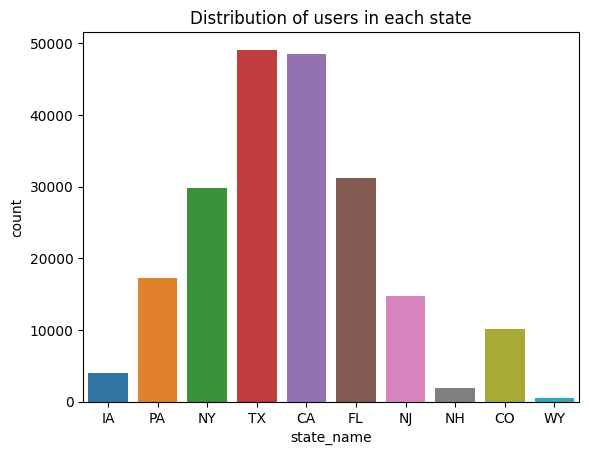

In [9]:
# demographic distributions of our users
fig, ax = plt.subplots()
sns.countplot(data = df_user, x = 'state_name', ax = ax)
ax.set_title('Distribution of users in each state')

<u>Remarks</u>: Most of our data seems to be coming from NY, Texas, California and Florida states.

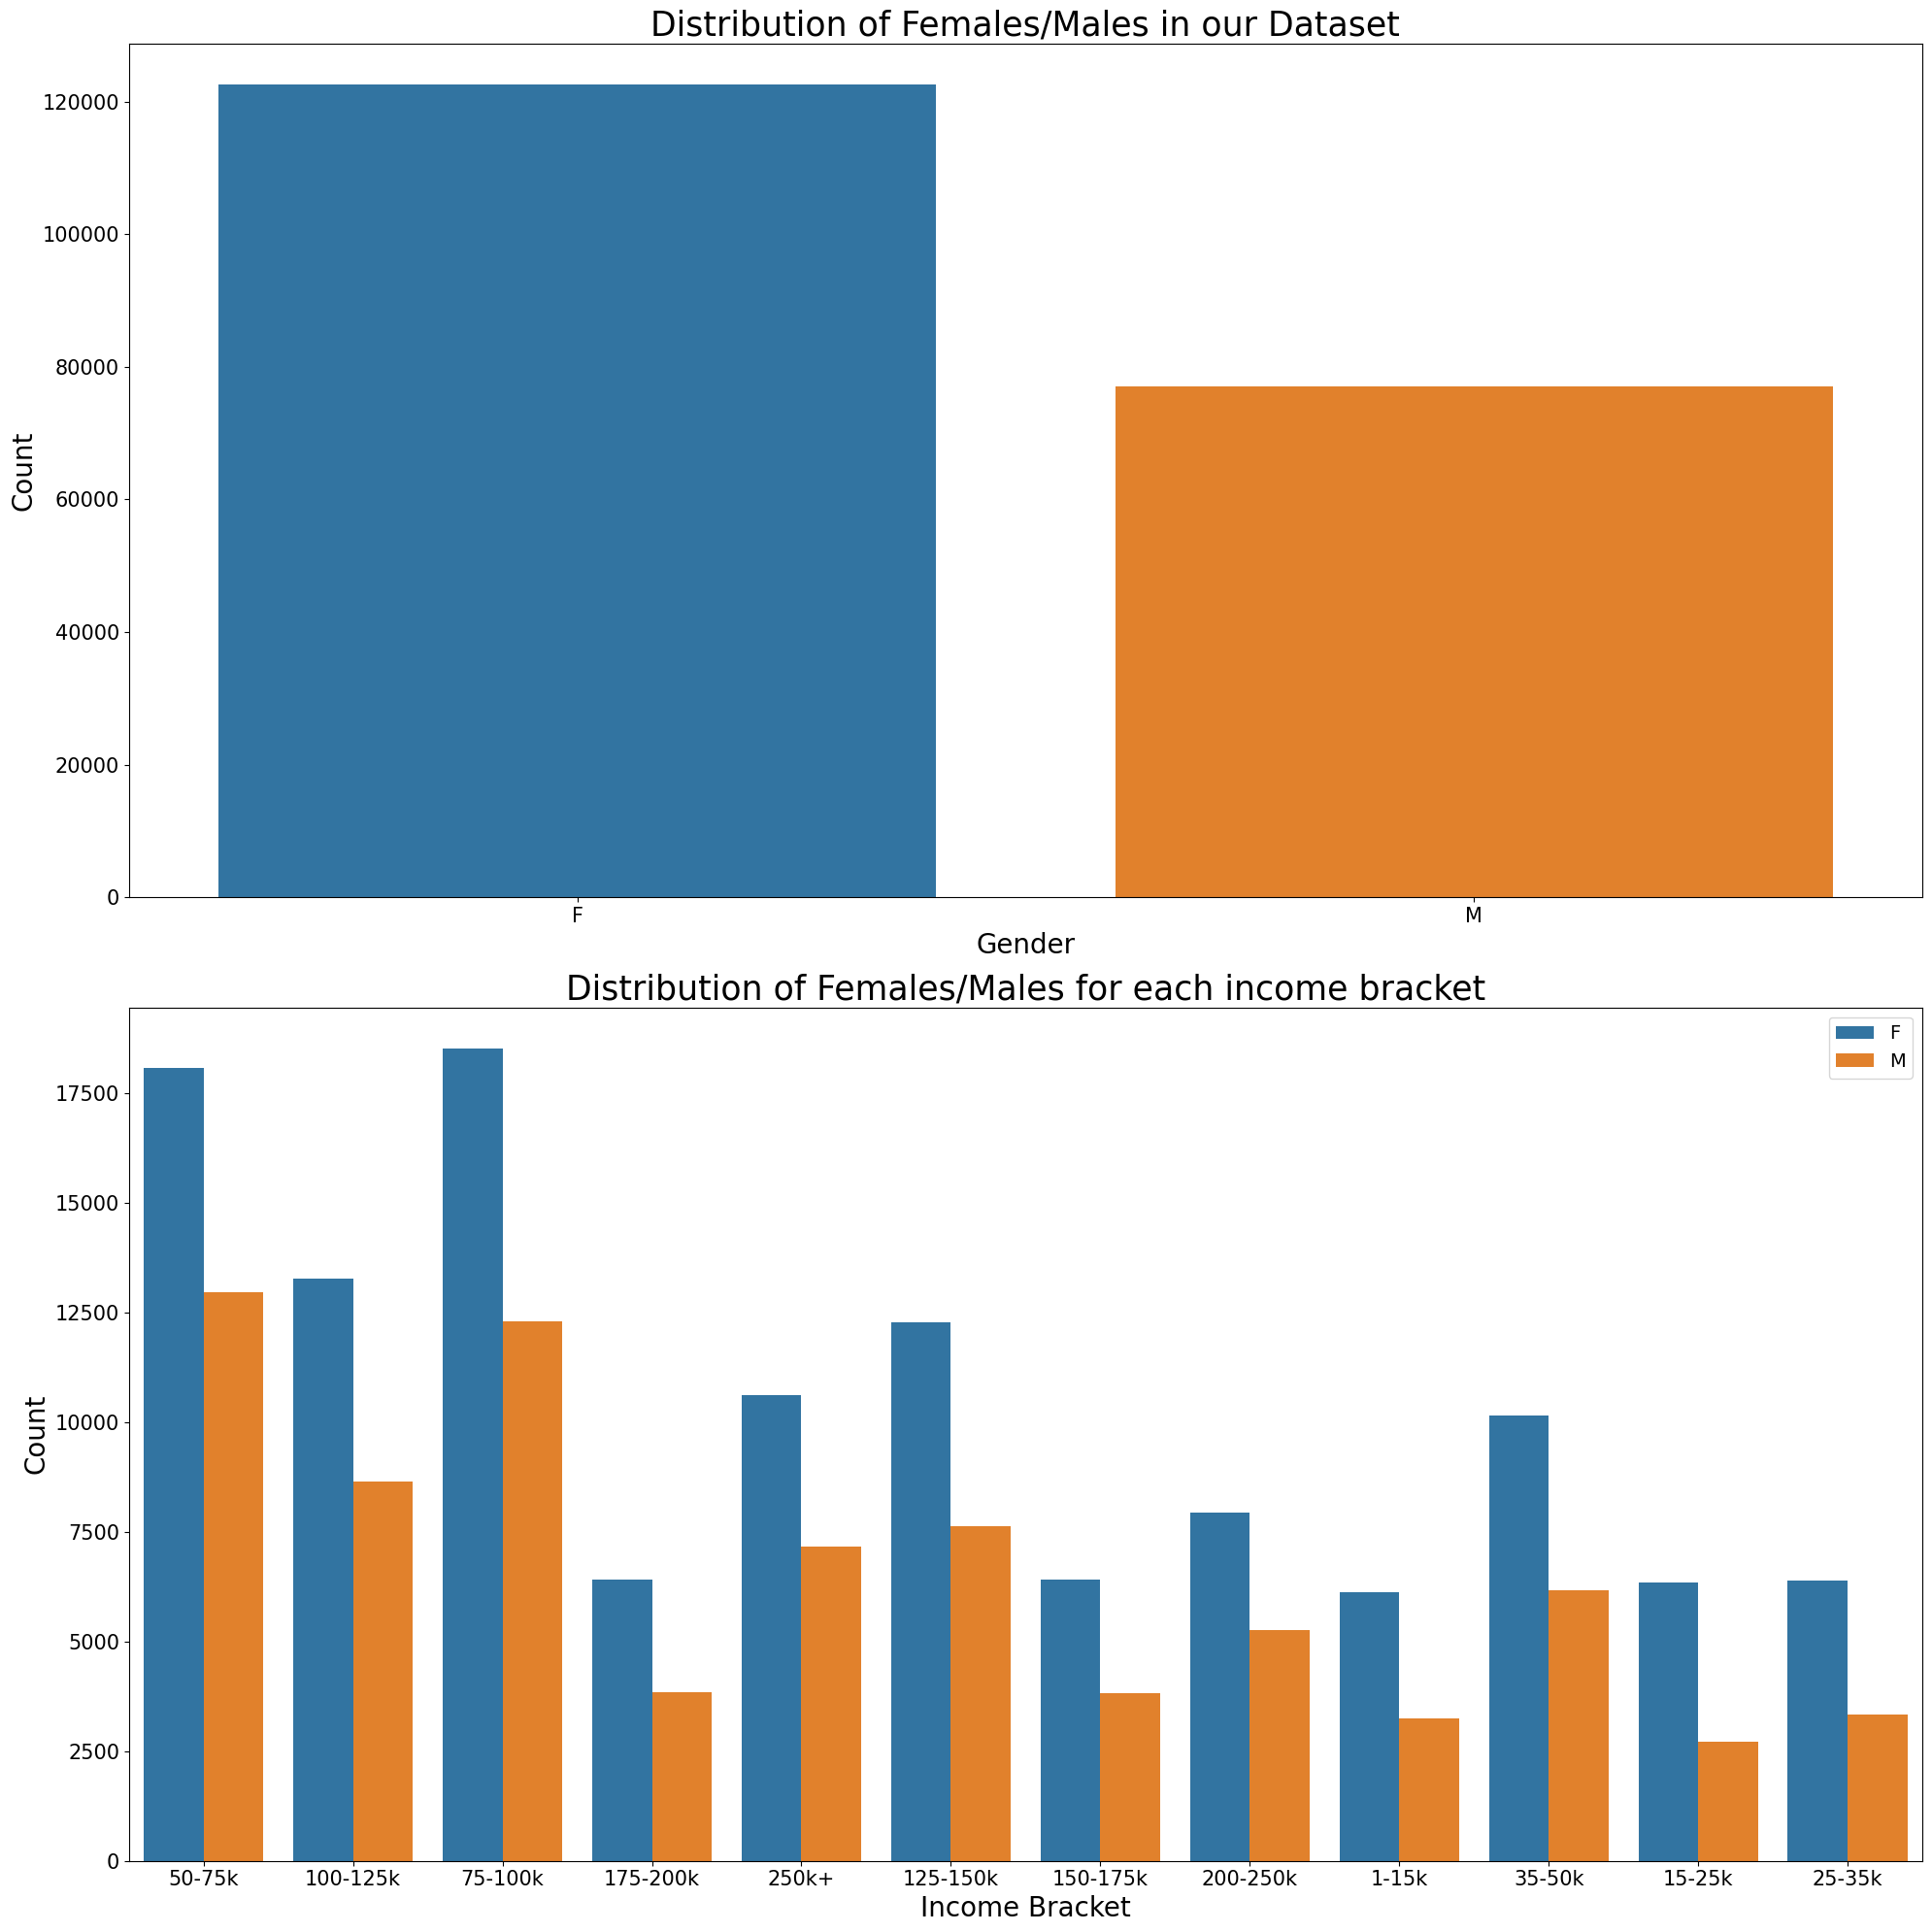

In [10]:
# gender disparities in our data

fig, ax = plt.subplots(nrows=2, ncols=1,figsize = (20,20))
sns.countplot(data = df_user, x = 'gender_name', ax = ax[0])
sns.countplot(data = df_user, x = 'household_income_name', hue = 'gender_name', ax = ax[1])
# fig.suptitle('Gender Disparities in our Dataset', fontsize = 20)
ax[0].set_title('Distribution of Females/Males in our Dataset', fontsize = 25)
ax[0].set_xlabel("Gender",fontsize=20)
ax[0].set_ylabel("Count",fontsize=20)
ax[0].tick_params(axis='both', labelsize=15)
ax[1].set_title('Distribution of Females/Males for each income bracket', fontsize = 25)
ax[1].set_xlabel("Income Bracket",fontsize=20)
ax[1].set_ylabel("Count",fontsize=20)
ax[1].tick_params(axis='both', labelsize=15)
ax[1].legend(prop={'size': 14})
fig.tight_layout()

<u>Remarks</u>: we have a majority of female users in our data. The ratio of female users to male users look pretty consistent across different income brackets.

Text(0.5, 1.0, 'Distribution of users by ethnicity')

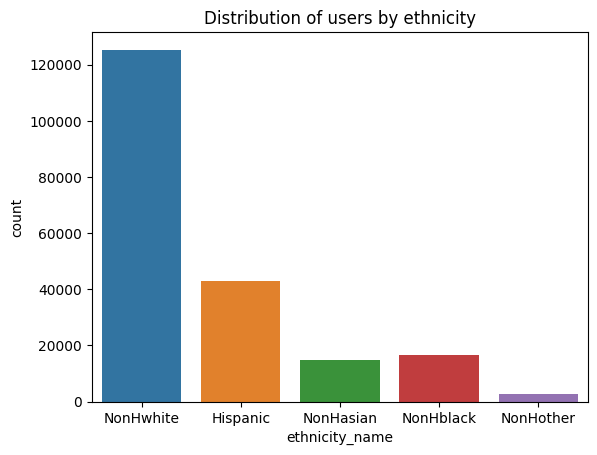

In [11]:
# ethnic distribution of our data

fig, ax = plt.subplots()
sns.countplot(data = df_user, x = 'ethnicity_name', ax = ax)
ax.set_title('Distribution of users by ethnicity')

<u>Remarks</u>: we have a large majority of Non Hispanic White people in our data, which indicates low representations of minorities.

# Overall Metrics -- Total

In this section, we look at overall metrics by using the entire dataset and overall timeline.

In [12]:
merchants = list(df_merch['merchant_name'].values)
merchants_dict = dict(zip(df_merch['merchant_name'], df_merch['merchant_id']))
merchants_dict

{'PaneraBread': 1712,
 'Chipotle': 1612,
 'Burger King': 3586,
 'Wingstop': 3112,
 'Subway': 3588,
 'Dunkin Donuts': 1117,
 'Shake Shack': 3108,
 'Sweetgreen': 3640,
 'Taco Bell': 3285,
 "Jimmy John's": 1528}

In [13]:
# create smaller df_trans by only keeping merchant_id, order_id, order_total and dropping duplicates (neglecting item_id information)
df_trans_small = df_trans[['merchant_id', 'user_id', 'order_id', 'order_total', 'order_date']].drop_duplicates()
df_trans_small.shape

(3476533, 5)

In [14]:
# merge df_trans_small with df_merch
df_trans_merged = df_trans_small.merge(df_merch, how = 'inner', on = 'merchant_id')
df_trans_merged.head()

merchant_id                               user_id  \
0         1712  ecdc60b4-1213-32b0-81cb-2896ec4f0eab   
1         1712  47520794-f426-3c78-91fe-f7da798b4fb3   
2         1712  c82a5f04-342b-39f1-8281-b5e1dce31047   
3         1712  a893e27d-8dbd-3a4e-9d3d-c0d72ac356ad   
4         1712  4af7e167-4174-34b8-9967-7a24ad416cb0   

                               order_id  order_total  order_date merchant_name  
0  4efd00e3-55dd-31ce-8887-3f53a4a32b15        21.08  2022-05-23   PaneraBread  
1  73e147de-b626-3bf4-9d75-3cefa53bfb9c        13.01  2021-01-15   PaneraBread  
2  73f5c3af-8fa5-336f-8dfa-0925253ca8b0        35.71  2021-08-17   PaneraBread  
3  df10f3cf-8f4e-3ebf-b0e1-b0296e3833cf        76.18  2022-07-18   PaneraBread  
4  6bd6e5b9-c422-3b2b-8eb2-c9a991c1dc42        29.43  2022-01-08   PaneraBread

In [15]:
# update order_date to datetime type
df_trans_merged['order_date'] = pd.to_datetime(df_trans_merged['order_date'], format='%Y-%m-%d')
df_trans_merged.head()

merchant_id                               user_id  \
0         1712  ecdc60b4-1213-32b0-81cb-2896ec4f0eab   
1         1712  47520794-f426-3c78-91fe-f7da798b4fb3   
2         1712  c82a5f04-342b-39f1-8281-b5e1dce31047   
3         1712  a893e27d-8dbd-3a4e-9d3d-c0d72ac356ad   
4         1712  4af7e167-4174-34b8-9967-7a24ad416cb0   

                               order_id  order_total order_date merchant_name  
0  4efd00e3-55dd-31ce-8887-3f53a4a32b15        21.08 2022-05-23   PaneraBread  
1  73e147de-b626-3bf4-9d75-3cefa53bfb9c        13.01 2021-01-15   PaneraBread  
2  73f5c3af-8fa5-336f-8dfa-0925253ca8b0        35.71 2021-08-17   PaneraBread  
3  df10f3cf-8f4e-3ebf-b0e1-b0296e3833cf        76.18 2022-07-18   PaneraBread  
4  6bd6e5b9-c422-3b2b-8eb2-c9a991c1dc42        29.43 2022-01-08   PaneraBread

merchant_name
Wingstop         30.247282
Shake Shack      26.509055
PaneraBread      22.348522
Chipotle         21.379052
Sweetgreen       20.242459
Jimmy John's     19.962885
Dunkin Donuts    15.630103
Subway           15.073623
Taco Bell        14.638108
Burger King      12.692752
Name: order_total, dtype: float64


Text(0, 0.5, 'Average Order Value ($)')

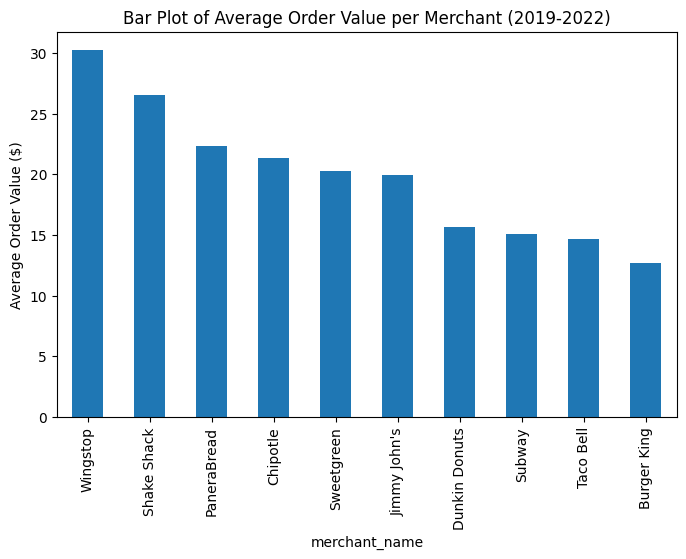

In [16]:
# Average order value
df_trans_merged_avg_order = df_trans_merged.groupby('merchant_name')['order_total'].mean().sort_values(ascending = False)
print(df_trans_merged_avg_order)
fig, ax = plt.subplots(figsize = (8,5))
df_trans_merged_avg_order.plot.bar(ax = ax)
ax.set_title('Bar Plot of Average Order Value per Merchant (2019-2022)')
ax.set_ylabel('Average Order Value ($)')

merchant_name
Wingstop         26.06
Shake Shack      22.41
Chipotle         17.96
PaneraBread      17.21
Jimmy John's     15.82
Sweetgreen       15.51
Subway           12.35
Taco Bell        11.86
Dunkin Donuts    10.00
Burger King       9.86
Name: order_total, dtype: float64


Text(0, 0.5, 'Median Order Value ($)')

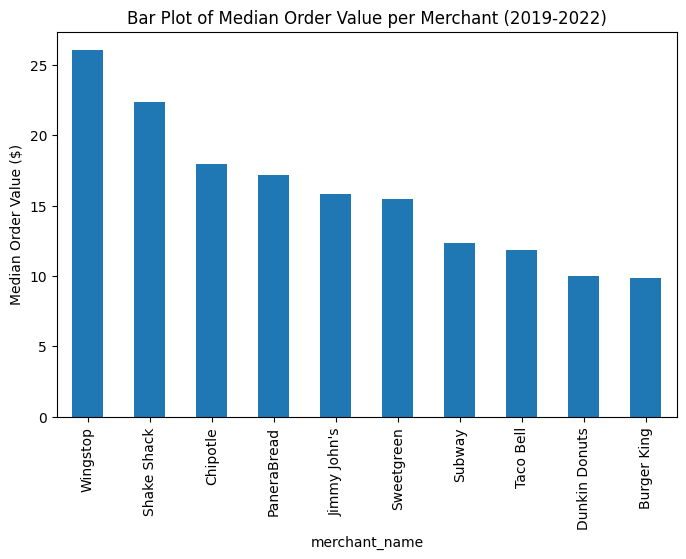

In [17]:
# Median order value
df_trans_merged_md_order = df_trans_merged.groupby('merchant_name')['order_total'].median().sort_values(ascending = False)
print(df_trans_merged_md_order)
fig, ax = plt.subplots(figsize = (8,5))
df_trans_merged_md_order.plot.bar(ax = ax)
ax.set_title('Bar Plot of Median Order Value per Merchant (2019-2022)')
ax.set_ylabel('Median Order Value ($)')

merchant_name
Chipotle         30.010252
PaneraBread      19.696918
Dunkin Donuts    16.864369
Wingstop          8.072165
Subway            5.485840
Taco Bell         5.183047
Jimmy John's      5.009807
Sweetgreen        4.920688
Shake Shack       2.709785
Burger King       2.047128
Name: order_total, dtype: float64


Text(0, 0.5, '')

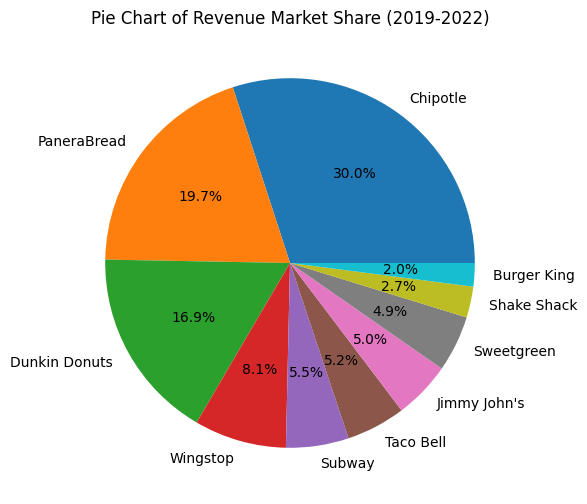

In [20]:
# revenue market share
total_revenue = df_trans_merged['order_total'].sum()
df_trans_merged_mk_share = df_trans_merged.groupby('merchant_name')['order_total'].sum().sort_values(ascending=False)/total_revenue*100
print(df_trans_merged_mk_share)

fig, ax = plt.subplots(figsize = (9,6))
df_trans_merged_mk_share.plot.pie(ax = ax, autopct='%1.1f%%')
ax.set_title('Pie Chart of Revenue Market Share (2019-2022)')
ax.set_ylabel('')




merchant_name
Chipotle         27.489053
Dunkin Donuts    21.129384
PaneraBread      17.259494
Subway            7.126957
Taco Bell         6.933920
Wingstop          5.226155
Jimmy John's      4.914465
Sweetgreen        4.760375
Burger King       3.158405
Shake Shack       2.001793
Name: order_id, dtype: float64


Text(0, 0.5, '')

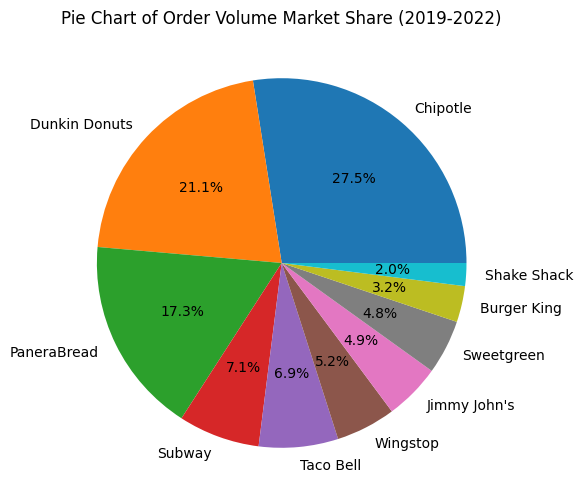

In [21]:
# order volume market share
total_nb_orders = df_trans_merged['order_id'].nunique() # make sure that this is = df_trans_merged.shape[0]
df_trans_merged_vol_share = df_trans_merged.groupby('merchant_name')['order_id'].count().sort_values(ascending=False)/total_nb_orders*100
print(df_trans_merged_vol_share)

fig, ax = plt.subplots(figsize = (9,6))
df_trans_merged_vol_share.plot.pie(ax = ax, autopct='%1.1f%%')
ax.set_title('Pie Chart of Order Volume Market Share (2019-2022)')
ax.set_ylabel('')

merchant_name
Chipotle         955666
Dunkin Donuts    734570
PaneraBread      600032
Subway           247771
Taco Bell        241060
Wingstop         181689
Jimmy John's     170853
Sweetgreen       165496
Burger King      109803
Shake Shack       69593
Name: order_id, dtype: int64


Text(0, 0.5, 'Number of Orders')

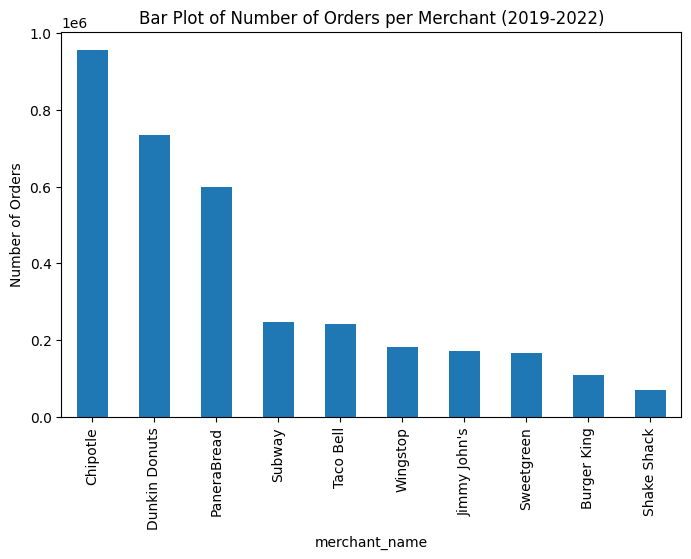

In [22]:
# number of orders
df_trans_merged_nb_of_orders = df_trans_merged.groupby('merchant_name')['order_id'].count().sort_values(ascending=False)
print(df_trans_merged_nb_of_orders)

fig, ax = plt.subplots(figsize = (8,5))
df_trans_merged_nb_of_orders.plot.bar(ax = ax)
ax.set_title('Bar Plot of Number of Orders per Merchant (2019-2022)')
ax.set_ylabel('Number of Orders')

merchant_name
Chipotle         98423
PaneraBread      79954
Wingstop         41863
Subway           39152
Taco Bell        34117
Jimmy John's     24137
Dunkin Donuts    23707
Shake Shack      20883
Burger King      19476
Sweetgreen       14036
Name: user_id, dtype: int64


Text(0, 0.5, 'Number of Customers')

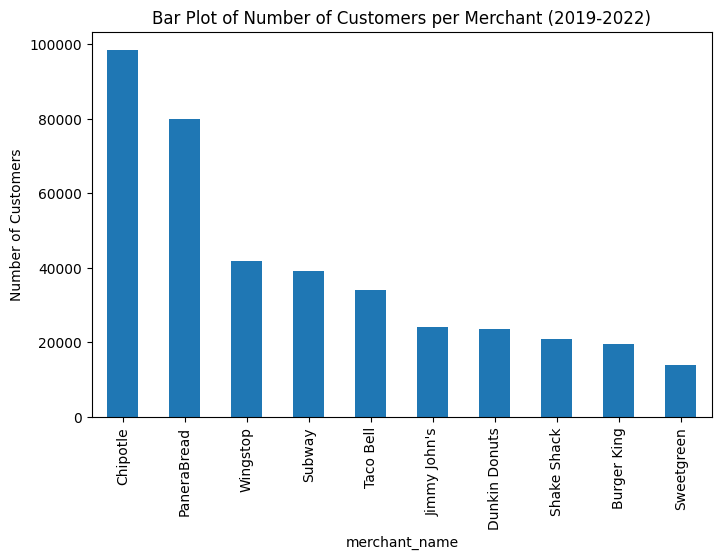

In [23]:
# number of UNIQUE customers
df_trans_merged_nb_customers = df_trans_merged.groupby('merchant_name')['user_id'].nunique().sort_values(ascending=False)
print(df_trans_merged_nb_customers)

fig, ax = plt.subplots(figsize = (8,5))
df_trans_merged_nb_customers.plot.bar(ax = ax)
ax.set_title('Bar Plot of Number of Customers per Merchant (2019-2022)')
ax.set_ylabel('Number of Customers')

# Overall Metrics -- Quarterly

In this section, we look at overall metrics on a quarterly basis.

In [24]:
# use order_date to find quarter
df_trans_qua = df_trans_merged.assign(quarter = df_trans_merged['order_date'].dt.to_period('Q'))
df_trans_qua.head()

merchant_id                               user_id  \
0         1712  ecdc60b4-1213-32b0-81cb-2896ec4f0eab   
1         1712  47520794-f426-3c78-91fe-f7da798b4fb3   
2         1712  c82a5f04-342b-39f1-8281-b5e1dce31047   
3         1712  a893e27d-8dbd-3a4e-9d3d-c0d72ac356ad   
4         1712  4af7e167-4174-34b8-9967-7a24ad416cb0   

                               order_id  order_total order_date merchant_name  \
0  4efd00e3-55dd-31ce-8887-3f53a4a32b15        21.08 2022-05-23   PaneraBread   
1  73e147de-b626-3bf4-9d75-3cefa53bfb9c        13.01 2021-01-15   PaneraBread   
2  73f5c3af-8fa5-336f-8dfa-0925253ca8b0        35.71 2021-08-17   PaneraBread   
3  df10f3cf-8f4e-3ebf-b0e1-b0296e3833cf        76.18 2022-07-18   PaneraBread   
4  6bd6e5b9-c422-3b2b-8eb2-c9a991c1dc42        29.43 2022-01-08   PaneraBread   

  quarter  
0  2022Q2  
1  2021Q1  
2  2021Q3  
3  2022Q3  
4  2022Q1

In [25]:
# Average order value
df_trans_qua_avg_order = df_trans_qua.groupby(['quarter', 'merchant_name'])['order_total'].mean()
df_trans_qua_avg_order_pivot = df_trans_qua_avg_order.reset_index().pivot(index = 'merchant_name', columns = 'quarter', values = 'order_total')

display(df_trans_qua_avg_order_pivot.head())

writer = pd.ExcelWriter('output/output.xlsx', engine='xlsxwriter')
df_trans_qua_avg_order_pivot.to_excel(writer,
             sheet_name="Overall",
             startrow=0, index_label = 'Average Order Value ($)', na_rep = 0)

quarter           2019Q1     2019Q2     2019Q3     2019Q4     2020Q1  \
merchant_name                                                          
Burger King          NaN        NaN        NaN   8.909273  10.208344   
Chipotle       18.258749  17.887881  17.811447  18.266827  19.092063   
Dunkin Donuts  15.195228  15.410877  15.294875  15.315518  15.121293   
Jimmy John's   18.354651  17.804716  17.529439  16.647765  16.714429   
PaneraBread    20.759973  20.922246  21.158645  20.936344  21.646988   

quarter           2020Q2     2020Q3     2020Q4     2021Q1     2021Q2  \
merchant_name                                                          
Burger King    13.659453  11.991401  12.484146  13.181397  12.236078   
Chipotle       20.968337  20.316852  21.021150  21.699825  21.594643   
Dunkin Donuts  15.651061  15.667849  15.717786  15.516379  15.600918   
Jimmy John's   19.444855  18.082917  18.308541  18.813043  19.602310   
PaneraBread    24.276899  21.787126  22.464766  22.468105  22.354154   

quarter           2021Q3     2021Q4     2022Q1     2022Q2     2022Q3  \
merchant_name                                                          
Burger King    12.454062  12.793786  13.216450  12.915154  12.871297   
Chipotle       21.629075  21.706787  22.456099  22.815026  22.920175   
Dunkin Donuts  15.553553  15.829744  15.686620  15.954509  15.762984   
Jimmy John's   20.257404  20.483595  20.746592  22.029354  21.438497   
PaneraBread    22.594952  23.043155  23.181125  22.153290  22.726676   

quarter           2022Q4  
merchant_name             
Burger King    13.039936  
Chipotle       23.702085  
Dunkin Donuts  15.906656  
Jimmy John's   22.233572  
PaneraBread    23.305199

Text(0.5, 1.0, 'Average order value per merchant ($)')

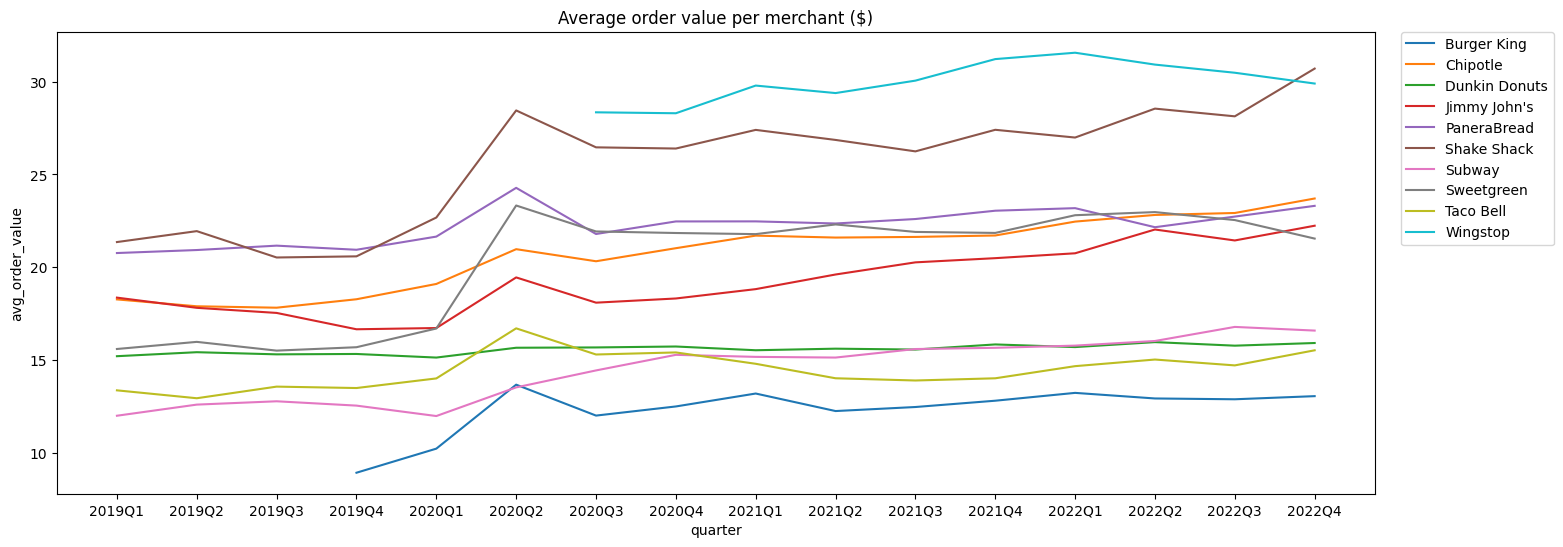

In [26]:
fig, ax = plt.subplots(figsize = (17,6))

df_trans_qua_avg_order_pivot_trans = df_trans_qua_avg_order_pivot.T.reset_index()
df_trans_qua_avg_order_pivot_trans_m = df_trans_qua_avg_order_pivot_trans.melt('quarter', var_name='merchant', value_name='avg_order_value')
sns.lineplot(data = df_trans_qua_avg_order_pivot_trans_m, x = df_trans_qua_avg_order_pivot_trans_m['quarter'].astype(str), y = 'avg_order_value', hue = 'merchant', ax = ax)
ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
ax.set_title('Average order value per merchant ($)')

In [27]:
# Median order value

df_trans_qua_md_order = df_trans_qua.groupby(['quarter', 'merchant_name'])['order_total'].median()
df_trans_qua_md_order_pivot = df_trans_qua_md_order.reset_index().pivot(index = 'merchant_name', columns = 'quarter', values = 'order_total')

display(df_trans_qua_md_order_pivot.head())

df_trans_qua_md_order_pivot.to_excel(writer,
             sheet_name="Overall",
             startrow=14, index_label = 'Median Order Value ($)', na_rep = 0)

quarter        2019Q1  2019Q2  2019Q3  2019Q4  2020Q1  2020Q2  2020Q3  2020Q4  \
merchant_name                                                                   
Burger King       NaN     NaN     NaN    6.50    7.52  11.550    9.37    9.74   
Chipotle        15.04  14.650  14.510   14.94   16.04  18.130   17.58   18.00   
Dunkin Donuts   10.00  10.000  10.000   10.00   10.00  10.000   10.00   10.00   
Jimmy John's    14.33  14.325  13.890   12.94   13.13  16.135   14.66   14.91   
PaneraBread     14.66  14.690  14.715   14.91   15.24  20.990   18.17   18.50   

quarter        2021Q1  2021Q2  2021Q3  2021Q4  2022Q1  2022Q2  2022Q3  2022Q4  
merchant_name                                                                  
Burger King     10.78    9.89   10.38   10.34    9.85    9.73    9.72   10.05  
Chipotle        18.56   18.19   18.07   18.09   18.76   18.94   18.73   19.42  
Dunkin Donuts   10.00   10.00   10.00   10.00   10.00   10.00   10.00   10.00  
Jimmy John's    15.30   15.61   16.00   16.12   16.72   17.23   17.03   17.58  
PaneraBread     18.43   17.85   17.87   17.89   18.00   17.08   17.46   18.00

Text(0.5, 1.0, 'Median order value per merchant ($)')

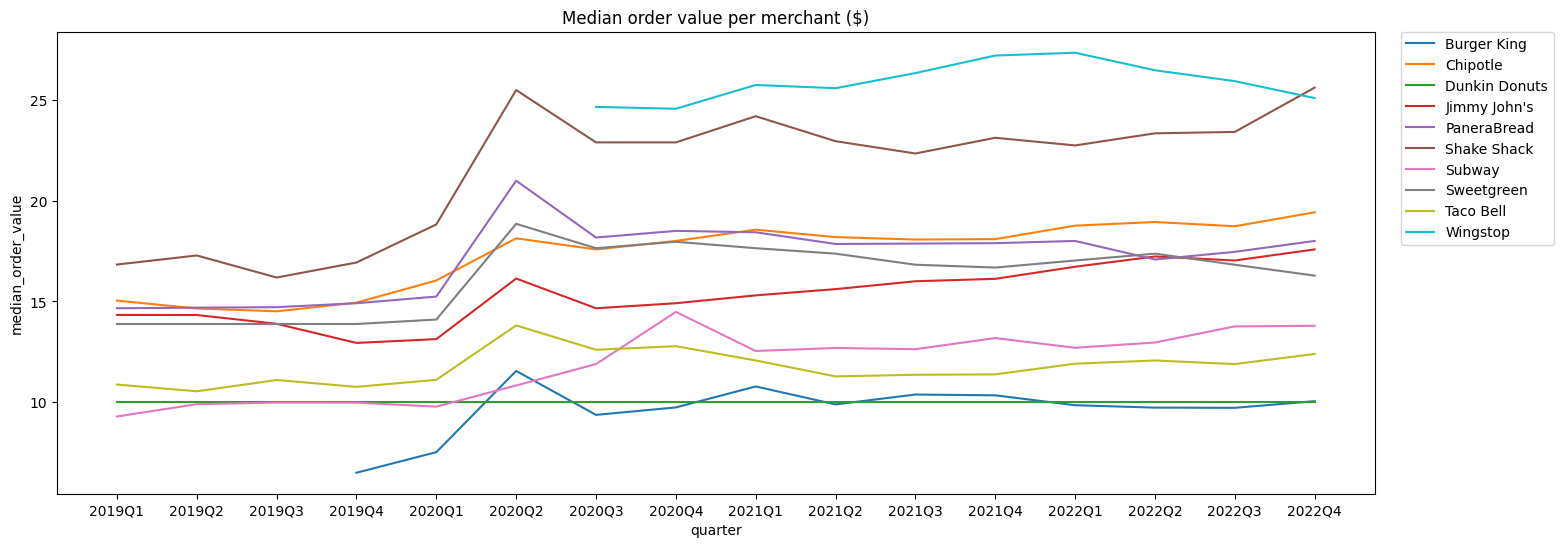

In [28]:
fig, ax = plt.subplots(figsize = (17,6))

df_trans_qua_md_order_pivot_trans = df_trans_qua_md_order_pivot.T.reset_index()
df_trans_qua_md_order_pivot_trans_m = df_trans_qua_md_order_pivot_trans.melt('quarter', var_name='merchant', value_name='median_order_value')
sns.lineplot(data = df_trans_qua_md_order_pivot_trans_m, x = df_trans_qua_md_order_pivot_trans_m['quarter'].astype(str), y = 'median_order_value', hue = 'merchant', ax = ax)
ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
ax.set_title('Median order value per merchant ($)')

In [29]:
# revenue market share
df_trans_qua['total_rev_per_quarter'] = df_trans_qua['order_total'].groupby(df_trans_qua['quarter']).transform('sum')
df_trans_qua['order_total_ratio'] = df_trans_qua['order_total']/df_trans_qua['total_rev_per_quarter']
df_trans_merged_mk_share = df_trans_qua.groupby(['quarter', 'merchant_name'])['order_total_ratio'].sum()*100
df_trans_merged_mk_share_pivot = df_trans_merged_mk_share.reset_index().pivot(index = 'merchant_name', columns = 'quarter', values = 'order_total_ratio')

display(df_trans_merged_mk_share_pivot.head(10))

df_trans_merged_mk_share_pivot.to_excel(writer,
             sheet_name="Overall",
             startrow=28, index_label = 'Revenue Market Share', na_rep = 0)

quarter           2019Q1     2019Q2     2019Q3     2019Q4     2020Q1  \
merchant_name                                                          
Burger King          NaN        NaN        NaN   0.434829   1.611573   
Chipotle       18.506770  22.788503  23.318960  24.633633  31.248539   
Dunkin Donuts  24.240694  25.357943  25.610799  23.261859  18.300138   
Jimmy John's    4.928327   4.299746   4.214069   4.409381   4.388946   
PaneraBread    34.741243  29.475763  29.147051  29.863080  24.843562   
Shake Shack     2.769183   2.807690   2.358106   2.425404   2.388170   
Subway          2.381780   3.247382   3.462811   3.891913   5.559740   
Sweetgreen      9.025193   9.139679   8.852770   7.697944   7.916865   
Taco Bell       3.406810   2.883294   3.035434   3.381956   3.742466   
Wingstop             NaN        NaN        NaN        NaN        NaN   

quarter           2020Q2     2020Q3     2020Q4     2021Q1     2021Q2  \
merchant_name                                                          
Burger King     2.494437   2.116745   1.745643   1.972039   1.978627   
Chipotle       44.399093  34.698236  33.143562  33.807897  31.631584   
Dunkin Donuts  12.650560  16.361444  16.067890  14.651414  17.051253   
Jimmy John's    3.432003   3.228062   3.022184   4.374882   5.834386   
PaneraBread    17.935236  19.988997  20.993308  18.658462  16.653953   
Shake Shack     3.744259   3.465144   3.421350   3.129773   2.843751   
Subway          7.669768   7.177258   5.417061   4.620699   5.199418   
Sweetgreen      3.357934   4.383031   4.015392   3.760720   4.372470   
Taco Bell       4.316711   4.687728   4.640341   5.254195   5.497811   
Wingstop             NaN   3.893355   7.533269   9.769917   8.936748   

quarter           2021Q3     2021Q4     2022Q1     2022Q2     2022Q3  \
merchant_name                                                          
Burger King     2.009712   2.548784   2.528674   2.632168   2.593641   
Chipotle       29.198712  28.504499  30.395394  27.695818  27.476113   
Dunkin Donuts  17.337565  16.806067  15.077854  17.093706  14.439741   
Jimmy John's    5.865348   5.428598   5.763175   5.935648   6.028470   
PaneraBread    16.579818  17.552815  16.979665  16.561179  17.731746   
Shake Shack     2.485585   2.550352   2.246999   2.197077   2.258969   
Subway          5.128135   5.161077   5.667318   6.268053   6.500208   
Sweetgreen      4.486792   4.207023   4.793888   4.783978   4.662351   
Taco Bell       5.697571   5.607805   5.050795   5.831645   6.103359   
Wingstop       11.210762  11.632981  11.496238  11.000728  12.205400   

quarter           2022Q4  
merchant_name             
Burger King     2.655479  
Chipotle       26.039569  
Dunkin Donuts  15.288547  
Jimmy John's    5.599022  
PaneraBread    20.659671  
Shake Shack     2.560101  
Subway          5.441468  
Sweetgreen      4.256824  
Taco Bell       6.928316  
Wingstop       10.571003

Text(0.5, 1.0, 'Revenue market share per merchant (%)')

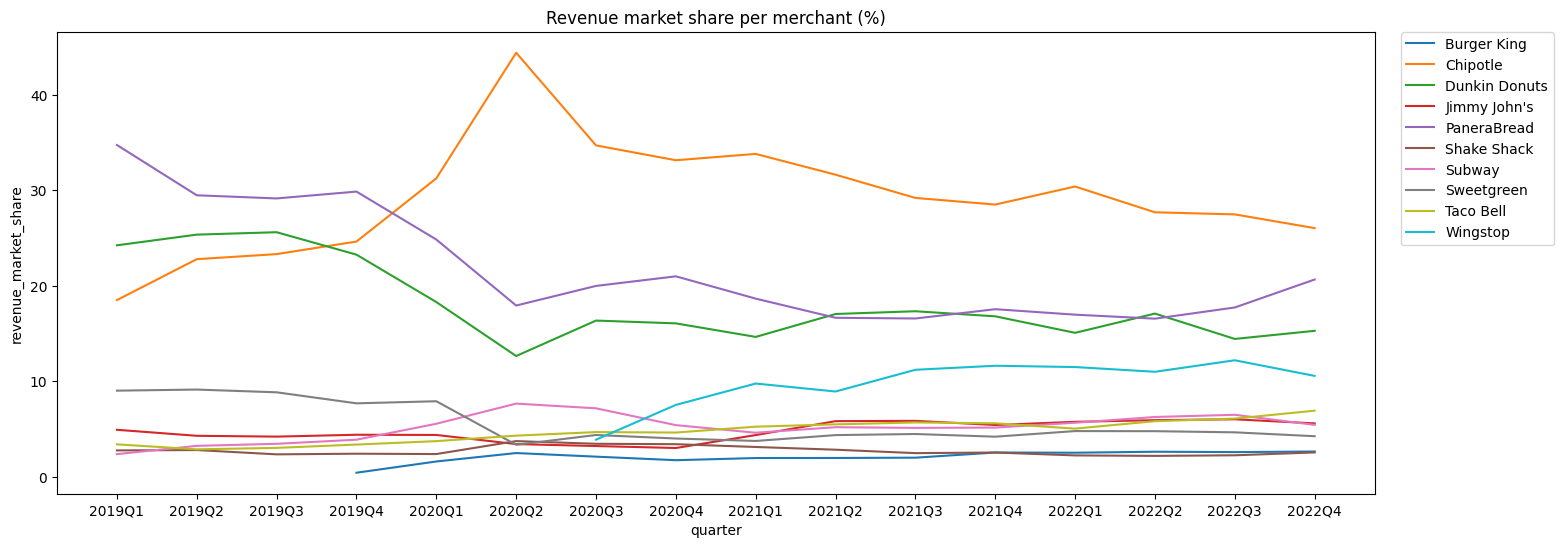

In [30]:
fig, ax = plt.subplots(figsize = (17,6))

df_trans_merged_mk_share_pivot_trans = df_trans_merged_mk_share_pivot.T.reset_index()
df_trans_merged_mk_share_pivot_trans_m = df_trans_merged_mk_share_pivot_trans.melt('quarter', var_name='merchant', value_name='revenue_market_share')
sns.lineplot(data = df_trans_merged_mk_share_pivot_trans_m, x = df_trans_merged_mk_share_pivot_trans_m['quarter'].astype(str), y = 'revenue_market_share', hue = 'merchant', ax = ax)
ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
ax.set_title('Revenue market share per merchant (%)')

In [31]:
# order volume market share

df_trans_qua['total_orders_per_quarter'] = df_trans_qua['order_id'].groupby(df_trans_qua['quarter']).transform('nunique')
df_trans_qua['order_number_ratio'] = 1/df_trans_qua['total_orders_per_quarter']
df_trans_merged_nb_mk_share = df_trans_qua.groupby(['quarter', 'merchant_name'])['order_number_ratio'].sum()*100
df_trans_merged_nb_mk_share_pivot = df_trans_merged_nb_mk_share.reset_index().pivot(index = 'merchant_name', columns = 'quarter', values = 'order_number_ratio')

display(df_trans_merged_nb_mk_share_pivot.head(10))

df_trans_merged_nb_mk_share_pivot.to_excel(writer,
             sheet_name="Overall",
             startrow=42, index_label = 'Order Market Share', na_rep = 0)

quarter           2019Q1     2019Q2     2019Q3     2019Q4     2020Q1  \
merchant_name                                                          
Burger King          NaN        NaN        NaN   0.844725   2.756682   
Chipotle       17.739977  22.151329  22.638504  23.340164  28.580425   
Dunkin Donuts  27.921020  28.610770  28.954426  26.287621  21.132811   
Jimmy John's    4.699448   4.199046   4.156917   4.584166   4.585223   
PaneraBread    29.289504  24.496251  23.820152  24.687227  20.040484   
Shake Shack     2.269868   2.224949   1.987113   2.039616   1.839037   
Subway          3.478641   4.487162   4.691494   5.376149   8.112606   
Sweetgreen     10.136192   9.952284   9.878865   8.497393   8.283540   
Taco Bell       4.465350   3.878209   3.872530   4.342939   4.669191   
Wingstop             NaN        NaN        NaN        NaN        NaN   

quarter           2020Q2     2020Q3     2020Q4     2021Q1     2021Q2  \
merchant_name                                                          
Burger King     3.563039   3.332522   2.755712   2.998269   3.167872   
Chipotle       41.313464  32.242261  31.072766  31.223271  28.695962   
Dunkin Donuts  15.770572  19.714545  20.146736  18.923681  21.411743   
Jimmy John's    3.443693   3.370140   3.253152   4.660406   5.830876   
PaneraBread    14.414361  17.320705  18.416885  16.642780  14.595029   
Shake Shack     2.567580   2.472174   2.554327   2.288927   2.073993   
Subway         11.074282   9.391693   6.992125   6.108901   6.735934   
Sweetgreen      2.808986   3.774203   3.623220   3.460335   3.840691   
Taco Bell       5.044023   5.789206   5.939154   7.121700   7.690806   
Wingstop             NaN   2.592552   5.245923   6.571731   5.957093   

quarter           2021Q3     2021Q4     2022Q1     2022Q2     2022Q3  \
merchant_name                                                          
Burger King     3.188261   3.992928   3.922193   4.136592   4.139411   
Chipotle       26.672070  26.319364  27.747538  24.638935  24.625686   
Dunkin Donuts  22.023658  21.278927  19.704307  21.746104  18.817933   
Jimmy John's    5.720592   5.311767   5.694636   5.468838   5.776487   
PaneraBread    14.497707  15.267304  15.015700  15.173358  16.027528   
Shake Shack     1.871228   1.865000   1.706638   1.561910   1.649371   
Subway          6.502397   6.610650   7.369087   7.943767   7.960190   
Sweetgreen      4.048005   3.859889   4.310228   4.227397   4.249369   
Taco Bell       8.107735   8.026468   7.063666   7.883120   8.529654   
Wingstop        7.368348   7.467703   7.466007   7.219980   8.224371   

quarter           2022Q4  
merchant_name             
Burger King     4.232781  
Chipotle       22.835242  
Dunkin Donuts  19.977711  
Jimmy John's    5.234333  
PaneraBread    18.425912  
Shake Shack     1.732762  
Subway          6.822913  
Sweetgreen      4.107725  
Taco Bell       9.282840  
Wingstop        7.347781

In [109]:
df_trans_qua.loc[df_trans_qua['quarter'] == '2022Q4', 'total_orders_per_quarter']

6          271878
22         271878
31         271878
42         271878
43         271878
            ...  
3476479    271878
3476490    271878
3476506    271878
3476510    271878
3476513    271878
Name: total_orders_per_quarter, Length: 271878, dtype: int64

Text(0.5, 1.0, 'Order count market share per merchant (%)')

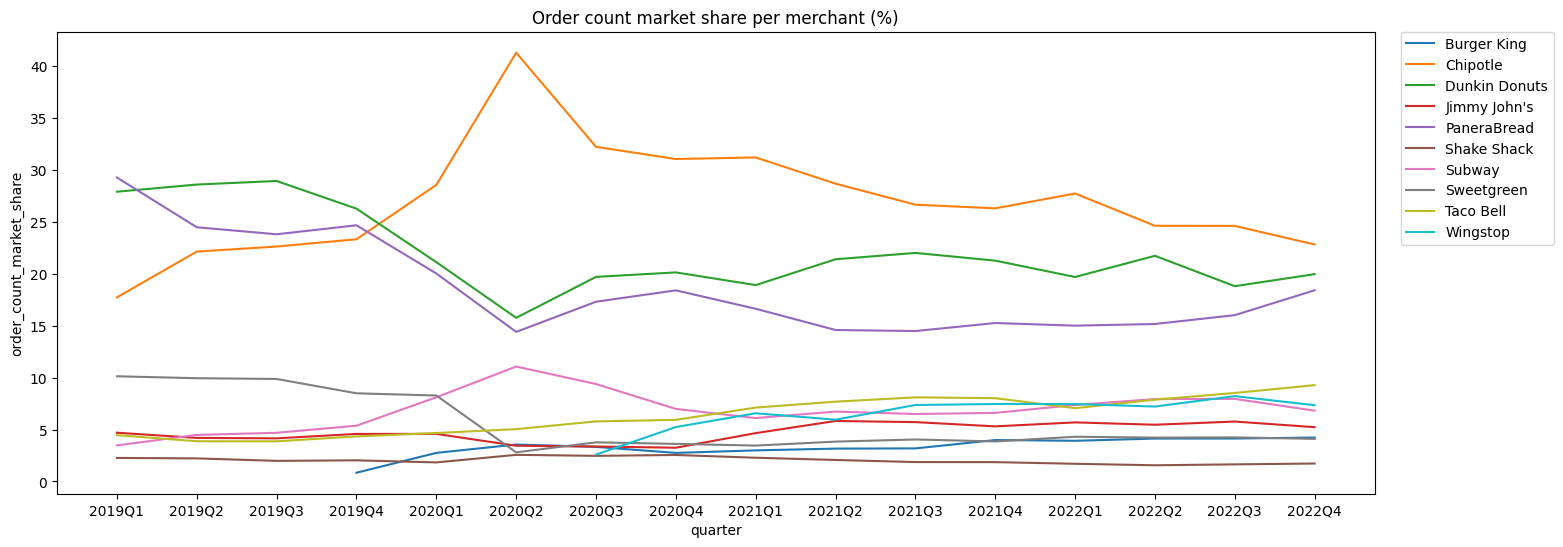

In [32]:
fig, ax = plt.subplots(figsize = (17,6))

df_trans_merged_nb_mk_share_pivot_trans = df_trans_merged_nb_mk_share_pivot.T.reset_index()
df_trans_merged_nb_mk_share_pivot_trans_m = df_trans_merged_nb_mk_share_pivot_trans.melt('quarter', var_name='merchant', value_name='order_count_market_share')
sns.lineplot(data = df_trans_merged_nb_mk_share_pivot_trans_m, x = df_trans_merged_nb_mk_share_pivot_trans_m['quarter'].astype(str), y = 'order_count_market_share', hue = 'merchant', ax = ax)
ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
ax.set_title('Order count market share per merchant (%)')

In [33]:
# number of orders

df_trans_qua_nb_order = df_trans_qua.groupby(['quarter', 'merchant_name'])['order_id'].nunique()
df_trans_qua_nb_order_pivot = df_trans_qua_nb_order.reset_index().pivot(index = 'merchant_name', columns = 'quarter', values = 'order_id')

display(df_trans_qua_nb_order_pivot.head())

df_trans_qua_nb_order_pivot.to_excel(writer,
             sheet_name="Overall",
             startrow=56, index_label = 'Number of Orders', na_rep = 0)

quarter         2019Q1   2019Q2   2019Q3   2019Q4   2020Q1   2020Q2   2020Q3  \
merchant_name                                                                  
Burger King        NaN      NaN      NaN    977.0   3677.0   6568.0   7530.0   
Chipotle       16217.0  24372.0  25155.0  26995.0  38122.0  76156.0  72853.0   
Dunkin Donuts  25524.0  31479.0  32173.0  30404.0  28188.0  29071.0  44546.0   
Jimmy John's    4296.0   4620.0   4619.0   5302.0   6116.0   6348.0   7615.0   
PaneraBread    26775.0  26952.0  26468.0  28553.0  26731.0  26571.0  39137.0   

quarter         2020Q4   2021Q1   2021Q2   2021Q3   2021Q4   2022Q1   2022Q2  \
merchant_name                                                                  
Burger King     6404.0   7845.0   9412.0   9245.0  11405.0  10967.0  12482.0   
Chipotle       72210.0  81696.0  85258.0  77341.0  75176.0  77586.0  74347.0   
Dunkin Donuts  46819.0  49514.0  63616.0  63862.0  60779.0  55096.0  65618.0   
Jimmy John's    7560.0  12194.0  17324.0  16588.0  15172.0  15923.0  16502.0   
PaneraBread    42799.0  43546.0  43363.0  42039.0  43608.0  41986.0  45785.0   

quarter         2022Q3   2022Q4  
merchant_name                    
Burger King    11783.0  11508.0  
Chipotle       70098.0  62084.0  
Dunkin Donuts  53566.0  54315.0  
Jimmy John's   16443.0  14231.0  
PaneraBread    45623.0  50096.0

Text(0.5, 1.0, 'Number of orders per merchant')

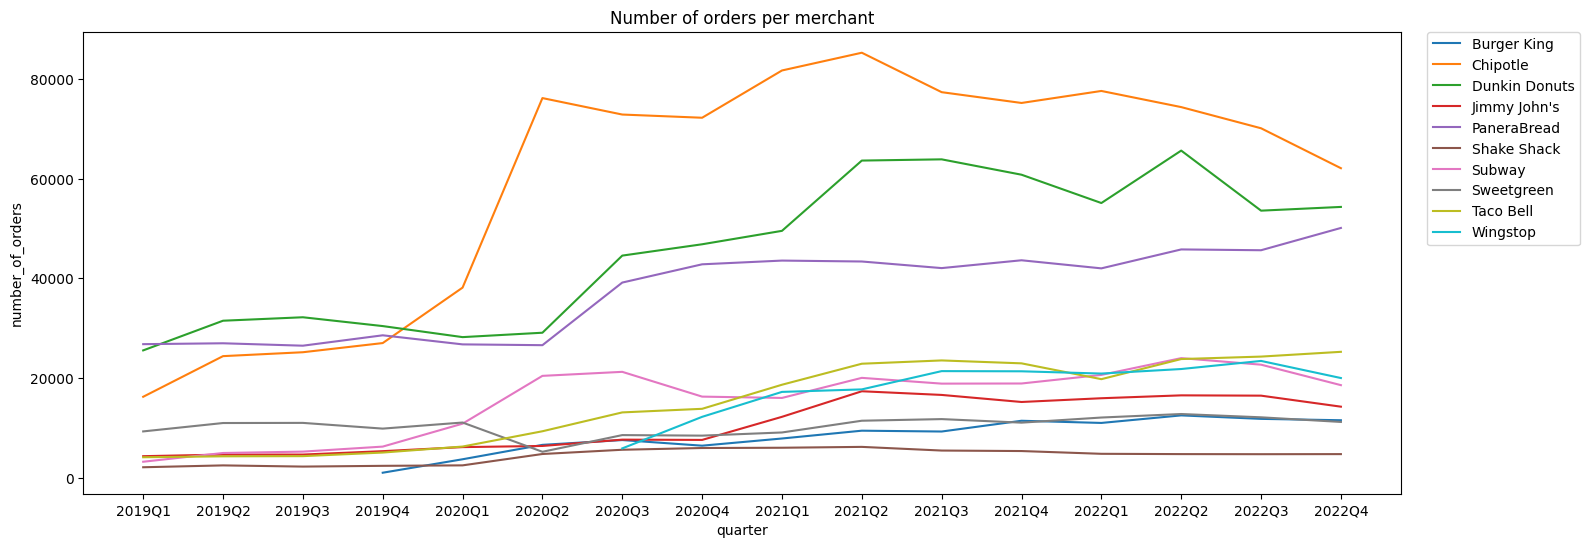

In [34]:
fig, ax = plt.subplots(figsize = (17,6))

df_trans_qua_nb_order_pivot_trans = df_trans_qua_nb_order_pivot.T.reset_index()
df_trans_qua_nb_order_pivot_trans_m = df_trans_qua_nb_order_pivot_trans.melt('quarter', var_name='merchant', value_name='number_of_orders')
sns.lineplot(data = df_trans_qua_nb_order_pivot_trans_m, x = df_trans_qua_nb_order_pivot_trans_m['quarter'].astype(str), y = 'number_of_orders', hue = 'merchant', ax = ax)
ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
ax.set_title('Number of orders per merchant')

In [35]:
# number of customers

df_trans_qua_nb_cust = df_trans_qua.groupby(['quarter', 'merchant_name'])['user_id'].nunique()
df_trans_qua_nb_cust_pivot = df_trans_qua_nb_cust.reset_index().pivot(index = 'merchant_name', columns = 'quarter', values = 'user_id')

display(df_trans_qua_nb_cust_pivot.head())

df_trans_qua_nb_cust_pivot.to_excel(writer,
             sheet_name="Overall",
             startrow=70, index_label = 'Number of Customers', na_rep = 0)

quarter         2019Q1   2019Q2   2019Q3   2019Q4   2020Q1   2020Q2   2020Q3  \
merchant_name                                                                  
Burger King        NaN      NaN      NaN    608.0   1842.0   3161.0   3332.0   
Chipotle        7991.0  10471.0  10792.0  11557.0  16779.0  28371.0  27001.0   
Dunkin Donuts   5612.0   6207.0   6517.0   6439.0   6229.0   6206.0   8212.0   
Jimmy John's    2021.0   2199.0   2196.0   2252.0   2816.0   3078.0   3474.0   
PaneraBread    11936.0  11759.0  11710.0  12631.0  12214.0  13071.0  17094.0   

quarter         2020Q4   2021Q1   2021Q2   2021Q3   2021Q4   2022Q1   2022Q2  \
merchant_name                                                                  
Burger King     3112.0   3561.0   3925.0   3988.0   4817.0   4681.0   5082.0   
Chipotle       27808.0  30885.0  31977.0  29199.0  29098.0  29644.0  28367.0   
Dunkin Donuts   8721.0   9260.0  10480.0  10887.0  10661.0  10130.0  10867.0   
Jimmy John's    3352.0   5291.0   6620.0   6600.0   6206.0   6492.0   6797.0   
PaneraBread    18630.0  18512.0  17988.0  17656.0  18542.0  18097.0  18163.0   

quarter         2022Q3   2022Q4  
merchant_name                    
Burger King     4897.0   4570.0  
Chipotle       27231.0  24713.0  
Dunkin Donuts   9970.0  10084.0  
Jimmy John's    6742.0   5920.0  
PaneraBread    18523.0  20092.0

Text(0.5, 1.0, 'Number of customers per merchant')

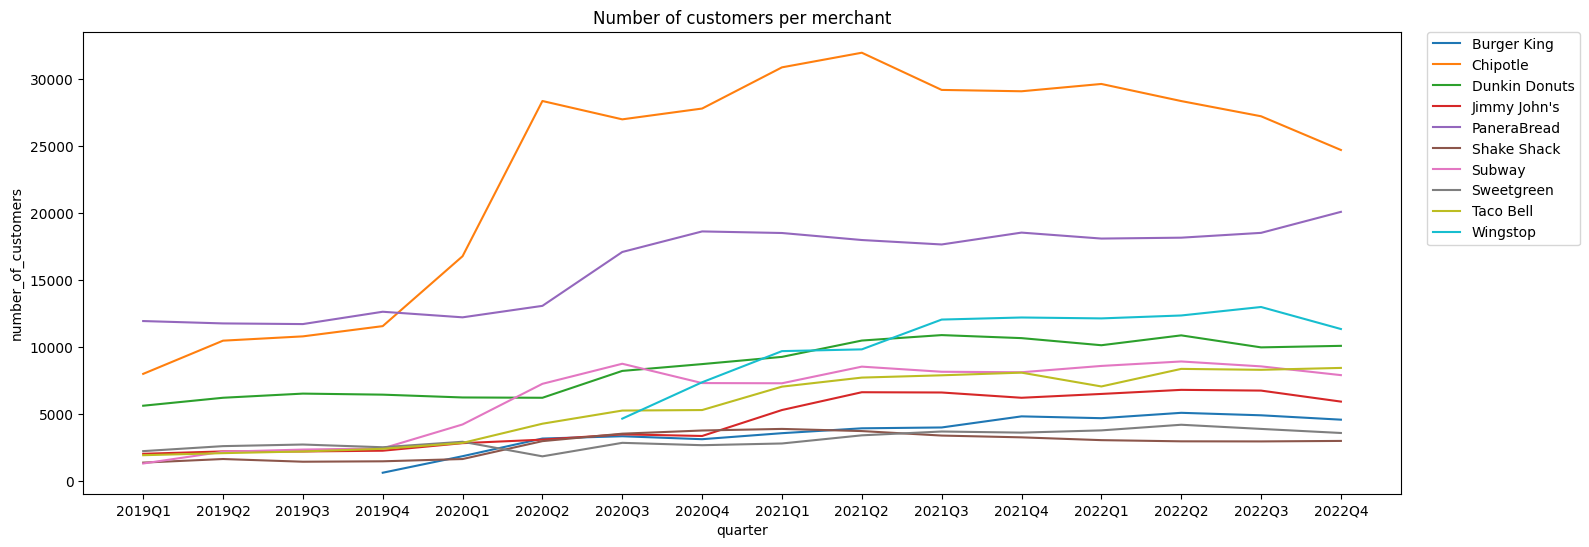

In [36]:
fig, ax = plt.subplots(figsize = (17,6))

df_trans_qua_nb_cust_pivot_trans = df_trans_qua_nb_cust_pivot.T.reset_index()
df_trans_qua_nb_cust_pivot_trans_m = df_trans_qua_nb_cust_pivot_trans.melt('quarter', var_name='merchant', value_name='number_of_customers')
sns.lineplot(data = df_trans_qua_nb_cust_pivot_trans_m, x = df_trans_qua_nb_cust_pivot_trans_m['quarter'].astype(str), y = 'number_of_customers', hue = 'merchant', ax = ax)
ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
ax.set_title('Number of customers per merchant')

# State Revenue Market Share -- Total

In this section, we look at total time frame.

In [37]:
# merge df_trans_merged with df_user to get state information

df_trans_merged_state = df_trans_merged.merge(df_user[['user_id', 'state_name']], how = 'inner', on = 'user_id')
df_trans_merged_state.head()

merchant_id                               user_id  \
0         1712  ecdc60b4-1213-32b0-81cb-2896ec4f0eab   
1         1712  ecdc60b4-1213-32b0-81cb-2896ec4f0eab   
2         1712  ecdc60b4-1213-32b0-81cb-2896ec4f0eab   
3         1712  ecdc60b4-1213-32b0-81cb-2896ec4f0eab   
4         1712  ecdc60b4-1213-32b0-81cb-2896ec4f0eab   

                               order_id  order_total order_date merchant_name  \
0  4efd00e3-55dd-31ce-8887-3f53a4a32b15        21.08 2022-05-23   PaneraBread   
1  700b4d41-d6cb-3754-b4e0-86bbc27f46b5        11.13 2020-10-29   PaneraBread   
2  63cf4a79-9607-3e3c-baff-80488ee71692        12.32 2021-05-03   PaneraBread   
3  40cd876b-9dee-3d71-824e-462402cf863a        18.26 2022-09-12   PaneraBread   
4  77adac87-71ad-3b55-8e35-152d726a7c6e        14.04 2020-09-28   PaneraBread   

  state_name  
0         TX  
1         TX  
2         TX  
3         TX  
4         TX

In [38]:
# total revenue per state

aggregated = df_trans_merged_state.groupby(['state_name', 'merchant_name'])['order_total'].sum().reset_index()
sorted_aggregated = aggregated.groupby(['state_name']).apply(lambda x: x.sort_values('order_total', ascending=False)).reset_index(drop=True)
sorted_aggregated

state_name  merchant_name  order_total
0          CA       Chipotle   4962554.65
1          CA    PaneraBread   2439717.12
2          CA       Wingstop   1771247.45
3          CA         Subway    994757.18
4          CA     Sweetgreen    898849.41
..        ...            ...          ...
95         WY  Dunkin Donuts      1963.00
96         WY    Burger King      1583.18
97         WY    Shake Shack       482.68
98         WY       Wingstop       374.74
99         WY     Sweetgreen       354.32

[100 rows x 3 columns]

In [39]:
# print leader for each state:
for state in sorted_aggregated['state_name'].unique():
    print(f"The leader in state of {state} is {sorted_aggregated.loc[sorted_aggregated['state_name'] == state,'merchant_name'].head(1).values[0]}")

The leader in state of CA is Chipotle
The leader in state of CO is Chipotle
The leader in state of FL is Chipotle
The leader in state of IA is Jimmy John's
The leader in state of NH is Dunkin Donuts
The leader in state of NJ is Dunkin Donuts
The leader in state of NY is Dunkin Donuts
The leader in state of PA is Dunkin Donuts
The leader in state of TX is Chipotle
The leader in state of WY is Jimmy John's


In [40]:
# revenue market share within each state
total_per_state = df_trans_merged_state.groupby(['state_name'])['order_total'].sum().reset_index()
# merge sorted_aggregated with total_per_state
sorted_aggregated_merged = sorted_aggregated.merge(total_per_state, how = 'inner', on = 'state_name', suffixes = ('_per', '_total'))
sorted_aggregated_merged['rev_market_share'] = sorted_aggregated_merged['order_total_per']/sorted_aggregated_merged['order_total_total']*100
sorted_aggregated_merged_grouped_st = sorted_aggregated_merged.groupby(['state_name']).apply(lambda x: x.sort_values('rev_market_share', ascending=False)).reset_index(drop=True)
sorted_aggregated_merged_grouped_st

state_name  merchant_name  order_total_per  order_total_total  \
0          CA       Chipotle       4962554.65        13279104.44   
1          CA    PaneraBread       2439717.12        13279104.44   
2          CA       Wingstop       1771247.45        13279104.44   
3          CA         Subway        994757.18        13279104.44   
4          CA     Sweetgreen        898849.41        13279104.44   
..        ...            ...              ...                ...   
95         WY  Dunkin Donuts          1963.00          113263.98   
96         WY    Burger King          1583.18          113263.98   
97         WY    Shake Shack           482.68          113263.98   
98         WY       Wingstop           374.74          113263.98   
99         WY     Sweetgreen           354.32          113263.98   

    rev_market_share  
0          37.371155  
1          18.372603  
2          13.338606  
3           7.491147  
4           6.768901  
..               ...  
95          1.733119  
96          1.397779  
97          0.426155  
98          0.330855  
99          0.312827  

[100 rows x 5 columns]

In [41]:
# print leader for each state:
for state in sorted_aggregated_merged_grouped_st['state_name'].unique():
    print(f"The leader in state of {state} is {sorted_aggregated_merged_grouped_st.loc[sorted_aggregated_merged_grouped_st['state_name'] == state,'merchant_name'].head(1).values[0]}")

The leader in state of CA is Chipotle
The leader in state of CO is Chipotle
The leader in state of FL is Chipotle
The leader in state of IA is Jimmy John's
The leader in state of NH is Dunkin Donuts
The leader in state of NJ is Dunkin Donuts
The leader in state of NY is Dunkin Donuts
The leader in state of PA is Dunkin Donuts
The leader in state of TX is Chipotle
The leader in state of WY is Jimmy John's


# State Revenue Market Share -- Quarterly

In this section, we look at quarterly time frame.

In [42]:
# merge df_trans_qua with df_user to get state information

df_trans_qua_state = df_trans_qua.merge(df_user[['user_id', 'state_name']], how = 'inner', on = 'user_id')
df_trans_qua_state.head()

merchant_id                               user_id  \
0         1712  ecdc60b4-1213-32b0-81cb-2896ec4f0eab   
1         1712  ecdc60b4-1213-32b0-81cb-2896ec4f0eab   
2         1712  ecdc60b4-1213-32b0-81cb-2896ec4f0eab   
3         1712  ecdc60b4-1213-32b0-81cb-2896ec4f0eab   
4         1712  ecdc60b4-1213-32b0-81cb-2896ec4f0eab   

                               order_id  order_total order_date merchant_name  \
0  4efd00e3-55dd-31ce-8887-3f53a4a32b15        21.08 2022-05-23   PaneraBread   
1  700b4d41-d6cb-3754-b4e0-86bbc27f46b5        11.13 2020-10-29   PaneraBread   
2  63cf4a79-9607-3e3c-baff-80488ee71692        12.32 2021-05-03   PaneraBread   
3  40cd876b-9dee-3d71-824e-462402cf863a        18.26 2022-09-12   PaneraBread   
4  77adac87-71ad-3b55-8e35-152d726a7c6e        14.04 2020-09-28   PaneraBread   

  quarter  total_rev_per_quarter  order_total_ratio  total_orders_per_quarter  \
0  2022Q2             6124494.02           0.000003                    301746   
1  2020Q4             4579885.62           0.000002                    232390   
2  2021Q2             5820499.10           0.000002                    297108   
3  2022Q3             5847473.46           0.000003                    284654   
4  2020Q3             4265760.46           0.000003                    225955   

   order_number_ratio state_name  
0            0.000003         TX  
1            0.000004         TX  
2            0.000003         TX  
3            0.000004         TX  
4            0.000004         TX

In [43]:
# list of states

states = df_trans_qua_state['state_name'].unique().tolist()

In [44]:
# total revenues per state

for state in states:
    print(f"For {state}:")
    df_temp = df_trans_qua_state[df_trans_qua_state['state_name'] == state]
    df_temp_total_revenues = df_temp.groupby(['quarter', 'merchant_name'])['order_total'].sum()
    df_temp_total_revenues_pivot = df_temp_total_revenues.reset_index().pivot(index = 'merchant_name', columns = 'quarter', values = 'order_total')
    display(df_temp_total_revenues_pivot)
    print("Totals per quarter:")
    display(df_temp_total_revenues_pivot.sum(axis=0))
    

For TX:


quarter          2019Q1    2019Q2    2019Q3     2019Q4     2020Q1     2020Q2  \
merchant_name                                                                  
Burger King         NaN       NaN       NaN    1743.61    7267.58   17022.20   
Chipotle       62277.84  91348.66  98050.29  107701.31  162013.93  330246.97   
Dunkin Donuts  12345.00  11144.00  11109.00   10935.00   11452.00   14613.00   
Jimmy John's   28577.21  29029.21  29978.33   30402.04   35192.45   41664.84   
PaneraBread    82796.03  83066.22  85130.17   81977.56   84570.03   90714.34   
Shake Shack     6722.16   6448.96   6241.17    5420.95    7624.79   19962.85   
Subway         10560.89  19110.43  20430.93   20476.55   30729.96   58980.76   
Sweetgreen      3875.74   4697.13   4944.12    5303.07    7700.12    9433.43   
Taco Bell      12663.91  13671.11  14200.64   18175.97   22293.26   38374.49   
Wingstop            NaN       NaN       NaN        NaN        NaN        NaN   

quarter           2020Q3     2020Q4     2021Q1     2021Q2     2021Q3  \
merchant_name                                                          
Burger King     17718.53   13876.35   15895.77   20563.70   21641.74   
Chipotle       310795.70  301061.61  360496.32  393713.24  378791.54   
Dunkin Donuts   19712.00   22915.00   26485.00   30968.00   30859.00   
Jimmy John's    44397.77   45584.57   73644.14  115109.09  117055.78   
PaneraBread    118640.18  132583.16  122888.78  123527.73  125717.11   
Shake Shack     20451.67   20244.73   20354.98   19919.44   15791.13   
Subway          79729.46   69253.30   69156.91   85213.65   82329.99   
Sweetgreen      15022.03   15737.19   14837.38   17469.75   21104.88   
Taco Bell       49569.47   52862.50   66266.02   72892.61   76155.64   
Wingstop        84606.59  166922.95  243180.70  252007.61  322508.67   

quarter           2021Q4     2022Q1     2022Q2     2022Q3     2022Q4  
merchant_name                                                         
Burger King     25569.77   26810.39   27729.73   26280.18   25610.19  
Chipotle       381769.26  405305.28  401624.17  392483.71  351933.62  
Dunkin Donuts   30439.00   25606.00   28568.00   24181.00   22253.00  
Jimmy John's   108472.58  116518.40  126777.05  121723.24  105251.28  
PaneraBread    131812.69  129914.18  128963.79  129752.39  150463.59  
Shake Shack     17572.01   13901.74   13935.85   14879.91   17927.54  
Subway          81649.18   88430.42   95867.48  109343.16   84705.02  
Sweetgreen      23024.46   24899.38   26636.66   23004.89   22866.15  
Taco Bell       78464.97   67776.66   91203.56   92455.79  100948.06  
Wingstop       333575.64  332360.03  335892.59  360132.26  314001.50

Totals per quarter:


quarter
2019Q1     219818.78
2019Q2     258515.72
2019Q3     270084.65
2019Q4     282136.06
2020Q1     368844.12
2020Q2     621012.88
2020Q3     760643.40
2020Q4     841041.36
2021Q1    1013206.00
2021Q2    1131384.82
2021Q3    1191955.48
2021Q4    1212349.56
2022Q1    1231522.48
2022Q2    1277198.88
2022Q3    1294236.53
2022Q4    1195959.95
Freq: Q-DEC, dtype: float64

For NY:


quarter           2019Q1     2019Q2     2019Q3     2019Q4     2020Q1  \
merchant_name                                                          
Burger King          NaN        NaN        NaN    1716.18    7481.57   
Chipotle        40325.62   58215.29   60423.60   66062.16   92454.68   
Dunkin Donuts  126686.00  166178.00  166084.00  155990.00  135503.00   
Jimmy John's     3456.75    2584.02    2398.97    2344.60    2800.68   
PaneraBread     88825.91   90361.25   88690.20   97795.98   92742.46   
Shake Shack     17638.69   20330.66   16969.07   17905.03   18573.18   
Subway           3039.06    4920.21    5869.71    5990.14    9272.80   
Sweetgreen      79773.20  104164.05   96562.50   86969.41   98737.07   
Taco Bell        7179.95    6814.13    7357.63    8639.98   11317.65   
Wingstop             NaN        NaN        NaN        NaN        NaN   

quarter           2020Q2     2020Q3     2020Q4     2021Q1     2021Q2  \
merchant_name                                                          
Burger King     19065.61   18857.68   17345.76   25730.12   26545.30   
Chipotle       238209.29  194847.53  203538.10  235404.82  246143.57   
Dunkin Donuts  132891.00  221342.00  230048.00  232151.00  308535.00   
Jimmy John's     3224.25    4301.00    4712.80    6952.23    9593.50   
PaneraBread    115142.70  148317.57  168988.26  169993.82  172157.61   
Shake Shack     35562.62   38947.75   40804.29   42306.96   50123.40   
Subway          16816.57   24984.96   20171.85   19684.88   25308.59   
Sweetgreen      50796.81   78434.79   82482.84   88445.06  123609.78   
Taco Bell       22598.49   26585.16   27147.76   35260.56   40927.93   
Wingstop             NaN    3744.01    8698.89   12250.72   14876.71   

quarter           2021Q3     2021Q4     2022Q1     2022Q2     2022Q3  \
merchant_name                                                          
Burger King     27227.94   34378.67   34779.15   38801.80   35267.97   
Chipotle       216451.28  213871.42  225188.38  220255.73  201725.97   
Dunkin Donuts  308370.00  299703.00  268377.00  333810.00  263818.00   
Jimmy John's    10128.72   12991.76   10550.46   11596.34   11239.63   
PaneraBread    169787.67  174881.16  163317.23  182124.41  179006.23   
Shake Shack     41766.67   44778.24   41140.08   41261.07   40109.36   
Subway          24449.36   25803.93   26012.36   29562.79   27243.42   
Sweetgreen     116648.21  105132.17  120549.84  133052.47  116014.33   
Taco Bell       38318.36   38314.24   35060.07   41618.05   43890.95   
Wingstop        18053.36   19355.20   16961.69   18872.09   20372.97   

quarter           2022Q4  
merchant_name             
Burger King     35987.59  
Chipotle       189738.46  
Dunkin Donuts  275372.00  
Jimmy John's     9965.43  
PaneraBread    206220.80  
Shake Shack     45726.17  
Subway          26734.88  
Sweetgreen     102752.43  
Taco Bell       47008.97  
Wingstop        18711.40

Totals per quarter:


quarter
2019Q1     366925.18
2019Q2     453567.61
2019Q3     444355.68
2019Q4     443413.48
2020Q1     468883.09
2020Q2     634307.34
2020Q3     760362.45
2020Q4     803938.55
2021Q1     868180.17
2021Q2    1017821.39
2021Q3     971201.57
2021Q4     969209.79
2022Q1     941936.26
2022Q2    1050954.75
2022Q3     938688.83
2022Q4     958218.13
Freq: Q-DEC, dtype: float64

For CO:


quarter          2019Q1    2019Q2    2019Q3    2019Q4    2020Q1     2020Q2  \
merchant_name                                                                
Burger King         NaN       NaN       NaN    346.80   1591.43    3571.94   
Chipotle       16818.11  25679.45  27232.94  30067.16  44315.96  105630.47   
Dunkin Donuts   3570.00   4234.00   4312.00   3369.00   3181.00    4970.00   
Jimmy John's    9865.58  11067.10  10930.38  11447.46  13595.05   21490.61   
PaneraBread    22619.36  23591.03  21892.11  21999.90  20311.73   28832.31   
Shake Shack      976.57    894.11    934.42   1036.07   1471.21    4392.52   
Subway          1174.02   2702.71   3098.66   4238.60   7325.94   18722.04   
Sweetgreen      1561.49   1278.20   1418.47   1612.27   2109.53    1685.87   
Taco Bell       2454.93   2465.85   2278.85   2824.09   3469.29    7590.18   
Wingstop            NaN       NaN       NaN       NaN       NaN        NaN   

quarter           2020Q3     2020Q4     2021Q1     2021Q2     2021Q3  \
merchant_name                                                          
Burger King      3930.41    3354.90    4818.43    4221.37    4013.84   
Chipotle       100405.02  102984.08  117681.24  116059.45  111026.83   
Dunkin Donuts    5960.00    5927.00    7030.00    8015.00    8633.00   
Jimmy John's    24465.72   23804.07   38234.12   59522.97   55638.48   
PaneraBread     36933.22   42425.00   38644.75   39372.46   36075.44   
Shake Shack      5080.08    5686.04    6651.34    6347.04    5032.06   
Subway          14488.73   11659.79   12510.99   16422.51   15580.89   
Sweetgreen       8512.44    6606.61    8727.37    8707.39    8516.33   
Taco Bell        8975.48   11323.68   13021.47   16568.89   17785.21   
Wingstop         5473.19   13321.11   18268.14   18294.15   20997.75   

quarter           2021Q4     2022Q1     2022Q2     2022Q3    2022Q4  
merchant_name                                                        
Burger King      5076.87    4316.97    6142.62    6336.57   4875.92  
Chipotle       108985.43  115111.01  113628.60  105645.16  94717.15  
Dunkin Donuts    7467.00    6521.00    7497.00    7395.00   6082.00  
Jimmy John's    50227.34   52667.82   59995.40   59327.39  51408.53  
PaneraBread     39646.67   39649.05   40722.41   46697.70  50833.62  
Shake Shack      4554.30    3786.45    5168.10    4665.40   5226.11  
Subway          14208.51   14480.38   16832.80   16035.47  15634.64  
Sweetgreen       6738.73    7270.80    8309.89    7960.26   7849.82  
Taco Bell       15311.40   13404.30   15581.07   15288.67  17526.52  
Wingstop        22150.16   22511.44   25569.58   25451.05  23159.96

Totals per quarter:


quarter
2019Q1     59040.06
2019Q2     71912.45
2019Q3     72097.83
2019Q4     76941.35
2020Q1     97371.14
2020Q2    196885.94
2020Q3    214224.29
2020Q4    227092.28
2021Q1    265587.85
2021Q2    293531.23
2021Q3    283299.83
2021Q4    274366.41
2022Q1    279719.22
2022Q2    299447.47
2022Q3    294802.67
2022Q4    277314.27
Freq: Q-DEC, dtype: float64

For NH:


quarter          2019Q1    2019Q2    2019Q3    2019Q4    2020Q1    2020Q2  \
merchant_name                                                               
Burger King         NaN       NaN       NaN     43.58    279.69    903.20   
Chipotle        2384.44   3492.71   3955.82   4193.16   6223.73  17075.86   
Dunkin Donuts  23290.00  29958.00  32271.00  30767.00  25866.00  29799.00   
Jimmy John's     387.55    303.95    347.81    429.10    334.82    268.82   
PaneraBread     6727.68   9050.67   8387.60   9325.32  10115.84  10797.61   
Shake Shack       22.58     62.24     38.30     47.85    132.35    183.99   
Subway           536.20    799.68   1152.54    796.85   1134.52   2329.65   
Sweetgreen       219.96    675.74    287.37    575.06    642.64    161.74   
Taco Bell        586.53    643.92    566.30    458.97    924.68   1150.03   
Wingstop            NaN       NaN       NaN       NaN       NaN       NaN   

quarter          2020Q3    2020Q4    2021Q1    2021Q2    2021Q3    2021Q4  \
merchant_name                                                               
Burger King      616.42    814.19    709.62    881.46   1271.28   1264.05   
Chipotle       15322.94  17775.88  20411.01  21931.44  17693.96  11101.26   
Dunkin Donuts  43255.00  43801.00  45623.00  59958.00  61164.00  60081.00   
Jimmy John's     150.58    167.91    293.48    262.56    666.15    446.11   
PaneraBread    11743.51  14143.05  13445.28  12510.19  12809.73  14544.56   
Shake Shack       93.31    256.84    164.84    189.88    246.61    450.21   
Subway          3554.02   2323.07   1923.65   2791.72   2771.44   2366.29   
Sweetgreen       292.81    270.72    682.60    788.09    751.05    621.82   
Taco Bell       1733.34   2707.61   2337.12   2397.14   3191.54   2238.08   
Wingstop         202.62    440.39    387.16    429.58    386.78   1157.52   

quarter          2022Q1    2022Q2    2022Q3    2022Q4  
merchant_name                                          
Burger King     1248.76   2233.30   1930.28   1245.24  
Chipotle       15064.41  15258.55  12534.93  10078.92  
Dunkin Donuts  54972.00  68584.00  55886.00  55247.00  
Jimmy John's     562.04    461.87   1839.83    449.46  
PaneraBread    13710.82  15078.79  16236.60  16779.46  
Shake Shack      170.79    126.91    168.61    292.03  
Subway          3110.22   2596.89   3124.11   3000.63  
Sweetgreen       679.95    921.70   1026.28   1090.74  
Taco Bell       2092.74   2240.81   1665.16   1758.37  
Wingstop         890.10    916.27   1119.97    964.62

Totals per quarter:


quarter
2019Q1     34154.94
2019Q2     44986.91
2019Q3     47006.74
2019Q4     46636.89
2020Q1     45654.27
2020Q2     62669.90
2020Q3     76964.55
2020Q4     82700.66
2021Q1     85977.76
2021Q2    102140.06
2021Q3    100952.54
2021Q4     94270.90
2022Q1     92501.83
2022Q2    108419.09
2022Q3     95531.77
2022Q4     90906.47
Freq: Q-DEC, dtype: float64

For PA:


quarter          2019Q1    2019Q2    2019Q3    2019Q4    2020Q1     2020Q2  \
merchant_name                                                                
Burger King         NaN       NaN       NaN    991.79   4286.97   10556.81   
Chipotle       24719.52  36993.47  36010.96  41677.91  60687.54  142306.49   
Dunkin Donuts  58358.00  76538.00  79566.00  72726.00  71963.00   77652.00   
Jimmy John's    3701.32   4133.39   4082.28   5042.12   6106.08    6307.57   
PaneraBread    67126.60  72073.62  71320.75  74689.41  68571.80   75070.68   
Shake Shack     2144.46   2923.08   2006.61   2001.37   1996.34    6743.15   
Subway          2393.20   3974.59   5180.23   5835.13  11366.34   22382.72   
Sweetgreen      8990.19  10958.36  11979.54   9338.35  11647.70    8930.98   
Taco Bell       4597.82   4694.40   4847.84   5113.02   7675.66   16099.58   
Wingstop            NaN       NaN       NaN       NaN       NaN        NaN   

quarter           2020Q3     2020Q4     2021Q1     2021Q2     2021Q3  \
merchant_name                                                          
Burger King     10559.93    8824.71   13049.98   14640.99   12572.69   
Chipotle       130844.09  137073.83  155130.10  164377.99  136928.05   
Dunkin Donuts  116773.00  120292.00  124380.00  163992.00  163990.00   
Jimmy John's     6196.41    6971.03    9535.87   14245.02   14074.45   
PaneraBread    107824.23  115587.93  124544.79  121875.50  116655.95   
Shake Shack      8562.25    8014.94   11421.68   11716.95    8745.79   
Subway          37789.57   28574.19   19953.65   25379.08   29775.29   
Sweetgreen      11995.87   10811.31   11985.29   15160.34   16161.83   
Taco Bell       19397.76   19800.59   25932.49   29085.43   28187.98   
Wingstop         2169.16    3479.05    4573.60    4839.80    6543.32   

quarter           2021Q4     2022Q1     2022Q2     2022Q3     2022Q4  
merchant_name                                                         
Burger King     16190.09   17093.00   20027.18   18997.40   19850.39  
Chipotle       122271.52  136186.44  128666.23  120010.24  110282.50  
Dunkin Donuts  155649.00  143706.00  176152.00  149579.00  147870.00  
Jimmy John's    12965.92   14463.65   15477.43   15837.68   13849.54  
PaneraBread    120880.23  121475.23  126341.20  132918.03  149311.16  
Shake Shack     10697.05   10840.18   10000.02    9765.16    8420.68  
Subway          31946.11   35397.71   41235.73   26566.77   22773.28  
Sweetgreen      14922.39   16278.10   18914.93   16737.32   13524.63  
Taco Bell       27195.50   23064.13   28304.84   29259.95   31859.78  
Wingstop         6062.67    6210.15    6251.76    7524.08    8207.14

Totals per quarter:


quarter
2019Q1    172031.11
2019Q2    212288.91
2019Q3    214994.21
2019Q4    217415.10
2020Q1    244301.43
2020Q2    366049.98
2020Q3    452112.27
2020Q4    459429.58
2021Q1    500507.45
2021Q2    565313.10
2021Q3    533635.35
2021Q4    518780.48
2022Q1    524714.59
2022Q2    571371.32
2022Q3    527195.63
2022Q4    525949.10
Freq: Q-DEC, dtype: float64

For IA:


quarter          2019Q1    2019Q2    2019Q3    2019Q4    2020Q1    2020Q2  \
merchant_name                                                               
Burger King         NaN       NaN       NaN    147.71    947.78   1853.08   
Chipotle        1820.51   2855.72   3716.09   3993.34   5716.20  12024.56   
Dunkin Donuts   2055.00   1995.00   2082.00   1575.00   1465.00   2328.00   
Jimmy John's    7219.53   7663.84   7449.90   8255.21  11024.14  14219.38   
PaneraBread    11816.81  12651.66  11984.18  15205.05  14531.55  19022.43   
Shake Shack      123.32     61.71     55.81     33.95    228.03    512.56   
Subway           737.61   1788.53   2055.94   2039.38   3166.58  10169.70   
Sweetgreen       219.22    227.64    122.93     56.07    296.34     85.81   
Taco Bell        935.22    378.80    697.95    466.57    986.41   1969.20   
Wingstop            NaN       NaN       NaN       NaN       NaN       NaN   

quarter          2020Q3    2020Q4    2021Q1    2021Q2    2021Q3    2021Q4  \
merchant_name                                                               
Burger King     2614.11   1901.60   2454.21   2287.83   2476.65   2958.60   
Chipotle       10080.21  10145.30  13972.48  12363.53  11966.10  11844.55   
Dunkin Donuts   4006.00   4618.00   5154.00   5368.00   5898.00   5075.00   
Jimmy John's   16382.40  14988.66  28965.75  41769.94  41842.08  37725.89   
PaneraBread    24201.87  24878.92  27619.66  25090.49  23865.85  25074.60   
Shake Shack      337.20    403.63    317.29    445.57    384.21     98.70   
Subway         13618.96  10494.71  12287.02  14569.74  14313.91  14096.70   
Sweetgreen       172.37    123.47    148.84    107.16    125.32     13.15   
Taco Bell       2355.76   2276.97   3524.74   4122.77   3840.06   4366.31   
Wingstop         462.81   1861.82   2255.31   2201.06   2514.01   3205.82   

quarter          2022Q1    2022Q2    2022Q3    2022Q4  
merchant_name                                          
Burger King     3128.66   3313.73   2806.17   2250.49  
Chipotle       13096.39  13062.50  11260.28  12669.23  
Dunkin Donuts   4393.00   5767.00   5608.00   5260.00  
Jimmy John's   38990.08  45260.54  42632.62  39980.18  
PaneraBread    27194.72  25773.28  25529.58  29072.34  
Shake Shack      462.53    189.25    340.66    172.92  
Subway         14741.81  17417.66  15800.63  14031.17  
Sweetgreen        80.92    312.94    126.57    139.47  
Taco Bell       3984.80   4200.83   4810.91   4700.32  
Wingstop        2053.09   3349.26   4559.57   2969.80

Totals per quarter:


quarter
2019Q1     24927.22
2019Q2     27622.90
2019Q3     28164.80
2019Q4     31772.28
2020Q1     38362.03
2020Q2     62184.72
2020Q3     74231.69
2020Q4     71693.08
2021Q1     96699.30
2021Q2    108326.09
2021Q3    107226.19
2021Q4    104459.32
2022Q1    108126.00
2022Q2    118646.99
2022Q3    113474.99
2022Q4    111245.92
Freq: Q-DEC, dtype: float64

For NJ:


quarter          2019Q1     2019Q2     2019Q3     2019Q4    2020Q1     2020Q2  \
merchant_name                                                                   
Burger King         NaN        NaN        NaN     885.54   3115.89    7797.77   
Chipotle       21791.35   33210.03   31027.75   32090.97  49460.53  129445.82   
Dunkin Donuts  86053.00  114044.00  116737.00  107169.00  93479.00  103123.00   
Jimmy John's    1046.91    1179.98     881.42    1267.91   1199.67    1092.05   
PaneraBread    66707.66   67498.63   69213.38   78751.09  70985.98   66102.56   
Shake Shack     3930.34    5545.16    5053.39    5929.78   6382.11   17820.98   
Subway          1846.40    1797.96    1137.80    2014.99   4225.78    5124.35   
Sweetgreen      8599.34   11571.40   11557.92   10980.12  12715.70    4121.80   
Taco Bell       4035.65    3607.66    4305.44    4763.80   5447.23   13870.59   
Wingstop            NaN        NaN        NaN        NaN       NaN        NaN   

quarter           2020Q3     2020Q4     2021Q1     2021Q2     2021Q3  \
merchant_name                                                          
Burger King      7986.04    7200.44    9835.70   10660.22   10489.32   
Chipotle       127169.34  134456.50  162027.52  153806.39  118813.11   
Dunkin Donuts  157884.00  161327.00  162401.00  224876.00  224639.00   
Jimmy John's     1581.54    1923.22    2237.42    3863.78    3478.93   
PaneraBread    101761.09  113274.00  114980.55  113115.76  112176.11   
Shake Shack     19894.23   21762.44   20198.83   20319.68   18150.96   
Subway           7957.02    6946.11    5862.67    7575.79    9004.90   
Sweetgreen       8482.62    9234.67   10730.80   12724.90   14115.72   
Taco Bell       17567.13   17987.08   20786.94   25988.33   26981.16   
Wingstop         2005.44    4807.70    9225.34    9130.09   11108.38   

quarter           2021Q4     2022Q1     2022Q2     2022Q3     2022Q4  
merchant_name                                                         
Burger King     12211.74   12243.49   14868.24   13843.03   14162.47  
Chipotle       104420.63  119129.89  125203.69  113557.19  106795.67  
Dunkin Donuts  221643.00  191830.00  243069.00  188906.00  190272.00  
Jimmy John's     3233.40    5139.35    3926.99    3601.54    3940.75  
PaneraBread    126763.40  115700.94  120759.56  126131.42  143072.44  
Shake Shack     19579.51   13733.80   15132.81   16429.79   17289.89  
Subway           8954.23   11832.36   14444.09   14822.85   13762.88  
Sweetgreen      15109.43   15283.26   16002.87   20384.50   15860.64  
Taco Bell       26120.76   22343.54   26785.18   25034.74   26425.19  
Wingstop        10212.04   10870.36   12240.05   13454.10   13564.92

Totals per quarter:


quarter
2019Q1    194010.65
2019Q2    238454.82
2019Q3    239914.10
2019Q4    243853.20
2020Q1    247011.89
2020Q2    348498.92
2020Q3    452288.45
2020Q4    478919.16
2021Q1    518286.77
2021Q2    582060.94
2021Q3    548957.59
2021Q4    548248.14
2022Q1    518106.99
2022Q2    592432.48
2022Q3    536165.16
2022Q4    545146.85
Freq: Q-DEC, dtype: float64

For CA:


quarter          2019Q1    2019Q2     2019Q3     2019Q4     2020Q1     2020Q2  \
merchant_name                                                                   
Burger King         NaN       NaN        NaN    1665.36    7627.27   17296.30   
Chipotle       65375.38  99210.36  102233.96  111715.26  170477.17  368847.81   
Dunkin Donuts  10288.00  10195.00   10485.00    9682.00   10558.00   11582.00   
Jimmy John's    7165.65   7411.48    6565.39    7700.42    8299.83   11291.87   
PaneraBread    93925.22  94673.83   96559.89  109135.43  106130.81  113538.97   
Shake Shack    10066.59  14242.20   10739.20   12487.25   14507.98   37280.42   
Subway          9961.72  15919.72   15522.24   20791.28   42897.69   92716.24   
Sweetgreen     37788.49  37423.64   38383.07   35252.81   46001.59   43834.68   
Taco Bell      12754.13  12855.33   13295.07   15242.37   20422.29   29675.75   
Wingstop            NaN       NaN        NaN        NaN        NaN        NaN   

quarter           2020Q3     2020Q4     2021Q1     2021Q2     2021Q3  \
merchant_name                                                          
Burger King     16735.03   17514.06   19435.67   21766.12   21342.54   
Chipotle       363016.56  381308.13  442675.31  452317.37  413007.11   
Dunkin Donuts   17076.00   21347.00   23480.00   25667.00   26520.00   
Jimmy John's    13315.51   11821.29   23023.71   29579.28   28157.70   
PaneraBread    150488.82  176840.59  182745.26  183933.28  177174.94   
Shake Shack     43247.08   50470.99   52647.68   44398.39   40094.29   
Subway          81510.92   62705.44   65904.58   82332.81   76174.91   
Sweetgreen      59784.06   52988.56   56348.02   66859.00   69746.52   
Taco Bell       44196.23   47521.86   65383.20   75295.66   80473.14   
Wingstop        55358.59  121983.38  185503.50  178537.23  210145.90   

quarter           2021Q4     2022Q1     2022Q2     2022Q3     2022Q4  
merchant_name                                                         
Burger King     28652.02   24674.00   26254.11   25429.23   25170.23  
Chipotle       407020.19  432648.42  407559.30  392698.13  352444.19  
Dunkin Donuts   22602.00   20746.00   25786.00   19873.00   21009.00  
Jimmy John's    26330.32   27840.92   34438.79   33278.00   31498.33  
PaneraBread    186230.68  177319.83  183472.62  191929.93  215617.02  
Shake Shack     38190.04   35128.42   38748.55   34512.83   37190.57  
Subway          72746.39   85129.83   94645.30   91435.21   84362.90  
Sweetgreen      64616.44   78251.06   74918.68   74725.57   61927.22  
Taco Bell       79224.38   72734.49   91787.21   88060.38  100928.23  
Wingstop       219170.95  214035.41  211939.19  213117.49  161455.81

Totals per quarter:


quarter
2019Q1     247325.18
2019Q2     291931.56
2019Q3     293783.82
2019Q4     323672.18
2020Q1     426922.63
2020Q2     726064.04
2020Q3     844728.80
2020Q4     944501.30
2021Q1    1117146.93
2021Q2    1160686.14
2021Q3    1142837.05
2021Q4    1144783.41
2022Q1    1168508.38
2022Q2    1189549.75
2022Q3    1165059.77
2022Q4    1091603.50
Freq: Q-DEC, dtype: float64

For FL:


quarter           2019Q1     2019Q2     2019Q3     2019Q4     2020Q1  \
merchant_name                                                          
Burger King          NaN        NaN        NaN    1163.79    4850.82   
Chipotle        60351.22   84477.16   85074.45   95258.74  136051.43   
Dunkin Donuts   65183.00   70793.00   69396.00   73400.00   72742.00   
Jimmy John's    16554.93   17935.42   17631.47   20463.58   22753.07   
PaneraBread    115139.42  110140.85  106332.12  107918.71  110283.50   
Shake Shack      2681.30    3130.93    3270.32    3636.01    4708.24   
Subway           7568.79   10784.34   11698.22   15204.43   18526.54   
Sweetgreen       3372.45    3853.67    4814.38    3996.95    4520.79   
Taco Bell        8952.10    9862.50   10712.25   11996.75   14516.74   
Wingstop             NaN        NaN        NaN        NaN        NaN   

quarter           2020Q2     2020Q3     2020Q4     2021Q1     2021Q2  \
merchant_name                                                          
Burger King     11456.43   11018.26    9024.91   11382.81   13493.26   
Chipotle       251752.63  226537.44  228421.34  263773.82  279113.00   
Dunkin Donuts   78004.00  111842.00  125566.00  141544.00  164809.00   
Jimmy John's    22155.34   25164.70   26763.62   43307.71   60673.03   
PaneraBread    124854.32  152085.94  171973.14  182350.01  176832.29   
Shake Shack     12207.51   11189.68    9050.00    9966.78   12047.93   
Subway          47194.05   40738.77   34664.50   33515.41   41378.46   
Sweetgreen       1720.84    4272.60    5644.98    5296.00    9012.10   
Taco Bell       23628.87   29333.50   30527.76   42333.95   52098.46   
Wingstop             NaN   12058.79   23451.24   36548.03   39847.10   

quarter           2021Q3     2021Q4     2022Q1     2022Q2     2022Q3  \
merchant_name                                                          
Burger King     13980.77   19572.33   20593.68   21734.94   20610.83   
Chipotle       266359.91  269253.41  279317.23  270188.71  255834.09   
Dunkin Donuts  162719.00  159357.00  147941.00  157440.00  128883.00   
Jimmy John's    59972.50   53564.65   58056.50   60330.19   58719.02   
PaneraBread    174455.17  184664.21  183821.92  189925.94  187446.35   
Shake Shack     12165.16   10065.59    9548.94    9948.44   11166.31   
Subway          37521.66   42210.84   43377.77   68512.14   73092.53   
Sweetgreen       9858.39   10593.71   11451.38   13884.00   12650.01   
Taco Bell       50456.72   48683.60   47987.98   54324.43   55208.19   
Wingstop        50014.08   51024.89   53017.39   58677.33   67923.31   

quarter           2022Q4  
merchant_name             
Burger King     20637.63  
Chipotle       242283.41  
Dunkin Donuts  140515.00  
Jimmy John's    55689.78  
PaneraBread    205302.22  
Shake Shack     12413.30  
Subway          39811.17  
Sweetgreen      14493.97  
Taco Bell       58976.21  
Wingstop        54325.25

Totals per quarter:


quarter
2019Q1    279803.21
2019Q2    310977.87
2019Q3    308929.21
2019Q4    333038.96
2020Q1    388953.13
2020Q2    572973.99
2020Q3    624241.68
2020Q4    665087.49
2021Q1    770018.52
2021Q2    849304.63
2021Q3    837503.36
2021Q4    848990.23
2022Q1    855113.79
2022Q2    904966.12
2022Q3    871533.64
2022Q4    844447.94
Freq: Q-DEC, dtype: float64

For WY:


quarter        2019Q1  2019Q2  2019Q3  2019Q4  2020Q1   2020Q2   2020Q3  \
merchant_name                                                             
Burger King       NaN     NaN     NaN     NaN   87.08   191.95   258.84   
Chipotle       238.15  480.58  321.10  352.99  426.44  1324.74  1124.81   
Dunkin Donuts   15.00   40.00   40.00   40.00   30.00    30.00    90.00   
Jimmy John's   876.15  949.40  702.53  914.01  919.66  1721.21  1745.78   
PaneraBread    163.59  788.62  516.61  996.98  401.93   985.56   686.32   
Shake Shack       NaN   74.45     NaN   53.18     NaN      NaN    11.50   
Subway         289.79  327.00  387.66  520.49  848.94  1415.98  1792.22   
Sweetgreen        NaN     NaN   25.48   12.38   24.76      NaN      NaN   
Taco Bell      347.59  166.16   60.39   18.06  114.72   298.30   253.41   
Wingstop          NaN     NaN     NaN     NaN     NaN      NaN      NaN   

quarter         2020Q4   2021Q1   2021Q2   2021Q3   2021Q4   2022Q1   2022Q2  \
merchant_name                                                                  
Burger King      91.55    95.75   105.72   121.03    38.99    56.71   101.30   
Chipotle       1172.44  1216.29  1290.06  1776.38  1291.74  1231.43   781.25   
Dunkin Donuts    50.00    30.00   280.00   489.00   100.00   178.00   230.00   
Jimmy John's   1675.40  3211.82  4971.24  5015.03  4819.13  5558.77  5263.80   
PaneraBread     775.46  1183.19   927.88  1151.21   367.69  1178.80  1126.40   
Shake Shack        NaN    85.92    12.24    24.01    17.24    86.17    48.88   
Subway         1302.25  1496.43  1659.71  1872.05  1479.85  2340.59  2771.64   
Sweetgreen         NaN      NaN    61.05    23.12    71.91    43.30    40.29   
Taco Bell       366.48   668.37   622.80  1027.93  1117.12  1065.32  1112.78   
Wingstop         48.58   113.87      NaN      NaN    51.55    60.33    30.83   

quarter         2022Q3   2022Q4  
merchant_name                    
Burger King     160.83   273.43  
Chipotle        908.73   577.11  
Dunkin Donuts   231.00    90.00  
Jimmy John's   4314.26  4372.68  
PaneraBread    1210.93   824.59  
Shake Shack      54.61    14.48  
Subway         2633.79  2685.83  
Sweetgreen         NaN    52.03  
Taco Bell      1217.58  1393.96  
Wingstop         52.74    16.84

Totals per quarter:


quarter
2019Q1     1930.27
2019Q2     2826.21
2019Q3     2053.77
2019Q4     2908.09
2020Q1     2853.53
2020Q2     5967.74
2020Q3     5962.88
2020Q4     5482.16
2021Q1     8101.64
2021Q2     9930.70
2021Q3    11499.76
2021Q4     9355.22
2022Q1    11799.42
2022Q2    11507.17
2022Q3    10784.47
2022Q4    10300.95
Freq: Q-DEC, dtype: float64

In [45]:
# total revenue market share per state

for i,state in enumerate(states):
    print(f"For {state}:")
    df_temp = df_trans_qua_state[df_trans_qua_state['state_name'] == state]
    df_temp['total_rev_per_quarter_per_state'] = df_temp['order_total'].groupby(df_temp['quarter']).transform('sum')
    df_temp['order_total_ratio'] = df_temp['order_total']/df_temp['total_rev_per_quarter_per_state']
    df_temp_mk_share = df_temp.groupby(['quarter', 'merchant_name'])['order_total_ratio'].sum()*100
    df_temp_mk_share_pivot = df_temp_mk_share.reset_index().pivot(index = 'merchant_name', columns = 'quarter', values = 'order_total_ratio')
    display(df_temp_mk_share_pivot)
    df_temp_mk_share_pivot.to_excel(writer,
             sheet_name="State Revenue Market Share",
             startrow=i*14, index_label = f'{state}', na_rep = 0)

For TX:


/var/folders/3l/7436s71n23z1c8pd7kqz3vg40000gn/T/ipykernel_65101/2268729057.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['total_rev_per_quarter_per_state'] = df_temp['order_total'].groupby(df_temp['quarter']).transform('sum')
/var/folders/3l/7436s71n23z1c8pd7kqz3vg40000gn/T/ipykernel_65101/2268729057.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['order_total_ratio'] = df_temp['order_total']/df_temp['total_rev_per_quarter_per_state']


quarter           2019Q1     2019Q2     2019Q3     2019Q4     2020Q1  \
merchant_name                                                          
Burger King          NaN        NaN        NaN   0.618003   1.970366   
Chipotle       28.331446  35.335824  36.303540  38.173536  43.924770   
Dunkin Donuts   5.615990   4.310763   4.113155   3.875790   3.104835   
Jimmy John's   13.000350  11.229186  11.099605  10.775666   9.541280   
PaneraBread    37.665585  32.131980  31.519811  29.056038  22.928393   
Shake Shack     3.058046   2.494610   2.310820   1.921396   2.067212   
Subway          4.804362   7.392367   7.564639   7.257686   8.331422   
Sweetgreen      1.763152   1.816961   1.830582   1.879614   2.087635   
Taco Bell       5.761068   5.288309   5.257848   6.442271   6.044087   
Wingstop             NaN        NaN        NaN        NaN        NaN   

quarter           2020Q2     2020Q3     2020Q4     2021Q1     2021Q2  \
merchant_name                                                          
Burger King     2.741038   2.329413   1.649901   1.568859   1.817569   
Chipotle       53.178763  40.859580  35.796291  35.579766  34.799233   
Dunkin Donuts   2.353091   2.591490   2.724598   2.613980   2.737177   
Jimmy John's    6.709175   5.836870   5.420015   7.268427  10.174177   
PaneraBread    14.607481  15.597346  15.764166  12.128706  10.918277   
Shake Shack     3.214563   2.688733   2.407103   2.008968   1.760625   
Subway          9.497510  10.481845   8.234232   6.825553   7.531801   
Sweetgreen      1.519039   1.974911   1.871155   1.464399   1.544103   
Taco Bell       6.179339   6.516782   6.285363   6.540232   6.442778   
Wingstop             NaN  11.123030  19.847175  24.001111  22.274261   

quarter           2021Q3     2021Q4     2022Q1     2022Q2     2022Q3  \
merchant_name                                                          
Burger King     1.815650   2.109109   2.177012   2.171136   2.030555   
Chipotle       31.779001  31.490032  32.910912  31.445703  30.325501   
Dunkin Donuts   2.588939   2.510745   2.079215   2.236770   1.868360   
Jimmy John's    9.820483   8.947302   9.461330   9.926179   9.405023   
PaneraBread    10.547131  10.872499  10.549071  10.097393  10.025400   
Shake Shack     1.324809   1.449418   1.128826   1.091126   1.149706   
Subway          6.907136   6.734789   7.180577   7.506073   8.448468   
Sweetgreen      1.770610   1.899160   2.021837   2.085553   1.777487   
Taco Bell       6.389135   6.472141   5.503485   7.140905   7.143655   
Wingstop       27.057107  27.514807  26.987736  26.299161  27.825846   

quarter           2022Q4  
merchant_name             
Burger King     2.141392  
Chipotle       29.426873  
Dunkin Donuts   1.860681  
Jimmy John's    8.800569  
PaneraBread    12.580989  
Shake Shack     1.499008  
Subway          7.082597  
Sweetgreen      1.911949  
Taco Bell       8.440756  
Wingstop       26.255185

For NY:


/var/folders/3l/7436s71n23z1c8pd7kqz3vg40000gn/T/ipykernel_65101/2268729057.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['total_rev_per_quarter_per_state'] = df_temp['order_total'].groupby(df_temp['quarter']).transform('sum')
/var/folders/3l/7436s71n23z1c8pd7kqz3vg40000gn/T/ipykernel_65101/2268729057.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['order_total_ratio'] = df_temp['order_total']/df_temp['total_rev_per_quarter_per_state']


quarter           2019Q1     2019Q2     2019Q3     2019Q4     2020Q1  \
merchant_name                                                          
Burger King          NaN        NaN        NaN   0.387038   1.595615   
Chipotle       10.990148  12.834975  13.598026  14.898546  19.718067   
Dunkin Donuts  34.526385  36.637978  37.376365  35.179354  28.899101   
Jimmy John's    0.942086   0.569710   0.539876   0.528762   0.597309   
PaneraBread    24.208181  19.922333  19.959281  22.055256  19.779442   
Shake Shack     4.807163   4.482388   3.818803   4.037999   3.961154   
Subway          0.828251   1.084780   1.320949   1.350915   1.977636   
Sweetgreen     21.740999  22.965496  21.730903  19.613614  21.057929   
Taco Bell       1.956789   1.502341   1.655797   1.948515   2.413747   
Wingstop             NaN        NaN        NaN        NaN        NaN   

quarter           2020Q2     2020Q3     2020Q4     2021Q1     2021Q2  \
merchant_name                                                          
Burger King     3.005737   2.480091   2.157598   2.963684   2.608051   
Chipotle       37.554238  25.625612  25.317619  27.114743  24.183376   
Dunkin Donuts  20.950569  29.110065  28.615122  26.739957  30.313275   
Jimmy John's    0.508310   0.565651   0.586214   0.800782   0.942552   
PaneraBread    18.152509  19.506167  21.020047  19.580477  16.914324   
Shake Shack     5.606528   5.122261   5.075548   4.873062   4.924577   
Subway          2.651171   3.285928   2.509128   2.267373   2.486545   
Sweetgreen      8.008233  10.315448  10.259844  10.187408  12.144545   
Taco Bell       3.562704   3.496380   3.376845   4.061433   4.021131   
Wingstop             NaN   0.492398   1.082034   1.411080   1.461623   

quarter           2021Q3     2021Q4     2022Q1     2022Q2     2022Q3  \
merchant_name                                                          
Burger King     2.803531   3.547082   3.692304   3.692052   3.757152   
Chipotle       22.286957  22.066577  23.906966  20.957680  21.490185   
Dunkin Donuts  31.751390  30.922407  28.492055  31.762547  28.104947   
Jimmy John's    1.042906   1.340449   1.120082   1.103410   1.197375   
PaneraBread    17.482228  18.043685  17.338459  17.329425  19.069816   
Shake Shack     4.300515   4.620077   4.367608   3.926056   4.272913   
Subway          2.517434   2.662368   2.761584   2.812946   2.902284   
Sweetgreen     12.010711  10.847205  12.798089  12.660152  12.359189   
Taco Bell       3.945459   3.953142   3.722128   3.960023   4.675772   
Wingstop        1.858868   1.997008   1.800726   1.795709   2.170365   

quarter           2022Q4  
merchant_name             
Burger King     3.755678  
Chipotle       19.801176  
Dunkin Donuts  28.737924  
Jimmy John's    1.039996  
PaneraBread    21.521279  
Shake Shack     4.772000  
Subway          2.790062  
Sweetgreen     10.723282  
Taco Bell       4.905874  
Wingstop        1.952729

For CO:


/var/folders/3l/7436s71n23z1c8pd7kqz3vg40000gn/T/ipykernel_65101/2268729057.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['total_rev_per_quarter_per_state'] = df_temp['order_total'].groupby(df_temp['quarter']).transform('sum')
/var/folders/3l/7436s71n23z1c8pd7kqz3vg40000gn/T/ipykernel_65101/2268729057.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['order_total_ratio'] = df_temp['order_total']/df_temp['total_rev_per_quarter_per_state']


quarter           2019Q1     2019Q2     2019Q3     2019Q4     2020Q1  \
merchant_name                                                          
Burger King          NaN        NaN        NaN   0.450733   1.634396   
Chipotle       28.485930  35.709324  37.772205  39.078025  45.512418   
Dunkin Donuts   6.046742   5.887715   5.980763   4.378660   3.266882   
Jimmy John's   16.709976  15.389686  15.160484  14.878164  13.962094   
PaneraBread    38.311885  32.805210  30.364451  28.593078  20.860113   
Shake Shack     1.654080   1.243331   1.296045   1.346571   1.510930   
Subway          1.988514   3.758334   4.297855   5.508871   7.523728   
Sweetgreen      2.644797   1.777439   1.967424   2.095453   2.166484   
Taco Bell       4.158075   3.428961   3.160775   3.670445   3.562955   
Wingstop             NaN        NaN        NaN        NaN        NaN   

quarter           2020Q2     2020Q3     2020Q4     2021Q1     2021Q2  \
merchant_name                                                          
Burger King     1.814218   1.834717   1.477329   1.814251   1.438133   
Chipotle       53.650591  46.869111  45.349001  44.309723  39.539047   
Dunkin Donuts   2.524304   2.782131   2.609952   2.646958   2.730544   
Jimmy John's   10.915259  11.420610  10.482113  14.396035  20.278241   
PaneraBread    14.644169  17.240445  18.681833  14.550647  13.413380   
Shake Shack     2.230997   2.371384   2.503846   2.504384   2.162305   
Subway          9.509079   6.763346   5.134384   4.710679   5.594808   
Sweetgreen      0.856267   3.973611   2.909218   3.286058   2.966427   
Taco Bell       3.855115   4.189758   4.986378   4.902886   5.644677   
Wingstop             NaN   2.554888   5.865946   6.878379   6.232437   

quarter           2021Q3     2021Q4     2022Q1     2022Q2     2022Q3  \
merchant_name                                                          
Burger King     1.416817   1.850398   1.543323   2.051318   2.149428   
Chipotle       39.190574  39.722585  41.152342  37.946088  35.835890   
Dunkin Donuts   3.047302   2.721543   2.331266   2.503611   2.508458   
Jimmy John's   19.639433  18.306665  18.828817  20.035367  20.124441   
PaneraBread    12.734014  14.450264  14.174589  13.599183  15.840325   
Shake Shack     1.776231   1.659934   1.353661   1.725879   1.582550   
Subway          5.499788   5.178662   5.176755   5.621286   5.439391   
Sweetgreen      3.006119   2.456106   2.599321   2.775074   2.700199   
Taco Bell       6.277875   5.580639   4.792055   5.203273   5.186069   
Wingstop        7.411847   8.073204   8.047870   8.538920   8.633249   

quarter           2022Q4  
merchant_name             
Burger King     1.758265  
Chipotle       34.155166  
Dunkin Donuts   2.193180  
Jimmy John's   18.538004  
PaneraBread    18.330690  
Shake Shack     1.884544  
Subway          5.637878  
Sweetgreen      2.830659  
Taco Bell       6.320093  
Wingstop        8.351521

For NH:


/var/folders/3l/7436s71n23z1c8pd7kqz3vg40000gn/T/ipykernel_65101/2268729057.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['total_rev_per_quarter_per_state'] = df_temp['order_total'].groupby(df_temp['quarter']).transform('sum')
/var/folders/3l/7436s71n23z1c8pd7kqz3vg40000gn/T/ipykernel_65101/2268729057.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['order_total_ratio'] = df_temp['order_total']/df_temp['total_rev_per_quarter_per_state']


quarter           2019Q1     2019Q2     2019Q3     2019Q4     2020Q1  \
merchant_name                                                          
Burger King          NaN        NaN        NaN   0.093445   0.612626   
Chipotle        6.981245   7.763836   8.415431   8.991080  13.632306   
Dunkin Donuts  68.189258  66.592704  68.651857  65.971380  56.656256   
Jimmy John's    1.134682   0.675641   0.739915   0.920087   0.733382   
PaneraBread    19.697531  20.118452  17.843399  19.995587  22.157489   
Shake Shack     0.066110   0.138351   0.081478   0.102601   0.289896   
Subway          1.569905   1.777584   2.451861   1.708626   2.485025   
Sweetgreen      0.644006   1.502081   0.611338   1.233058   1.407623   
Taco Bell       1.717263   1.431350   1.204721   0.984135   2.025397   
Wingstop             NaN        NaN        NaN        NaN        NaN   

quarter           2020Q2     2020Q3     2020Q4     2021Q1     2021Q2  \
merchant_name                                                          
Burger King     1.441202   0.800914   0.984502   0.825353   0.862991   
Chipotle       27.247307  19.909088  21.494242  23.739872  21.471928   
Dunkin Donuts  47.549142  56.201199  52.963302  53.063723  58.701747   
Jimmy John's    0.428946   0.195649   0.203033   0.341344   0.257059   
PaneraBread    17.229340  15.258336  17.101496  15.638091  12.248074   
Shake Shack     0.293586   0.121238   0.310566   0.191724   0.185902   
Subway          3.717335   4.617736   2.809010   2.237381   2.733227   
Sweetgreen      0.258082   0.380448   0.327349   0.793926   0.771578   
Taco Bell       1.835060   2.252128   3.273988   2.718284   2.346915   
Wingstop             NaN   0.263264   0.532511   0.450302   0.420579   

quarter           2021Q3     2021Q4     2022Q1     2022Q2     2022Q3  \
merchant_name                                                          
Burger King     1.259285   1.340870   1.349984   2.059877   2.020563   
Chipotle       17.527008  11.775914  16.285526  14.073675  13.121216   
Dunkin Donuts  60.586886  63.732286  59.428013  63.258232  58.499911   
Jimmy John's    0.659865   0.473221   0.607599   0.426004   1.925883   
PaneraBread    12.688863  15.428473  14.822215  13.907874  16.996021   
Shake Shack     0.244283   0.477570   0.184634   0.117055   0.176496   
Subway          2.745290   2.510096   3.362333   2.395233   3.270231   
Sweetgreen      0.743963   0.659610   0.735067   0.850127   1.074281   
Taco Bell       3.161426   2.374094   2.262377   2.066804   1.743043   
Wingstop        0.383131   1.227866   0.962251   0.845119   1.172353   

quarter           2022Q4  
merchant_name             
Burger King     1.369803  
Chipotle       11.087132  
Dunkin Donuts  60.773452  
Jimmy John's    0.494420  
PaneraBread    18.457938  
Shake Shack     0.321242  
Subway          3.300788  
Sweetgreen      1.199849  
Taco Bell       1.934263  
Wingstop        1.061113

For PA:


/var/folders/3l/7436s71n23z1c8pd7kqz3vg40000gn/T/ipykernel_65101/2268729057.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['total_rev_per_quarter_per_state'] = df_temp['order_total'].groupby(df_temp['quarter']).transform('sum')
/var/folders/3l/7436s71n23z1c8pd7kqz3vg40000gn/T/ipykernel_65101/2268729057.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['order_total_ratio'] = df_temp['order_total']/df_temp['total_rev_per_quarter_per_state']


quarter           2019Q1     2019Q2     2019Q3     2019Q4     2020Q1  \
merchant_name                                                          
Burger King          NaN        NaN        NaN   0.456173   1.754787   
Chipotle       14.369215  17.426002  16.749735  19.169740  24.841255   
Dunkin Donuts  33.922934  36.053697  37.008439  33.450299  29.456643   
Jimmy John's    2.151541   1.947059   1.898786   2.319121   2.499404   
PaneraBread    39.020035  33.950723  33.173335  34.353368  28.068522   
Shake Shack     1.246554   1.376935   0.933332   0.920529   0.817163   
Subway          1.391144   1.872255   2.409474   2.683866   4.652588   
Sweetgreen      5.225909   5.162003   5.572029   4.295171   4.767758   
Taco Bell       2.672668   2.211326   2.254870   2.351732   3.141881   
Wingstop             NaN        NaN        NaN        NaN        NaN   

quarter           2020Q2     2020Q3     2020Q4     2021Q1     2021Q2  \
merchant_name                                                          
Burger King     2.883980   2.335688   1.920797   2.607350   2.589890   
Chipotle       38.876246  28.940619  29.835656  30.994564  29.077336   
Dunkin Donuts  21.213497  25.828319  26.182903  24.850779  29.009057   
Jimmy John's    1.723144   1.370547   1.517323   1.905240   2.519846   
PaneraBread    20.508314  23.848994  25.159009  24.883704  21.558938   
Shake Shack     1.842139   1.893833   1.744542   2.282020   2.072648   
Subway          6.114662   8.358448   6.219493   3.986684   4.489385   
Sweetgreen      2.439825   2.653295   2.353203   2.394628   2.681760   
Taco Bell       4.398192   4.290474   4.309820   5.181240   5.145013   
Wingstop             NaN   0.479783   0.757254   0.913793   0.856127   

quarter           2021Q3     2021Q4     2022Q1     2022Q2     2022Q3  \
merchant_name                                                          
Burger King     2.356045   3.120798   3.257580   3.505108   3.603482   
Chipotle       25.659479  23.569029  25.954384  22.518846  22.763891   
Dunkin Donuts  30.730723  30.002864  27.387460  30.829689  28.372580   
Jimmy John's    2.637466   2.499308   2.756479   2.708822   3.004137   
PaneraBread    21.860611  23.300844  23.150725  22.111925  25.212278   
Shake Shack     1.638908   2.061961   2.065919   1.750179   1.852284   
Subway          5.579707   6.157924   6.746088   7.216976   5.039262   
Sweetgreen      3.028628   2.876436   3.102277   3.310444   3.174784   
Taco Bell       5.282255   5.242198   4.395557   4.953843   5.550112   
Wingstop        1.226178   1.168639   1.183529   1.094168   1.427189   

quarter           2022Q4  
merchant_name             
Burger King     3.774204  
Chipotle       20.968284  
Dunkin Donuts  28.114888  
Jimmy John's    2.633247  
PaneraBread    28.388899  
Shake Shack     1.601045  
Subway          4.329940  
Sweetgreen      2.571471  
Taco Bell       6.057579  
Wingstop        1.560444

For IA:


/var/folders/3l/7436s71n23z1c8pd7kqz3vg40000gn/T/ipykernel_65101/2268729057.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['total_rev_per_quarter_per_state'] = df_temp['order_total'].groupby(df_temp['quarter']).transform('sum')
/var/folders/3l/7436s71n23z1c8pd7kqz3vg40000gn/T/ipykernel_65101/2268729057.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['order_total_ratio'] = df_temp['order_total']/df_temp['total_rev_per_quarter_per_state']


quarter           2019Q1     2019Q2     2019Q3     2019Q4     2020Q1  \
merchant_name                                                          
Burger King          NaN        NaN        NaN   0.464902   2.470620   
Chipotle        7.303301  10.338234  13.194093  12.568629  14.900671   
Dunkin Donuts   8.244000   7.222268   7.392206   4.957151   3.818880   
Jimmy John's   28.962435  27.744516  26.451102  25.982429  28.737113   
PaneraBread    47.405246  45.801346  42.550205  47.856339  37.880034   
Shake Shack     0.494720   0.223402   0.198155   0.106854   0.594416   
Subway          2.959054   6.474809   7.299679   6.418740   8.254464   
Sweetgreen      0.879440   0.824099   0.436467   0.176475   0.772483   
Taco Bell       3.751802   1.371326   2.478093   1.468481   2.571319   
Wingstop             NaN        NaN        NaN        NaN        NaN   

quarter           2020Q2     2020Q3     2020Q4     2021Q1     2021Q2  \
merchant_name                                                          
Burger King     2.979960   3.521555   2.652418   2.537981   2.111984   
Chipotle       19.336840  13.579389  14.151017  14.449412  11.413252   
Dunkin Donuts   3.743685   5.396617   6.441347   5.329925   4.955408   
Jimmy John's   22.866357  22.069281  20.906704  29.954457  38.559446   
PaneraBread    30.590200  32.603151  34.701982  28.562420  23.162001   
Shake Shack     0.824254   0.454253   0.562997   0.328120   0.411323   
Subway         16.354018  18.346558  14.638386  12.706421  13.449890   
Sweetgreen      0.137992   0.232205   0.172220   0.153920   0.098924   
Taco Bell       3.166694   3.173523   3.175997   3.645052   3.805888   
Wingstop             NaN   0.623467   2.596931   2.332292   2.031884   

quarter           2021Q3     2021Q4     2022Q1     2022Q2     2022Q3  \
merchant_name                                                          
Burger King     2.309744   2.832299   2.893532   2.792932   2.472941   
Chipotle       11.159680  11.338912  12.112156  11.009550   9.923138   
Dunkin Donuts   5.500522   4.858351   4.062853   4.860637   4.942058   
Jimmy John's   39.022258  36.115389  36.059856  38.147230  37.570058   
PaneraBread    22.257482  24.004177  25.150954  21.722658  22.497980   
Shake Shack     0.358317   0.094487   0.427769   0.159507   0.300207   
Subway         13.349267  13.494918  13.633918  14.680238  13.924328   
Sweetgreen      0.116874   0.012589   0.074839   0.263757   0.111540   
Taco Bell       3.581271   4.179914   3.685330   3.540612   4.239621   
Wingstop        2.344586   3.068965   1.898794   2.822878   4.018128   

quarter           2022Q4  
merchant_name             
Burger King     2.022987  
Chipotle       11.388490  
Dunkin Donuts   4.728263  
Jimmy John's   35.938558  
PaneraBread    26.133399  
Shake Shack     0.155439  
Subway         12.612750  
Sweetgreen      0.125371  
Taco Bell       4.225162  
Wingstop        2.669581

For NJ:


/var/folders/3l/7436s71n23z1c8pd7kqz3vg40000gn/T/ipykernel_65101/2268729057.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['total_rev_per_quarter_per_state'] = df_temp['order_total'].groupby(df_temp['quarter']).transform('sum')
/var/folders/3l/7436s71n23z1c8pd7kqz3vg40000gn/T/ipykernel_65101/2268729057.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['order_total_ratio'] = df_temp['order_total']/df_temp['total_rev_per_quarter_per_state']


quarter           2019Q1     2019Q2     2019Q3     2019Q4     2020Q1  \
merchant_name                                                          
Burger King          NaN        NaN        NaN   0.363145   1.261433   
Chipotle       11.232038  13.927179  12.932858  13.159954  20.023542   
Dunkin Donuts  44.354782  47.826251  48.657832  43.948162  37.843927   
Jimmy John's    0.539615   0.494844   0.367390   0.519948   0.485673   
PaneraBread    34.383504  28.306675  28.849234  32.294467  28.737880   
Shake Shack     2.025837   2.325455   2.106333   2.431701   2.583726   
Subway          0.951700   0.754004   0.474253   0.826313   1.710760   
Sweetgreen      4.432406   4.852659   4.817524   4.502758   5.147809   
Taco Bell       2.080118   1.512932   1.794576   1.953552   2.205250   
Wingstop             NaN        NaN        NaN        NaN        NaN   

quarter           2020Q2     2020Q3     2020Q4     2021Q1     2021Q2  \
merchant_name                                                          
Burger King     2.237531   1.765696   1.503477   1.897733   1.831461   
Chipotle       37.143822  28.116867  28.074989  31.262137  26.424448   
Dunkin Donuts  29.590623  34.907812  33.685643  31.334197  38.634443   
Jimmy John's    0.313358   0.349675   0.401575   0.431695   0.663810   
PaneraBread    18.967795  22.499157  23.652008  22.184736  19.433663   
Shake Shack     5.113640   4.398571   4.544074   3.897230   3.490988   
Subway          1.470406   1.759280   1.450372   1.131163   1.301546   
Sweetgreen      1.182730   1.875489   1.928231   2.070437   2.186180   
Taco Bell       3.980096   3.884055   3.755765   4.010702   4.464881   
Wingstop             NaN   0.443398   1.003865   1.779968   1.568580   

quarter           2021Q3     2021Q4     2022Q1     2022Q2     2022Q3  \
merchant_name                                                          
Burger King     1.910771   2.227411   2.363120   2.509694   2.581859   
Chipotle       21.643404  19.046235  22.993299  21.133833  21.179517   
Dunkin Donuts  40.921012  40.427497  37.025171  41.028979  35.232800   
Jimmy John's    0.633734   0.589769   0.991948   0.662859   0.671722   
PaneraBread    20.434385  23.121538  22.331476  20.383683  23.524733   
Shake Shack     3.306441   3.571286   2.650765   2.554352   3.064315   
Subway          1.640364   1.633244   2.283768   2.438099   2.764605   
Sweetgreen      2.571368   2.755947   2.949827   2.701214   3.801907   
Taco Bell       4.914981   4.764405   4.312534   4.521221   4.669222   
Wingstop        2.023541   1.862668   2.098092   2.066067   2.509320   

quarter           2022Q4  
merchant_name             
Burger King     2.597918  
Chipotle       19.590257  
Dunkin Donuts  34.902889  
Jimmy John's    0.722879  
PaneraBread    26.244752  
Shake Shack     3.171602  
Subway          2.524619  
Sweetgreen      2.909425  
Taco Bell       4.847353  
Wingstop        2.488306

For CA:


/var/folders/3l/7436s71n23z1c8pd7kqz3vg40000gn/T/ipykernel_65101/2268729057.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['total_rev_per_quarter_per_state'] = df_temp['order_total'].groupby(df_temp['quarter']).transform('sum')
/var/folders/3l/7436s71n23z1c8pd7kqz3vg40000gn/T/ipykernel_65101/2268729057.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['order_total_ratio'] = df_temp['order_total']/df_temp['total_rev_per_quarter_per_state']


quarter           2019Q1     2019Q2     2019Q3     2019Q4     2020Q1  \
merchant_name                                                          
Burger King          NaN        NaN        NaN   0.514521   1.786570   
Chipotle       26.432966  33.984116  34.799044  34.514940  39.931631   
Dunkin Donuts   4.159706   3.492257   3.568951   2.991298   2.473048   
Jimmy John's    2.897259   2.538773   2.234769   2.379080   1.944106   
PaneraBread    37.976408  32.430146  32.867668  33.717890  24.859495   
Shake Shack     4.070184   4.878609   3.655477   3.857993   3.398269   
Subway          4.027782   5.453237   5.283559   6.423561  10.048118   
Sweetgreen     15.278869  12.819320  13.065073  10.891517  10.775158   
Taco Bell       5.156826   4.403542   4.525460   4.709200   4.783604   
Wingstop             NaN        NaN        NaN        NaN        NaN   

quarter           2020Q2     2020Q3     2020Q4     2021Q1     2021Q2  \
merchant_name                                                          
Burger King     2.382200   1.981113   1.854318   1.739760   1.875280   
Chipotle       50.801002  42.974332  40.371372  39.625523  38.969826   
Dunkin Donuts   1.595176   2.021477   2.260135   2.101783   2.211364   
Jimmy John's    1.555217   1.576306   1.251591   2.060938   2.548431   
PaneraBread    15.637597  17.815045  18.723171  16.358212  15.846944   
Shake Shack     5.134591   5.119641   5.343665   4.712691   3.825185   
Subway         12.769706   9.649360   6.639000   5.899365   7.093460   
Sweetgreen      6.037302   7.077308   5.610216   5.043922   5.760300   
Taco Bell       4.087208   5.232002   5.031423   5.852695   6.487168   
Wingstop             NaN   6.553416  12.915110  16.605112  15.382042   

quarter           2021Q3     2021Q4     2022Q1     2022Q2     2022Q3  \
merchant_name                                                          
Burger King     1.867505   2.502833   2.111581   2.207063   2.182655   
Chipotle       36.138757  35.554340  37.025701  34.261644  33.706265   
Dunkin Donuts   2.320541   1.974347   1.775426   2.167711   1.705749   
Jimmy John's    2.463842   2.300026   2.382603   2.895111   2.856334   
PaneraBread    15.503080  16.267765  15.174887  15.423703  16.473827   
Shake Shack     3.508312   3.336006   3.006262   3.257413   2.962323   
Subway          6.665422   6.354599   7.285342   7.956397   7.848113   
Sweetgreen      6.102928   5.644425   6.696662   6.298070   6.413883   
Taco Bell       7.041524   6.920469   6.224559   7.716130   7.558443   
Wingstop       18.388090  19.145189  18.316977  17.816757  18.292408   

quarter           2022Q4  
merchant_name             
Burger King     2.305803  
Chipotle       32.286832  
Dunkin Donuts   1.924600  
Jimmy John's    2.885510  
PaneraBread    19.752320  
Shake Shack     3.406967  
Subway          7.728346  
Sweetgreen      5.673051  
Taco Bell       9.245869  
Wingstop       14.790701

For FL:


/var/folders/3l/7436s71n23z1c8pd7kqz3vg40000gn/T/ipykernel_65101/2268729057.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['total_rev_per_quarter_per_state'] = df_temp['order_total'].groupby(df_temp['quarter']).transform('sum')
/var/folders/3l/7436s71n23z1c8pd7kqz3vg40000gn/T/ipykernel_65101/2268729057.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['order_total_ratio'] = df_temp['order_total']/df_temp['total_rev_per_quarter_per_state']


quarter           2019Q1     2019Q2     2019Q3     2019Q4     2020Q1  \
merchant_name                                                          
Burger King          NaN        NaN        NaN   0.349446   1.247148   
Chipotle       21.569166  27.165007  27.538493  28.602882  34.978875   
Dunkin Donuts  23.296016  22.764642  22.463399  22.039463  18.701996   
Jimmy John's    5.916633   5.767426   5.707285   6.144500   5.849823   
PaneraBread    41.150143  35.417585  34.419575  32.404230  28.353930   
Shake Shack     0.958281   1.006802   1.058599   1.091767   1.210490   
Subway          2.705040   3.467880   3.786699   4.565361   4.763181   
Sweetgreen      1.205294   1.239210   1.558409   1.200145   1.162297   
Taco Bell       3.199427   3.171448   3.467542   3.602206   3.732259   
Wingstop             NaN        NaN        NaN        NaN        NaN   

quarter           2020Q2     2020Q3     2020Q4     2021Q1     2021Q2  \
merchant_name                                                          
Burger King     1.999468   1.765063   1.356951   1.478251   1.588742   
Chipotle       43.937881  36.290022  34.344555  34.255516  32.863709   
Dunkin Donuts  13.613881  17.916458  18.879621  18.381896  19.405169   
Jimmy John's    3.866727   4.031243   4.024075   5.624243   7.143848   
PaneraBread    21.790574  24.363311  25.857221  23.681250  20.820832   
Shake Shack     2.130552   1.792524   1.360723   1.294356   1.418564   
Subway          8.236683   6.526121   5.212021   4.352546   4.872040   
Sweetgreen      0.300335   0.684446   0.848758   0.687776   1.061115   
Taco Bell       4.123899   4.699061   4.590037   5.497783   6.134249   
Wingstop             NaN   1.931750   3.526038   4.746383   4.691732   

quarter           2021Q3     2021Q4     2022Q1     2022Q2     2022Q3  \
merchant_name                                                          
Burger King     1.669339   2.305366   2.408297   2.401741   2.364892   
Chipotle       31.804041  31.714548  32.664335  29.856224  29.354471   
Dunkin Donuts  19.429056  18.770181  17.300738  17.397336  14.788069   
Jimmy John's    7.160867   6.309219   6.789330   6.666569   6.737436   
PaneraBread    20.830384  21.751041  21.496779  20.987077  21.507644   
Shake Shack     1.452551   1.185596   1.116686   1.099316   1.281225   
Subway          4.480180   4.971888   5.072748   7.570686   8.386656   
Sweetgreen      1.177116   1.247801   1.339164   1.534201   1.451465   
Taco Bell       6.024659   5.734294   5.611882   6.002924   6.334602   
Wingstop        5.971806   6.010068   6.200039   6.483926   7.793539   

quarter           2022Q4  
merchant_name             
Burger King     2.443920  
Chipotle       28.691338  
Dunkin Donuts  16.639865  
Jimmy John's    6.594815  
PaneraBread    24.312004  
Shake Shack     1.469990  
Subway          4.714461  
Sweetgreen      1.716384  
Taco Bell       6.983996  
Wingstop        6.433227

For WY:


/var/folders/3l/7436s71n23z1c8pd7kqz3vg40000gn/T/ipykernel_65101/2268729057.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['total_rev_per_quarter_per_state'] = df_temp['order_total'].groupby(df_temp['quarter']).transform('sum')
/var/folders/3l/7436s71n23z1c8pd7kqz3vg40000gn/T/ipykernel_65101/2268729057.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['order_total_ratio'] = df_temp['order_total']/df_temp['total_rev_per_quarter_per_state']


quarter           2019Q1     2019Q2     2019Q3     2019Q4     2020Q1  \
merchant_name                                                          
Burger King          NaN        NaN        NaN        NaN   3.051659   
Chipotle       12.337652  17.004398  15.634662  12.138208  14.944297   
Dunkin Donuts   0.777093   1.415323   1.947638   1.375473   1.051329   
Jimmy John's   45.390023  33.592691  34.206849  31.429908  32.228853   
PaneraBread     8.474980  27.903800  25.154229  34.282983  14.085361   
Shake Shack          NaN   2.634270        NaN   1.828692        NaN   
Subway         15.012926  11.570265  18.875531  17.898002  29.750520   
Sweetgreen           NaN        NaN   1.240645   0.425709   0.867697   
Taco Bell      18.007325   5.879252   2.940446   0.621026   4.020284   
Wingstop             NaN        NaN        NaN        NaN        NaN   

quarter           2020Q2     2020Q3     2020Q4     2021Q1     2021Q2  \
merchant_name                                                          
Burger King     3.216461   4.340855   1.669962   1.181859   1.064578   
Chipotle       22.198353  18.863536  21.386461  15.012886  12.990625   
Dunkin Donuts   0.502703   1.509338   0.912049   0.370295   2.819539   
Jimmy John's   28.841907  29.277463  30.560947  39.644072  50.059311   
PaneraBread    16.514795  11.509874  14.145154  14.604327   9.343551   
Shake Shack          NaN   0.192860        NaN   1.060526   0.123254   
Subway         23.727240  30.056282  23.754323  18.470705  16.712921   
Sweetgreen           NaN        NaN        NaN        NaN   0.614760   
Taco Bell       4.998542   4.249792   6.684956   8.249811   6.271461   
Wingstop             NaN        NaN   0.886147   1.405518        NaN   

quarter           2021Q3     2021Q4     2022Q1     2022Q2     2022Q3  \
merchant_name                                                          
Burger King     1.052457   0.416773   0.480617   0.880321   1.491311   
Chipotle       15.447105  13.807692  10.436360   6.789245   8.426283   
Dunkin Donuts   4.252263   1.068922   1.508549   1.998754   2.141969   
Jimmy John's   43.609867  51.512738  47.110536  45.743654  40.004377   
PaneraBread    10.010731   3.930319   9.990322   9.788680  11.228461   
Shake Shack     0.208787   0.184282   0.730290   0.424779   0.506376   
Subway         16.279035  15.818441  19.836483  24.086200  24.422062   
Sweetgreen      0.201048   0.768662   0.366967   0.350130        NaN   
Taco Bell       8.938708  11.941141   9.028579   9.670319  11.290124   
Wingstop             NaN   0.551029   0.511296   0.267920   0.489037   

quarter           2022Q4  
merchant_name             
Burger King     2.654415  
Chipotle        5.602493  
Dunkin Donuts   0.873706  
Jimmy John's   42.449289  
PaneraBread     8.004990  
Shake Shack     0.140570  
Subway         26.073615  
Sweetgreen      0.505099  
Taco Bell      13.532344  
Wingstop        0.163480

# Household Income Revenue Market Share -- Total

In [46]:
# revenue market share within each income bracket
df_trans_merged_income = df_trans_merged.merge(df_user[['user_id', 'household_income_name']], how = 'inner', on = 'user_id')
df_trans_merged_income.head()

merchant_id                               user_id  \
0         1712  ecdc60b4-1213-32b0-81cb-2896ec4f0eab   
1         1712  ecdc60b4-1213-32b0-81cb-2896ec4f0eab   
2         1712  ecdc60b4-1213-32b0-81cb-2896ec4f0eab   
3         1712  ecdc60b4-1213-32b0-81cb-2896ec4f0eab   
4         1712  ecdc60b4-1213-32b0-81cb-2896ec4f0eab   

                               order_id  order_total order_date merchant_name  \
0  4efd00e3-55dd-31ce-8887-3f53a4a32b15        21.08 2022-05-23   PaneraBread   
1  700b4d41-d6cb-3754-b4e0-86bbc27f46b5        11.13 2020-10-29   PaneraBread   
2  63cf4a79-9607-3e3c-baff-80488ee71692        12.32 2021-05-03   PaneraBread   
3  40cd876b-9dee-3d71-824e-462402cf863a        18.26 2022-09-12   PaneraBread   
4  77adac87-71ad-3b55-8e35-152d726a7c6e        14.04 2020-09-28   PaneraBread   

  household_income_name  
0                 1-15k  
1                 1-15k  
2                 1-15k  
3                 1-15k  
4                 1-15k

In [47]:
# aggregate total revenue per income bracket per merchant
aggregated = df_trans_merged_income.groupby(['household_income_name', 'merchant_name'])['order_total'].sum().reset_index()
# sort by total revenue
sorted_aggregated = aggregated.groupby(['household_income_name']).apply(lambda x: x.sort_values('order_total', ascending=False)).reset_index(drop=True)
# find total revenue per income bracket
total_per_income = df_trans_merged_income.groupby(['household_income_name'])['order_total'].sum().reset_index()
# merge sorted_aggregated with total_per_income
sorted_aggregated_merged = sorted_aggregated.merge(total_per_income, how = 'inner', on = 'household_income_name', suffixes = ('_per', '_total'))
# find market share for each merchant within each income bracket
sorted_aggregated_merged['rev_market_share'] = sorted_aggregated_merged['order_total_per']/sorted_aggregated_merged['order_total_total']*100
sorted_grouped_income = sorted_aggregated_merged.groupby(['household_income_name']).apply(lambda x: x.sort_values('rev_market_share', ascending=False)).reset_index(drop=True)
sorted_grouped_income

household_income_name  merchant_name  order_total_per  order_total_total  \
0                   1-15k       Chipotle        786713.22         2827628.25   
1                   1-15k  Dunkin Donuts        481610.00         2827628.25   
2                   1-15k    PaneraBread        474403.32         2827628.25   
3                   1-15k       Wingstop        329402.17         2827628.25   
4                   1-15k         Subway        181488.20         2827628.25   
..                    ...            ...              ...                ...   
115               75-100k      Taco Bell        587350.81        10356699.92   
116               75-100k   Jimmy John's        536577.81        10356699.92   
117               75-100k     Sweetgreen        359761.38        10356699.92   
118               75-100k    Shake Shack        245822.19        10356699.92   
119               75-100k    Burger King        221266.99        10356699.92   

     rev_market_share  
0           27.822371  
1           17.032296  
2           16.777429  
3           11.649416  
4            6.418390  
..                ...  
115          5.671216  
116          5.180973  
117          3.473707  
118          2.373557  
119          2.136462  

[120 rows x 5 columns]

In [48]:
# print leader for each state:
for income in sorted_grouped_income['household_income_name'].unique():
    print(f"The leader in income bracket of {income} is {sorted_grouped_income.loc[sorted_grouped_income['household_income_name'] == income,'merchant_name'].head(1).values[0]}")

The leader in income bracket of 1-15k is Chipotle
The leader in income bracket of 100-125k is Chipotle
The leader in income bracket of 125-150k is Chipotle
The leader in income bracket of 15-25k is Chipotle
The leader in income bracket of 150-175k is Chipotle
The leader in income bracket of 175-200k is Chipotle
The leader in income bracket of 200-250k is Chipotle
The leader in income bracket of 25-35k is Chipotle
The leader in income bracket of 250k+ is Chipotle
The leader in income bracket of 35-50k is Chipotle
The leader in income bracket of 50-75k is Chipotle
The leader in income bracket of 75-100k is Chipotle


In [49]:
# total spending among each income bracket
df_trans_merged_income.groupby(['household_income_name'])['order_total'].sum().sort_values(ascending = False)


household_income_name
75-100k     10356699.92
50-75k      10153796.78
100-125k     7821183.74
125-150k     6985541.69
250k+        6665794.33
35-50k       5192358.27
200-250k     4986542.77
150-175k     3653391.10
175-200k     3605360.57
25-35k       3061356.12
1-15k        2827628.25
15-25k       2771192.40
Name: order_total, dtype: float64

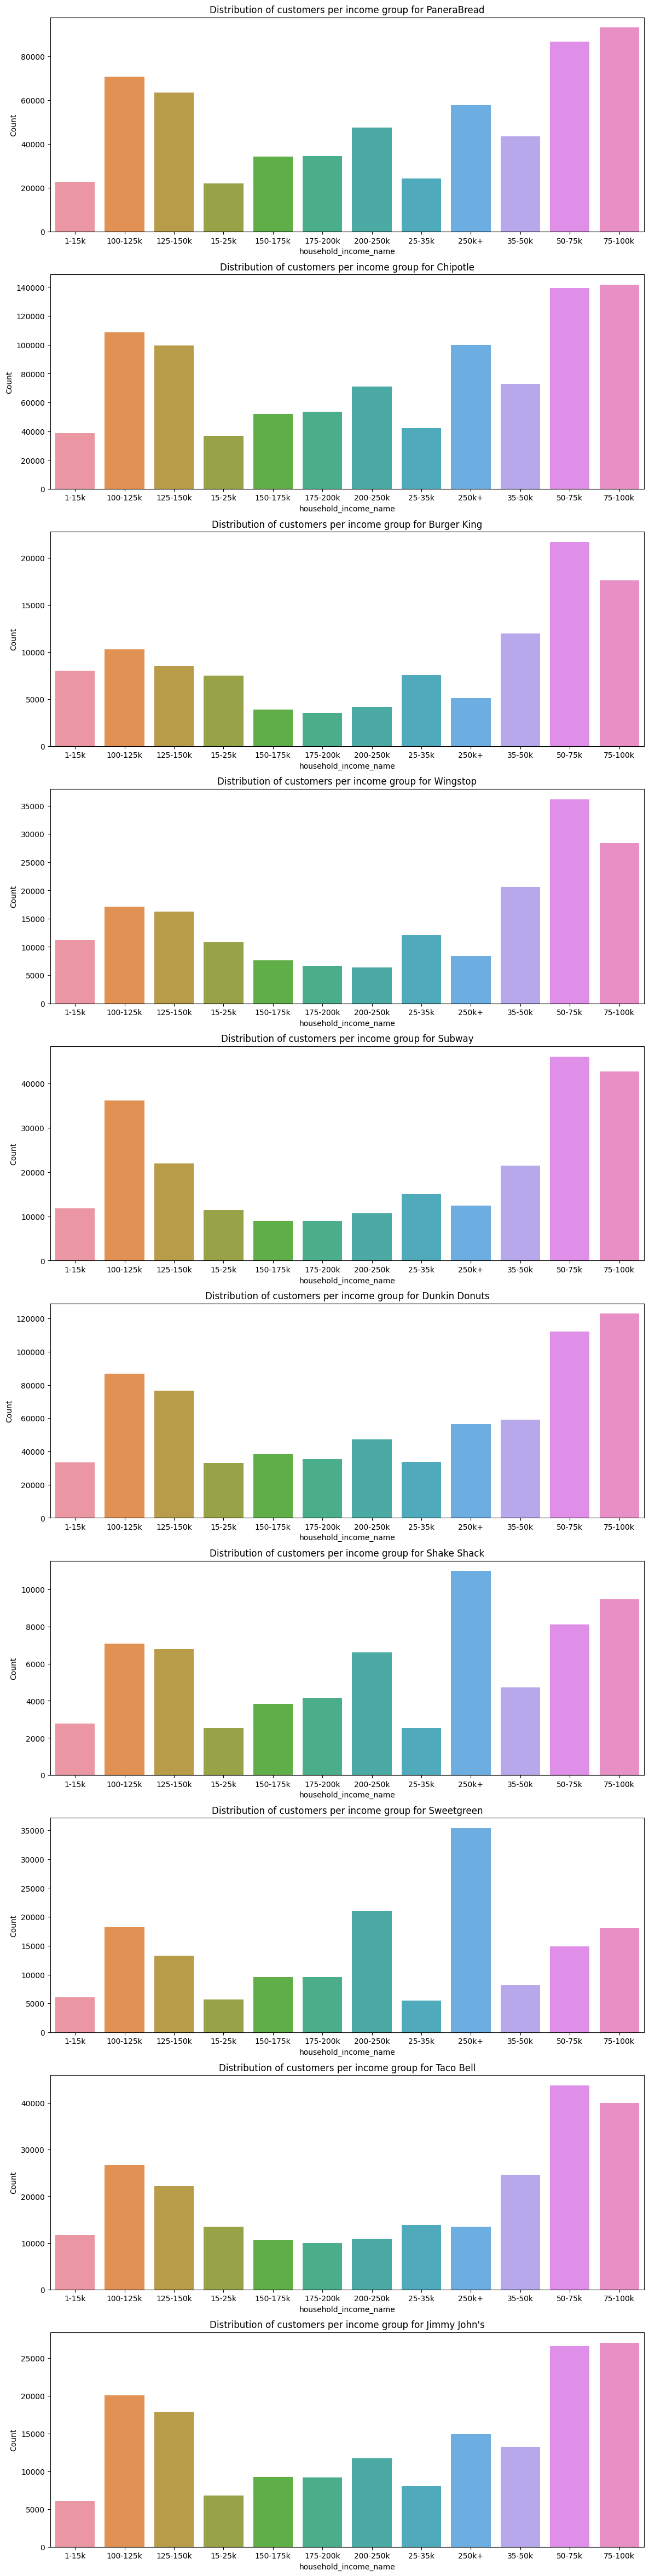

In [50]:
# distribution of number of customers by income bracket for each competitor
fig, ax = plt.subplots(nrows = len(merchants), ncols = 1, figsize = (14,60))
grouped_counts_income = df_trans_merged_income.groupby(['merchant_name', 'household_income_name']).size().reset_index(name='Count')

for i, merch in enumerate(merchants):
    sns.barplot(data = grouped_counts_income[grouped_counts_income['merchant_name'] == f'{merch}'], x = 'household_income_name', y = 'Count', ax = ax[i])
    ax[i].set_title(f'Distribution of customers per income group for {merch}')


# Household Income Revenue Market Share -- Quarterly

In this section, we look at a quarterly time frame.

In [51]:
# revenue market share within each income bracket
df_trans_qua_income = df_trans_qua.merge(df_user[['user_id', 'household_income_name']], how = 'inner', on = 'user_id')
df_trans_qua_income.head()

merchant_id                               user_id  \
0         1712  ecdc60b4-1213-32b0-81cb-2896ec4f0eab   
1         1712  ecdc60b4-1213-32b0-81cb-2896ec4f0eab   
2         1712  ecdc60b4-1213-32b0-81cb-2896ec4f0eab   
3         1712  ecdc60b4-1213-32b0-81cb-2896ec4f0eab   
4         1712  ecdc60b4-1213-32b0-81cb-2896ec4f0eab   

                               order_id  order_total order_date merchant_name  \
0  4efd00e3-55dd-31ce-8887-3f53a4a32b15        21.08 2022-05-23   PaneraBread   
1  700b4d41-d6cb-3754-b4e0-86bbc27f46b5        11.13 2020-10-29   PaneraBread   
2  63cf4a79-9607-3e3c-baff-80488ee71692        12.32 2021-05-03   PaneraBread   
3  40cd876b-9dee-3d71-824e-462402cf863a        18.26 2022-09-12   PaneraBread   
4  77adac87-71ad-3b55-8e35-152d726a7c6e        14.04 2020-09-28   PaneraBread   

  quarter  total_rev_per_quarter  order_total_ratio  total_orders_per_quarter  \
0  2022Q2             6124494.02           0.000003                    301746   
1  2020Q4             4579885.62           0.000002                    232390   
2  2021Q2             5820499.10           0.000002                    297108   
3  2022Q3             5847473.46           0.000003                    284654   
4  2020Q3             4265760.46           0.000003                    225955   

   order_number_ratio household_income_name  
0            0.000003                 1-15k  
1            0.000004                 1-15k  
2            0.000003                 1-15k  
3            0.000004                 1-15k  
4            0.000004                 1-15k

In [52]:
# list of income brackets

incomes = df_trans_qua_income['household_income_name'].unique().tolist()

In [53]:
# total revenue market share per income bracket

for i, bracket in enumerate(incomes):
    print(f"For {bracket}:")
    df_temp = df_trans_qua_income[df_trans_qua_income['household_income_name'] == bracket]
    df_temp['total_rev_per_quarter_per_inc_bracket'] = df_temp['order_total'].groupby(df_temp['quarter']).transform('sum')
    df_temp['order_total_ratio'] = df_temp['order_total']/df_temp['total_rev_per_quarter_per_inc_bracket']
    df_temp_mk_share = df_temp.groupby(['quarter', 'merchant_name'])['order_total_ratio'].sum()*100
    df_temp_mk_share_pivot = df_temp_mk_share.reset_index().pivot(index = 'merchant_name', columns = 'quarter', values = 'order_total_ratio')
    display(df_temp_mk_share_pivot)
    df_temp_mk_share_pivot.to_excel(writer,
         sheet_name="HHI Revenue Market Share",
         startrow=i*14, index_label = f'{bracket}', na_rep = 0)

For 1-15k:


/var/folders/3l/7436s71n23z1c8pd7kqz3vg40000gn/T/ipykernel_65101/2849106246.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['total_rev_per_quarter_per_inc_bracket'] = df_temp['order_total'].groupby(df_temp['quarter']).transform('sum')
/var/folders/3l/7436s71n23z1c8pd7kqz3vg40000gn/T/ipykernel_65101/2849106246.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['order_total_ratio'] = df_temp['order_total']/df_temp['total_rev_per_quarter_per_inc_bracket']


quarter           2019Q1     2019Q2     2019Q3     2019Q4     2020Q1  \
merchant_name                                                          
Burger King          NaN        NaN        NaN   0.701007   2.465058   
Chipotle       21.760647  25.472524  23.657049  24.023512  31.490946   
Dunkin Donuts  24.828061  26.893625  28.345487  25.852169  19.679294   
Jimmy John's    3.966272   3.780726   5.079158   4.753674   4.450475   
PaneraBread    29.620441  24.340452  23.884965  26.959925  22.586524   
Shake Shack     2.984685   3.091849   1.979622   2.984903   2.005267   
Subway          2.777198   3.207839   4.183350   4.510625   6.056631   
Sweetgreen      9.881417   9.536554   8.868919   5.266906   5.919815   
Taco Bell       4.181278   3.676431   4.001451   4.947279   5.345990   
Wingstop             NaN        NaN        NaN        NaN        NaN   

quarter           2020Q2     2020Q3     2020Q4     2021Q1     2021Q2  \
merchant_name                                                          
Burger King     4.399851   4.114559   3.046058   3.598224   3.508336   
Chipotle       45.325495  33.735574  29.752645  31.461576  29.946228   
Dunkin Donuts  12.473076  15.980635  16.316280  13.450061  16.478910   
Jimmy John's    2.762118   2.497784   2.289722   4.099015   4.455721   
PaneraBread    15.560829  16.756749  17.858393  15.064579  14.162943   
Shake Shack     3.189259   3.242935   2.822227   2.882551   2.390148   
Subway          7.361645   8.172241   6.461547   5.360570   6.116121   
Sweetgreen      3.020528   3.905911   4.032434   3.255553   3.592274   
Taco Bell       5.907199   5.440599   5.673896   6.435995   6.189642   
Wingstop             NaN   6.153014  11.746799  14.391875  13.159678   

quarter           2021Q3     2021Q4     2022Q1     2022Q2     2022Q3  \
merchant_name                                                          
Burger King     3.635149   4.480398   4.692950   4.653253   4.252585   
Chipotle       26.322689  25.401796  26.684752  25.149682  23.130287   
Dunkin Donuts  17.143622  16.275364  15.275211  17.330855  15.148848   
Jimmy John's    4.425354   4.288748   4.628251   4.419100   3.799649   
PaneraBread    14.441223  15.556997  14.756179  14.877941  14.243872   
Shake Shack     2.158518   2.257607   2.037348   1.941592   1.857888   
Subway          5.574726   6.072919   6.002145   5.366249  11.957253   
Sweetgreen      3.694621   3.352586   3.886607   4.477462   3.257336   
Taco Bell       6.742997   6.316548   5.929279   6.223313   6.478498   
Wingstop       15.861101  15.997036  16.107277  15.560553  15.873785   

quarter           2022Q4  
merchant_name             
Burger King     4.503489  
Chipotle       22.410513  
Dunkin Donuts  16.675400  
Jimmy John's    4.163606  
PaneraBread    18.093533  
Shake Shack     2.087627  
Subway          5.732457  
Sweetgreen      3.491859  
Taco Bell       7.657964  
Wingstop       15.183552

For 75-100k:


/var/folders/3l/7436s71n23z1c8pd7kqz3vg40000gn/T/ipykernel_65101/2849106246.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['total_rev_per_quarter_per_inc_bracket'] = df_temp['order_total'].groupby(df_temp['quarter']).transform('sum')
/var/folders/3l/7436s71n23z1c8pd7kqz3vg40000gn/T/ipykernel_65101/2849106246.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['order_total_ratio'] = df_temp['order_total']/df_temp['total_rev_per_quarter_per_inc_bracket']


quarter           2019Q1     2019Q2     2019Q3     2019Q4     2020Q1  \
merchant_name                                                          
Burger King          NaN        NaN        NaN   0.374965   1.657308   
Chipotle       18.551394  22.152247  23.406151  24.729101  30.824383   
Dunkin Donuts  25.532596  26.567281  26.682045  24.523648  19.629432   
Jimmy John's    5.193475   4.317133   4.384630   4.236794   4.087299   
PaneraBread    34.409906  30.126845  29.466876  30.506075  25.974948   
Shake Shack     2.367462   2.652259   1.882593   2.193603   2.147376   
Subway          2.595304   3.514351   3.426558   3.481670   5.527393   
Sweetgreen      7.179481   7.715605   7.159766   6.109240   5.857824   
Taco Bell       4.170382   2.954280   3.591382   3.844904   4.294037   
Wingstop             NaN        NaN        NaN        NaN        NaN   

quarter           2020Q2     2020Q3     2020Q4     2021Q1     2021Q2  \
merchant_name                                                          
Burger King     2.767492   2.256627   2.008929   2.203116   2.058742   
Chipotle       42.933993  33.567870  31.597026  32.307178  29.406593   
Dunkin Donuts  13.903441  17.924722  17.024989  15.371723  18.292415   
Jimmy John's    3.909435   3.277225   3.276962   4.501003   6.230583   
PaneraBread    18.397511  19.209167  21.347546  19.991668  17.227770   
Shake Shack     3.372785   2.914744   2.760917   2.691558   2.479533   
Subway          7.425481   9.094799   6.977071   5.017506   5.966214   
Sweetgreen      2.126617   2.645461   2.371509   2.526735   3.139819   
Taco Bell       5.163246   5.285707   5.071891   5.430454   6.046850   
Wingstop             NaN   3.823680   7.563160   9.959060   9.151481   

quarter           2021Q3     2021Q4     2022Q1     2022Q2     2022Q3  \
merchant_name                                                          
Burger King     2.041570   2.469710   2.630821   2.565594   2.703632   
Chipotle       27.926033  27.420875  29.190211  27.045960  27.149205   
Dunkin Donuts  18.440669  18.088644  15.783933  17.697190  15.323656   
Jimmy John's    6.098695   5.573492   5.936226   6.011460   6.125216   
PaneraBread    16.237824  17.290521  17.298911  16.475436  17.870578   
Shake Shack     2.205062   2.412250   1.929873   1.958689   2.083777   
Subway          6.331845   6.135288   6.960537   7.536199   6.292267   
Sweetgreen      3.309096   2.766101   3.205033   3.327318   3.318838   
Taco Bell       6.184239   6.222897   5.447400   6.250915   6.463373   
Wingstop       11.224967  11.620222  11.617056  11.131239  12.669458   

quarter           2022Q4  
merchant_name             
Burger King     2.832625  
Chipotle       25.545602  
Dunkin Donuts  16.058628  
Jimmy John's    5.826391  
PaneraBread    20.691889  
Shake Shack     2.203749  
Subway          5.659041  
Sweetgreen      2.887664  
Taco Bell       7.523700  
Wingstop       10.770712

For 100-125k:


/var/folders/3l/7436s71n23z1c8pd7kqz3vg40000gn/T/ipykernel_65101/2849106246.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['total_rev_per_quarter_per_inc_bracket'] = df_temp['order_total'].groupby(df_temp['quarter']).transform('sum')
/var/folders/3l/7436s71n23z1c8pd7kqz3vg40000gn/T/ipykernel_65101/2849106246.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['order_total_ratio'] = df_temp['order_total']/df_temp['total_rev_per_quarter_per_inc_bracket']


quarter           2019Q1     2019Q2     2019Q3     2019Q4     2020Q1  \
merchant_name                                                          
Burger King          NaN        NaN        NaN   0.347638   1.286900   
Chipotle       17.784254  21.850454  23.517634  23.815891  29.775476   
Dunkin Donuts  22.721736  24.171131  24.687722  21.179081  15.930492   
Jimmy John's    4.831359   4.137616   4.000651   4.597039   4.567383   
PaneraBread    37.115870  31.203971  30.596557  29.624704  24.919361   
Shake Shack     2.316056   2.457203   2.009645   2.035310   2.109752   
Subway          3.045241   3.669355   3.658360   6.814299  10.479388   
Sweetgreen      8.691515   9.249500   8.588541   8.321273   7.377211   
Taco Bell       3.493969   3.260770   2.940890   3.264766   3.554039   
Wingstop             NaN        NaN        NaN        NaN        NaN   

quarter           2020Q2     2020Q3     2020Q4     2021Q1     2021Q2  \
merchant_name                                                          
Burger King     1.883783   1.884061   1.381028   1.489507   1.596726   
Chipotle       40.237349  35.854537  34.824766  34.801441  32.705787   
Dunkin Donuts  10.722957  15.995391  16.425012  15.642551  18.240755   
Jimmy John's    3.676759   3.581836   3.428712   4.631138   6.292517   
PaneraBread    16.775092  19.981275  21.845905  19.506749  17.028718   
Shake Shack     3.294678   3.044171   2.949473   2.741038   2.474694   
Subway         16.674318   7.469296   4.987705   4.543190   4.874798   
Sweetgreen      2.978847   4.183740   3.484695   3.087889   4.097518   
Taco Bell       3.756217   4.606295   4.559556   5.099756   5.265932   
Wingstop             NaN   3.399397   6.113148   8.456740   7.422556   

quarter           2021Q3     2021Q4     2022Q1     2022Q2     2022Q3  \
merchant_name                                                          
Burger King     1.498650   2.181101   1.910954   1.977954   2.002076   
Chipotle       29.650099  28.725013  31.046338  27.216198  26.221203   
Dunkin Donuts  19.111165  18.110917  16.201371  17.859715  15.097881   
Jimmy John's    5.908328   5.620555   6.338140   6.433910   5.949811   
PaneraBread    17.337815  18.989880  17.742625  17.115744  18.430178   
Shake Shack     2.182642   2.122007   2.171888   2.049009   2.069569   
Subway          4.640473   4.672263   5.025284   8.133104  10.385220   
Sweetgreen      4.564531   4.181933   4.686837   4.187593   3.756992   
Taco Bell       5.569395   5.412863   4.849124   5.726236   5.856221   
Wingstop        9.536903   9.983469  10.027440   9.300537  10.230850   

quarter           2022Q4  
merchant_name             
Burger King     2.169500  
Chipotle       26.445372  
Dunkin Donuts  15.967518  
Jimmy John's    5.189974  
PaneraBread    22.226217  
Shake Shack     2.253026  
Subway          7.067570  
Sweetgreen      3.168528  
Taco Bell       6.811009  
Wingstop        8.701287

For 35-50k:


/var/folders/3l/7436s71n23z1c8pd7kqz3vg40000gn/T/ipykernel_65101/2849106246.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['total_rev_per_quarter_per_inc_bracket'] = df_temp['order_total'].groupby(df_temp['quarter']).transform('sum')
/var/folders/3l/7436s71n23z1c8pd7kqz3vg40000gn/T/ipykernel_65101/2849106246.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['order_total_ratio'] = df_temp['order_total']/df_temp['total_rev_per_quarter_per_inc_bracket']


quarter           2019Q1     2019Q2     2019Q3     2019Q4     2020Q1  \
merchant_name                                                          
Burger King          NaN        NaN        NaN   0.616861   2.394790   
Chipotle       20.577086  25.657534  26.328491  26.190942  33.354770   
Dunkin Donuts  25.095221  25.128883  24.937822  24.359636  19.250107   
Jimmy John's    6.278047   5.589259   4.766760   4.903009   4.838838   
PaneraBread    33.764667  27.520681  25.983393  27.044779  21.607973   
Shake Shack     2.217492   2.434668   2.272773   1.825428   2.250869   
Subway          2.303880   4.033543   4.306349   4.165146   6.394973   
Sweetgreen      6.228575   6.132064   7.075981   6.598418   4.972885   
Taco Bell       3.535031   3.503369   4.328433   4.295783   4.934795   
Wingstop             NaN        NaN        NaN        NaN        NaN   

quarter           2020Q2     2020Q3     2020Q4     2021Q1     2021Q2  \
merchant_name                                                          
Burger King     3.555423   2.580589   2.519141   2.816720   2.622107   
Chipotle       44.575750  33.680778  30.500473  30.502431  29.769960   
Dunkin Donuts  13.330009  16.346257  15.800177  13.375832  15.458173   
Jimmy John's    3.721071   3.364167   3.273730   4.442530   5.449024   
PaneraBread    16.797749  18.549565  18.868137  16.552669  14.922762   
Shake Shack     2.969533   2.963593   2.590411   2.515899   2.169444   
Subway          8.010016   8.707449   6.776718   6.060645   6.219078   
Sweetgreen      2.479049   2.880587   2.634226   2.260400   2.511303   
Taco Bell       4.561400   5.310218   5.528416   7.226696   7.348012   
Wingstop             NaN   5.616797  11.508570  14.246179  13.530137   

quarter           2021Q3     2021Q4     2022Q1     2022Q2     2022Q3  \
merchant_name                                                          
Burger King     2.675637   3.605390   3.303079   3.277973   3.693585   
Chipotle       26.627154  25.880628  28.785667  25.676234  25.196011   
Dunkin Donuts  15.942472  15.810411  14.181214  15.686122  14.305072   
Jimmy John's    5.886091   5.216782   5.192270   5.405764   4.999740   
PaneraBread    14.743705  15.258291  13.916395  14.640949  15.686508   
Shake Shack     2.359611   2.281519   1.597483   1.746939   1.777384   
Subway          5.801963   5.627938   6.064412   6.564622   6.036380   
Sweetgreen      2.433422   2.394466   3.169679   3.261786   3.041699   
Taco Bell       7.769653   7.208078   6.983672   7.839893   8.248803   
Wingstop       15.760291  16.716496  16.806127  15.899718  17.014818   

quarter           2022Q4  
merchant_name             
Burger King     3.904600  
Chipotle       23.663419  
Dunkin Donuts  14.712773  
Jimmy John's    5.456034  
PaneraBread    17.261459  
Shake Shack     2.105336  
Subway          5.864329  
Sweetgreen      2.885091  
Taco Bell       9.264001  
Wingstop       14.882959

For 50-75k:


/var/folders/3l/7436s71n23z1c8pd7kqz3vg40000gn/T/ipykernel_65101/2849106246.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['total_rev_per_quarter_per_inc_bracket'] = df_temp['order_total'].groupby(df_temp['quarter']).transform('sum')
/var/folders/3l/7436s71n23z1c8pd7kqz3vg40000gn/T/ipykernel_65101/2849106246.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['order_total_ratio'] = df_temp['order_total']/df_temp['total_rev_per_quarter_per_inc_bracket']


quarter           2019Q1     2019Q2     2019Q3     2019Q4     2020Q1  \
merchant_name                                                          
Burger King          NaN        NaN        NaN   0.643713   2.172304   
Chipotle       18.783747  23.456108  24.218615  26.404870  31.979768   
Dunkin Donuts  26.386162  27.154433  26.100184  24.546350  19.558033   
Jimmy John's    4.664467   4.911353   4.532888   4.864593   5.053684   
PaneraBread    33.686346  27.915632  27.896631  27.158764  23.124571   
Shake Shack     2.649534   2.141193   1.979291   2.161898   1.973426   
Subway          3.762880   4.791872   5.188144   5.058488   6.469920   
Sweetgreen      5.549772   5.578219   5.871977   4.261514   4.759562   
Taco Bell       4.517091   4.051190   4.212269   4.899810   4.908733   
Wingstop             NaN        NaN        NaN        NaN        NaN   

quarter           2020Q2     2020Q3     2020Q4     2021Q1     2021Q2  \
merchant_name                                                          
Burger King     3.209124   2.818064   2.323241   2.539013   2.663522   
Chipotle       44.326018  32.711490  30.535221  31.109523  29.341199   
Dunkin Donuts  12.911093  16.974877  16.231776  15.024226  16.605593   
Jimmy John's    3.441762   3.237594   3.023954   4.582682   5.785675   
PaneraBread    17.588834  18.704392  19.534837  17.005088  15.352355   
Shake Shack     2.927137   2.615833   2.616879   2.187399   2.168869   
Subway          8.069367   9.029431   6.806464   5.799882   6.637897   
Sweetgreen      2.068939   2.759366   2.378244   2.187423   2.485483   
Taco Bell       5.457726   5.805603   6.125849   6.474816   6.799674   
Wingstop             NaN   5.343350  10.423535  13.089949  12.159732   

quarter           2021Q3     2021Q4     2022Q1     2022Q2     2022Q3  \
merchant_name                                                          
Burger King     2.654545   3.541556   3.421700   3.452680   3.249696   
Chipotle       27.205455  26.312274  28.272298  25.821830  25.879088   
Dunkin Donuts  16.325121  15.755845  14.400650  15.911719  13.613773   
Jimmy John's    5.761256   5.604940   5.938607   5.735218   6.429955   
PaneraBread    15.210499  15.867709  15.545988  15.542904  16.661923   
Shake Shack     1.732943   1.696426   1.867279   1.569744   1.457897   
Subway          6.486511   6.395893   7.264234   7.697233   7.497394   
Sweetgreen      2.682009   2.459967   2.913017   3.005737   2.752704   
Taco Bell       7.040410   6.635665   5.601440   6.676941   7.013182   
Wingstop       14.901251  15.729724  14.774789  14.585996  15.444389   

quarter           2022Q4  
merchant_name             
Burger King     3.201540  
Chipotle       24.308318  
Dunkin Donuts  15.056320  
Jimmy John's    5.443407  
PaneraBread    18.915621  
Shake Shack     1.872645  
Subway          6.977253  
Sweetgreen      2.776786  
Taco Bell       8.061429  
Wingstop       13.386682

For 250k+:


/var/folders/3l/7436s71n23z1c8pd7kqz3vg40000gn/T/ipykernel_65101/2849106246.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['total_rev_per_quarter_per_inc_bracket'] = df_temp['order_total'].groupby(df_temp['quarter']).transform('sum')
/var/folders/3l/7436s71n23z1c8pd7kqz3vg40000gn/T/ipykernel_65101/2849106246.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['order_total_ratio'] = df_temp['order_total']/df_temp['total_rev_per_quarter_per_inc_bracket']


quarter           2019Q1     2019Q2     2019Q3     2019Q4     2020Q1  \
merchant_name                                                          
Burger King          NaN        NaN        NaN   0.195039   0.497881   
Chipotle       18.505571  21.868966  22.387094  24.522076  30.499202   
Dunkin Donuts  19.306969  19.402204  18.795357  17.215283  13.915745   
Jimmy John's    3.770483   3.539215   3.732946   3.670033   3.174089   
PaneraBread    33.521307  29.853423  29.468435  31.146785  26.300138   
Shake Shack     4.290360   4.274241   3.814445   3.810106   3.607170   
Subway          1.026172   1.423873   1.692855   1.788917   2.566085   
Sweetgreen     17.665541  18.189366  18.603667  15.886339  17.462798   
Taco Bell       1.913597   1.448712   1.505202   1.765422   1.976892   
Wingstop             NaN        NaN        NaN        NaN        NaN   

quarter           2020Q2     2020Q3     2020Q4     2021Q1     2021Q2  \
merchant_name                                                          
Burger King     1.079522   0.861599   0.833591   0.834506   0.918308   
Chipotle       48.125540  38.753843  36.738139  38.066002  36.144826   
Dunkin Donuts  10.050288  13.565150  13.447303  12.957301  15.607551   
Jimmy John's    3.039425   2.709918   2.383915   3.838983   5.005540   
PaneraBread    18.381891  20.867265  22.067940  19.573414  17.475693   
Shake Shack     6.735955   5.699182   6.072799   5.303070   5.142072   
Subway          2.730071   3.444301   2.912132   2.683757   3.186889   
Sweetgreen      7.445904   9.518289   9.112289   8.553578   9.333343   
Taco Bell       2.411404   2.569633   2.629027   3.219702   3.190717   
Wingstop             NaN   2.010820   3.802865   4.969686   3.995062   

quarter           2021Q3     2021Q4     2022Q1     2022Q2     2022Q3  \
merchant_name                                                          
Burger King     1.118202   1.479514   1.346622   1.500856   1.466710   
Chipotle       34.423070  32.975991  34.808020  31.207012  31.024497   
Dunkin Donuts  15.577910  15.628151  13.897864  16.628858  14.062618   
Jimmy John's    5.532838   4.935730   5.012714   5.985164   5.906425   
PaneraBread    18.076716  18.825143  18.399743  17.836608  18.823617   
Shake Shack     4.515747   4.588583   3.824049   3.691634   4.111036   
Subway          3.052334   3.070605   3.035161   3.459775   3.477819   
Sweetgreen      8.816629   8.896440  10.735570  10.582065  10.766393   
Taco Bell       3.300281   3.427676   2.904234   3.135468   3.573344   
Wingstop        5.586275   6.172166   6.036022   5.972561   6.787542   

quarter           2022Q4  
merchant_name             
Burger King     1.704823  
Chipotle       29.595720  
Dunkin Donuts  14.275997  
Jimmy John's    5.599397  
PaneraBread    21.496890  
Shake Shack     4.292636  
Subway          3.275921  
Sweetgreen      9.857424  
Taco Bell       4.079767  
Wingstop        5.821425

For 125-150k:


/var/folders/3l/7436s71n23z1c8pd7kqz3vg40000gn/T/ipykernel_65101/2849106246.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['total_rev_per_quarter_per_inc_bracket'] = df_temp['order_total'].groupby(df_temp['quarter']).transform('sum')
/var/folders/3l/7436s71n23z1c8pd7kqz3vg40000gn/T/ipykernel_65101/2849106246.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['order_total_ratio'] = df_temp['order_total']/df_temp['total_rev_per_quarter_per_inc_bracket']


quarter           2019Q1     2019Q2     2019Q3     2019Q4     2020Q1  \
merchant_name                                                          
Burger King          NaN        NaN        NaN   0.285519   1.121159   
Chipotle       17.644172  22.966163  23.457150  24.040719  32.195533   
Dunkin Donuts  26.920013  28.425638  29.276340  24.332577  20.569169   
Jimmy John's    4.940066   4.626635   4.232647   4.587588   3.703314   
PaneraBread    36.820411  29.820671  29.708216  32.604319  26.373326   
Shake Shack     2.573526   2.597990   2.275084   2.111690   2.136766   
Subway          2.347800   2.793091   3.135589   3.651682   4.697445   
Sweetgreen      5.941423   6.400131   5.238816   5.697843   6.083498   
Taco Bell       2.812589   2.369681   2.676158   2.688062   3.119790   
Wingstop             NaN        NaN        NaN        NaN        NaN   

quarter           2020Q2     2020Q3     2020Q4     2021Q1     2021Q2  \
merchant_name                                                          
Burger King     1.728535   1.400334   1.148811   1.238556   1.383563   
Chipotle       45.939209  35.743468  35.069766  36.268364  33.319379   
Dunkin Donuts  13.710698  16.413713  16.326886  15.294711  17.991611   
Jimmy John's    3.236045   3.381322   3.335420   4.445426   6.569938   
PaneraBread    18.479513  21.686479  22.867269  19.615469  17.541406   
Shake Shack     2.854912   3.199736   3.029977   3.064343   2.636874   
Subway          7.061687   6.208089   4.779400   4.475945   4.430872   
Sweetgreen      2.901901   3.821019   3.171191   2.874998   3.867572   
Taco Bell       4.087499   4.643747   4.191953   4.681423   4.998325   
Wingstop             NaN   3.502094   6.079327   8.040766   7.260461   

quarter           2021Q3     2021Q4     2022Q1     2022Q2     2022Q3  \
merchant_name                                                          
Burger King     1.509033   1.927020   1.975327   1.994214   2.133572   
Chipotle       30.201382  29.607867  30.440121  28.369966  28.724591   
Dunkin Donuts  18.736661  17.965558  16.324381  19.209173  15.030024   
Jimmy John's    6.324517   5.674544   6.574929   6.730128   6.892038   
PaneraBread    16.974592  18.385069  18.016815  17.312011  18.904003   
Shake Shack     2.412335   2.358036   2.215159   2.466345   2.052463   
Subway          4.766710   4.652992   5.059943   4.932197   5.150459   
Sweetgreen      3.908562   3.627014   3.907304   3.943149   4.142042   
Taco Bell       4.864028   5.016329   5.082074   5.523076   5.749028   
Wingstop       10.302181  10.785571  10.403948   9.519741  11.221780   

quarter           2022Q4  
merchant_name             
Burger King     2.183464  
Chipotle       26.072646  
Dunkin Donuts  15.722271  
Jimmy John's    6.445989  
PaneraBread    22.634178  
Shake Shack     2.649808  
Subway          4.672742  
Sweetgreen      3.408451  
Taco Bell       6.398346  
Wingstop        9.812105

For 15-25k:


/var/folders/3l/7436s71n23z1c8pd7kqz3vg40000gn/T/ipykernel_65101/2849106246.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['total_rev_per_quarter_per_inc_bracket'] = df_temp['order_total'].groupby(df_temp['quarter']).transform('sum')
/var/folders/3l/7436s71n23z1c8pd7kqz3vg40000gn/T/ipykernel_65101/2849106246.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['order_total_ratio'] = df_temp['order_total']/df_temp['total_rev_per_quarter_per_inc_bracket']


quarter           2019Q1     2019Q2     2019Q3     2019Q4     2020Q1  \
merchant_name                                                          
Burger King          NaN        NaN        NaN   0.978832   3.923860   
Chipotle       20.294066  25.650880  23.250535  24.415021  30.258849   
Dunkin Donuts  22.398709  25.398775  28.220475  27.240973  20.651621   
Jimmy John's    7.038079   5.886457   5.701812   5.131855   4.720168   
PaneraBread    30.199340  23.246133  24.614430  25.092474  20.840134   
Shake Shack     2.275494   2.088016   1.609670   2.248598   1.817944   
Subway          2.112966   4.743614   4.923407   4.644209   6.349008   
Sweetgreen     10.374925   8.018585   7.635335   5.232522   5.943894   
Taco Bell       5.306421   4.967540   4.044335   5.015516   5.494523   
Wingstop             NaN        NaN        NaN        NaN        NaN   

quarter           2020Q2     2020Q3     2020Q4     2021Q1     2021Q2  \
merchant_name                                                          
Burger King     4.950306   4.144602   3.096043   4.243119   3.234956   
Chipotle       41.260493  30.513763  29.204190  29.544633  28.361893   
Dunkin Donuts  13.993037  17.343054  17.301676  15.754105  16.942439   
Jimmy John's    3.402375   3.385215   2.894647   4.017166   4.797970   
PaneraBread    15.681323  17.496753  17.702749  15.321772  15.096333   
Shake Shack     3.455418   3.178475   3.026192   2.406547   2.298336   
Subway          8.023327   9.296236   6.564445   5.336320   5.884039   
Sweetgreen      2.995242   3.419136   3.406864   2.458965   2.832764   
Taco Bell       6.238479   6.244239   5.508314   6.248033   6.930495   
Wingstop             NaN   4.978526  11.294880  14.669340  13.620775   

quarter           2021Q3     2021Q4     2022Q1     2022Q2     2022Q3  \
merchant_name                                                          
Burger King     2.824270   3.982730   4.221200   4.255377   4.335384   
Chipotle       26.304495  25.794387  27.665560  24.751165  23.641986   
Dunkin Donuts  16.624218  17.179238  14.998307  15.931374  14.010906   
Jimmy John's    4.964097   4.072450   4.812402   4.562970   5.325751   
PaneraBread    15.347366  15.756138  13.287481  14.300772  14.112331   
Shake Shack     2.050375   1.780538   1.522874   1.739654   1.933819   
Subway          6.392117   5.832018   6.828731   7.102991   6.383466   
Sweetgreen      3.223427   3.439115   3.954760   3.455984   3.992251   
Taco Bell       7.301064   6.687763   6.433306   8.151182   8.717929   
Wingstop       14.968571  15.475623  16.275379  15.748531  17.546176   

quarter           2022Q4  
merchant_name             
Burger King     3.762746  
Chipotle       21.731363  
Dunkin Donuts  15.224373  
Jimmy John's    4.838977  
PaneraBread    17.916789  
Shake Shack     2.350331  
Subway          6.187874  
Sweetgreen      3.473892  
Taco Bell       9.783634  
Wingstop       14.730022

For 150-175k:


/var/folders/3l/7436s71n23z1c8pd7kqz3vg40000gn/T/ipykernel_65101/2849106246.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['total_rev_per_quarter_per_inc_bracket'] = df_temp['order_total'].groupby(df_temp['quarter']).transform('sum')
/var/folders/3l/7436s71n23z1c8pd7kqz3vg40000gn/T/ipykernel_65101/2849106246.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['order_total_ratio'] = df_temp['order_total']/df_temp['total_rev_per_quarter_per_inc_bracket']


quarter           2019Q1     2019Q2     2019Q3     2019Q4     2020Q1  \
merchant_name                                                          
Burger King          NaN        NaN        NaN   0.212990   1.087587   
Chipotle       18.246007  22.024353  23.488307  24.208215  32.117370   
Dunkin Donuts  23.094780  25.185022  24.574857  24.087563  18.346329   
Jimmy John's    5.506053   3.916993   3.699696   4.754068   4.042935   
PaneraBread    38.387614  32.961949  33.275971  32.475136  28.183533   
Shake Shack     2.332893   2.753121   2.337763   2.132798   2.813668   
Subway          1.432166   2.650943   2.565151   2.544831   2.913425   
Sweetgreen      8.616468   8.745208   8.390007   7.067723   7.782299   
Taco Bell       2.384019   1.762411   1.668247   2.516675   2.712853   
Wingstop             NaN        NaN        NaN        NaN        NaN   

quarter           2020Q2     2020Q3     2020Q4     2021Q1     2021Q2  \
merchant_name                                                          
Burger King     1.824848   1.394236   1.177533   1.175229   1.278702   
Chipotle       46.927605  36.749998  35.598387  35.886541  33.643599   
Dunkin Donuts  13.534845  16.457373  16.190238  14.806563  17.892552   
Jimmy John's    3.154446   2.939691   2.738449   4.874844   6.378565   
PaneraBread    20.229460  21.394371  22.541263  20.361031  18.104555   
Shake Shack     3.877566   4.347441   3.863387   3.702436   2.989760   
Subway          3.967931   5.320249   3.967586   3.522604   4.096810   
Sweetgreen      2.798844   4.445096   4.182726   4.444787   5.074563   
Taco Bell       3.684456   3.986259   3.753810   4.243722   4.472332   
Wingstop             NaN   2.965285   5.986621   6.982243   6.068561   

quarter           2021Q3     2021Q4     2022Q1     2022Q2     2022Q3  \
merchant_name                                                          
Burger King     1.314868   1.469336   1.688626   2.125605   1.737912   
Chipotle       30.068675  30.774670  33.026874  30.158601  30.136079   
Dunkin Donuts  18.118177  16.341980  14.431906  17.307029  15.668217   
Jimmy John's    6.779077   6.004416   5.985725   6.084167   6.312340   
PaneraBread    17.755832  19.388749  18.935100  19.358035  19.293761   
Shake Shack     2.788424   2.792198   2.215572   1.976631   2.534863   
Subway          3.803183   4.206547   4.463640   3.984104   3.851363   
Sweetgreen      5.638900   5.453360   5.589282   5.549043   4.829128   
Taco Bell       4.717248   4.587441   4.187460   5.275949   5.283000   
Wingstop        9.015616   8.981302   9.475813   8.180836  10.353338   

quarter           2022Q4  
merchant_name             
Burger King     1.874723  
Chipotle       28.102206  
Dunkin Donuts  15.779467  
Jimmy John's    6.037767  
PaneraBread    22.546190  
Shake Shack     2.726727  
Subway          4.017613  
Sweetgreen      4.218000  
Taco Bell       5.447305  
Wingstop        9.250002

For 200-250k:


/var/folders/3l/7436s71n23z1c8pd7kqz3vg40000gn/T/ipykernel_65101/2849106246.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['total_rev_per_quarter_per_inc_bracket'] = df_temp['order_total'].groupby(df_temp['quarter']).transform('sum')
/var/folders/3l/7436s71n23z1c8pd7kqz3vg40000gn/T/ipykernel_65101/2849106246.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['order_total_ratio'] = df_temp['order_total']/df_temp['total_rev_per_quarter_per_inc_bracket']


quarter           2019Q1     2019Q2     2019Q3     2019Q4     2020Q1  \
merchant_name                                                          
Burger King          NaN        NaN        NaN   0.308481   0.744995   
Chipotle       16.973369  20.384121  20.181980  22.590882  30.418771   
Dunkin Donuts  22.804543  24.124045  24.271568  22.925519  17.101153   
Jimmy John's    3.457456   3.431712   3.203287   2.972289   3.810740   
PaneraBread    35.746575  29.750648  32.089596  32.834856  26.484239   
Shake Shack     3.446341   3.769378   3.079721   2.622930   3.071595   
Subway          1.476695   2.350697   2.380605   2.231491   3.326121   
Sweetgreen     14.221341  14.342231  13.359246  11.625860  12.779530   
Taco Bell       1.873679   1.847169   1.433997   1.887691   2.262856   
Wingstop             NaN        NaN        NaN        NaN        NaN   

quarter           2020Q2     2020Q3     2020Q4     2021Q1     2021Q2  \
merchant_name                                                          
Burger King     1.066147   1.055706   0.759279   0.888885   1.017065   
Chipotle       45.609193  34.565331  34.727213  36.538678  34.021507   
Dunkin Donuts  12.575683  16.722674  16.663976  15.114364  18.019924   
Jimmy John's    3.393053   3.089345   2.599077   3.427497   5.327679   
PaneraBread    19.691529  23.070508  23.010604  21.221280  18.318765   
Shake Shack     5.536314   4.770178   4.979229   4.461490   4.111137   
Subway          3.723353   4.033197   3.169354   2.809782   3.452921   
Sweetgreen      5.775176   7.590592   7.627407   7.278049   8.516257   
Taco Bell       2.629551   3.380062   3.305334   3.758036   3.108927   
Wingstop             NaN   1.722409   3.158528   4.501940   4.105819   

quarter           2021Q3     2021Q4     2022Q1     2022Q2     2022Q3  \
merchant_name                                                          
Burger King     1.157119   1.291066   1.417834   1.590227   1.361254   
Chipotle       31.982801  30.645700  33.956379  31.177566  31.430939   
Dunkin Donuts  18.359397  17.928131  16.010165  18.407194  13.962347   
Jimmy John's    5.802584   5.695884   5.763032   6.232937   6.610292   
PaneraBread    18.681828  19.898654  19.169422  17.905630  20.542236   
Shake Shack     3.177601   3.751748   3.058710   3.152280   3.154030   
Subway          3.281355   3.367756   3.691803   3.692931   3.648226   
Sweetgreen      8.370116   7.771113   8.081068   8.266145   8.862612   
Taco Bell       3.264869   3.415755   3.078291   4.057332   4.183585   
Wingstop        5.922329   6.234192   5.773297   5.517758   6.244478   

quarter           2022Q4  
merchant_name             
Burger King     1.363656  
Chipotle       29.451687  
Dunkin Donuts  14.668665  
Jimmy John's    5.562737  
PaneraBread    23.352873  
Shake Shack     3.654214  
Subway          3.330336  
Sweetgreen      8.143343  
Taco Bell       4.809014  
Wingstop        5.663475

For 175-200k:


/var/folders/3l/7436s71n23z1c8pd7kqz3vg40000gn/T/ipykernel_65101/2849106246.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['total_rev_per_quarter_per_inc_bracket'] = df_temp['order_total'].groupby(df_temp['quarter']).transform('sum')
/var/folders/3l/7436s71n23z1c8pd7kqz3vg40000gn/T/ipykernel_65101/2849106246.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['order_total_ratio'] = df_temp['order_total']/df_temp['total_rev_per_quarter_per_inc_bracket']


quarter           2019Q1     2019Q2     2019Q3     2019Q4     2020Q1  \
merchant_name                                                          
Burger King          NaN        NaN        NaN   0.222611   1.206603   
Chipotle       17.006033  22.321977  21.917445  24.019949  30.834429   
Dunkin Donuts  21.868192  24.435326  26.732565  24.437565  17.665882   
Jimmy John's    5.965396   2.833131   3.851850   4.493307   5.767752   
PaneraBread    38.213260  34.682528  31.960359  32.076074  27.163104   
Shake Shack     3.035869   2.970773   3.025543   3.249008   2.967213   
Subway          1.720716   2.137343   1.832386   2.204316   2.737501   
Sweetgreen     10.141278   9.180191   8.601991   7.581865   9.457695   
Taco Bell       2.049257   1.438731   2.077861   1.715306   2.199823   
Wingstop             NaN        NaN        NaN        NaN        NaN   

quarter           2020Q2     2020Q3     2020Q4     2021Q1     2021Q2  \
merchant_name                                                          
Burger King     1.493776   1.526106   0.956300   1.157132   1.298143   
Chipotle       48.211653  36.178905  36.448715  37.165635  34.010938   
Dunkin Donuts  12.438127  15.188440  15.198243  13.634920  15.786596   
Jimmy John's    3.297333   3.815839   3.597475   4.898873   6.807300   
PaneraBread    19.670447  23.650373  22.017436  20.549159  18.824675   
Shake Shack     3.837137   3.673303   4.069467   3.746272   3.280654   
Subway          3.793924   4.776410   3.807118   3.375651   3.992016   
Sweetgreen      3.986190   4.825010   4.644867   4.495747   5.140321   
Taco Bell       3.271414   3.596404   3.734622   4.252009   4.648249   
Wingstop             NaN   2.769210   5.525756   6.724602   6.211107   

quarter           2021Q3     2021Q4     2022Q1     2022Q2     2022Q3  \
merchant_name                                                          
Burger King     1.481883   1.497066   1.421146   1.511586   1.433139   
Chipotle       31.605965  32.432090  33.472865  31.411581  31.488125   
Dunkin Donuts  16.393757  15.544379  14.234721  16.734621  13.088484   
Jimmy John's    6.285748   6.119680   5.994969   7.099114   6.888971   
PaneraBread    19.203236  19.223565  20.074297  18.527720  21.299534   
Shake Shack     2.649448   2.962705   2.423625   2.536590   2.949246   
Subway          4.056855   4.285144   4.154357   4.421691   4.074219   
Sweetgreen      5.387043   4.583149   5.442502   5.983619   5.809164   
Taco Bell       4.590753   4.804736   4.370148   4.630490   4.635232   
Wingstop        8.345312   8.547486   8.411370   7.142990   8.333886   

quarter           2022Q4  
merchant_name             
Burger King     1.469976  
Chipotle       28.902342  
Dunkin Donuts  14.463274  
Jimmy John's    6.023946  
PaneraBread    23.709925  
Shake Shack     3.168914  
Subway          4.648194  
Sweetgreen      4.906033  
Taco Bell       5.300939  
Wingstop        7.406455

For 25-35k:


/var/folders/3l/7436s71n23z1c8pd7kqz3vg40000gn/T/ipykernel_65101/2849106246.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['total_rev_per_quarter_per_inc_bracket'] = df_temp['order_total'].groupby(df_temp['quarter']).transform('sum')
/var/folders/3l/7436s71n23z1c8pd7kqz3vg40000gn/T/ipykernel_65101/2849106246.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['order_total_ratio'] = df_temp['order_total']/df_temp['total_rev_per_quarter_per_inc_bracket']


quarter           2019Q1     2019Q2     2019Q3     2019Q4     2020Q1  \
merchant_name                                                          
Burger King          NaN        NaN        NaN   0.958267   2.880459   
Chipotle       18.773004  23.962339  23.730604  25.845085  32.346788   
Dunkin Donuts  29.925532  28.822410  29.831163  23.776457  19.286530   
Jimmy John's    5.363215   4.871667   4.346522   4.767723   5.954689   
PaneraBread    29.871796  26.989429  25.154103  27.231822  20.156468   
Shake Shack     2.660661   2.428476   1.804636   2.067611   1.671752   
Subway          2.542319   3.005233   4.596614   4.218522   6.134795   
Sweetgreen      5.532300   5.667887   6.266248   6.644418   6.451114   
Taco Bell       5.331174   4.252559   4.270110   4.490095   5.117404   
Wingstop             NaN        NaN        NaN        NaN        NaN   

quarter           2020Q2     2020Q3     2020Q4     2021Q1     2021Q2  \
merchant_name                                                          
Burger King     4.442086   3.402958   3.033262   3.291328   3.454289   
Chipotle       41.982686  32.993992  31.443288  31.415998  29.366278   
Dunkin Donuts  13.513861  16.269240  15.791678  13.451429  14.773576   
Jimmy John's    3.118758   3.104326   2.569866   4.450360   5.606172   
PaneraBread    17.160874  17.235130  18.353326  15.115506  14.252315   
Shake Shack     3.294985   2.562262   2.635023   2.430395   2.130786   
Subway          8.399814   9.532627   7.153808   5.993211   6.946175   
Sweetgreen      2.831197   3.604678   2.335970   3.097706   3.028089   
Taco Bell       5.255738   5.283762   5.337849   6.099044   6.803999   
Wingstop             NaN   6.011025  11.345932  14.655023  13.638321   

quarter           2021Q3     2021Q4     2022Q1     2022Q2     2022Q3  \
merchant_name                                                          
Burger King     3.420759   3.715472   3.646137   4.426321   3.846735   
Chipotle       27.242198  26.198782  26.862565  24.864611  25.406575   
Dunkin Donuts  14.990534  14.631338  13.656611  14.654089  12.827887   
Jimmy John's    5.594715   5.078648   5.301684   4.870902   5.393969   
PaneraBread    14.890362  15.443692  14.741963  13.968828  14.540276   
Shake Shack     1.827863   1.833510   2.010476   1.667056   1.794652   
Subway          5.978240   7.240274   8.696032   9.402521   8.380973   
Sweetgreen      3.265979   3.326258   3.590955   3.778974   3.653705   
Taco Bell       7.165969   7.774101   6.395799   6.855564   7.455990   
Wingstop       15.623381  14.757925  15.097778  15.511133  16.699238   

quarter           2022Q4  
merchant_name             
Burger King     4.014928  
Chipotle       25.096271  
Dunkin Donuts  14.035096  
Jimmy John's    5.739024  
PaneraBread    16.824253  
Shake Shack     1.776035  
Subway          6.027804  
Sweetgreen      3.677059  
Taco Bell       8.340632  
Wingstop       14.468898

In [54]:
# total spending per income bracket

for bracket in incomes:
    print(f"For {bracket}:")
    df_temp = df_trans_qua_income[df_trans_qua_income['household_income_name'] == bracket]
    df_temp = df_temp.groupby(['quarter', 'merchant_name'])['order_total'].sum()
    df_temp_pivot = df_temp.reset_index().pivot(index = 'merchant_name', columns = 'quarter', values = 'order_total')
    display(df_temp_pivot)
    print("Totals per quarter:")
    display(df_temp_pivot.sum(axis=0))

For 1-15k:


quarter          2019Q1    2019Q2    2019Q3    2019Q4    2020Q1    2020Q2  \
merchant_name                                                               
Burger King         NaN       NaN       NaN    551.81   2244.06   6450.70   
Chipotle       13543.84  19016.10  17319.55  18910.54  28667.71  66452.52   
Dunkin Donuts  15453.00  20077.00  20752.00  20350.00  17915.00  18287.00   
Jimmy John's    2468.61   2822.44   3718.50   3741.94   4051.48   4049.59   
PaneraBread    18435.78  18170.97  17486.41  21221.99  20561.59  22814.01   
Shake Shack     1857.67   2308.17   1449.30   2349.62   1825.49   4675.83   
Subway          1728.53   2394.76   3062.67   3550.62   5513.64  10793.04   
Sweetgreen      6150.20   7119.36   6493.02   4145.94   5389.09   4428.45   
Taco Bell       2602.43   2744.58   2929.50   3894.34   4866.71   8660.65   
Wingstop            NaN       NaN       NaN       NaN       NaN       NaN   

quarter          2020Q3    2020Q4    2021Q1    2021Q2    2021Q3    2021Q4  \
merchant_name                                                               
Burger King     7102.61   5479.30   7886.63   8766.95   8651.48  10354.10   
Chipotle       58234.83  53519.56  68957.85  74832.36  62646.74  58702.98   
Dunkin Donuts  27586.00  29350.00  29480.00  41179.00  40801.00  37612.00   
Jimmy John's    4311.71   4118.79   8984.27  11134.36  10532.13   9911.20   
PaneraBread    28925.74  32123.98  33018.72  35391.65  34369.42  35951.87   
Shake Shack     5598.00   5076.67   6318.01   5972.72   5137.17   5217.28   
Subway         14107.04  11623.14  11749.36  15283.52  13267.58  14034.38   
Sweetgreen      6742.44   7253.61   7135.56   8976.70   8793.02   7747.75   
Taco Bell       9391.64  10206.30  14106.49  15467.24  16048.01  14597.40   
Wingstop       10621.42  21130.34  31544.28  32884.60  37748.66  36968.79   

quarter          2022Q1    2022Q2    2022Q3    2022Q4  
merchant_name                                          
Burger King    11256.78  12331.99  11461.80  10632.03  
Chipotle       64007.58  66651.35  62342.01  52907.70  
Dunkin Donuts  36640.00  45930.00  40830.00  39368.00  
Jimmy John's   11101.59  11711.44  10241.02   9829.62  
PaneraBread    35395.02  39429.32  38390.86  42715.99  
Shake Shack     4886.90   5145.58   5007.48   4928.56  
Subway         14397.09  14221.56  32227.84  13533.43  
Sweetgreen      9322.64  11866.11   8779.35   8243.73  
Taco Bell      14222.31  16492.94  17461.20  18079.25  
Wingstop       38635.84  41238.37  42783.89  35845.98

Totals per quarter:


quarter
2019Q1     62240.06
2019Q2     74653.38
2019Q3     73210.95
2019Q4     78716.80
2020Q1     91034.77
2020Q2    146611.79
2020Q3    172621.43
2020Q4    179881.69
2021Q1    219181.17
2021Q2    249889.10
2021Q3    237995.21
2021Q4    231097.75
2022Q1    239865.75
2022Q2    265018.66
2022Q3    269525.45
2022Q4    236084.29
Freq: Q-DEC, dtype: float64

For 75-100k:


quarter          2019Q1    2019Q2    2019Q3    2019Q4     2020Q1     2020Q2  \
merchant_name                                                                 
Burger King         NaN       NaN       NaN   1128.09    5788.84   14770.57   
Chipotle       44590.75  64840.10  69116.54  74398.11  107667.05  229145.94   
Dunkin Donuts  61371.00  77763.00  78790.00  73780.00   68564.00   74205.00   
Jimmy John's   12483.21  12636.34  12947.47  12746.50   14276.60   20865.31   
PaneraBread    82708.80  88181.92  87013.39  91778.28   90728.37   98190.61   
Shake Shack     5690.51   7763.22   5559.15   6599.51    7500.61   18001.12   
Subway          6238.16  10286.58  10118.36  10474.69   19306.73   39631.04   
Sweetgreen     17256.84  22583.74  21142.23  18379.80   20460.90   11350.11   
Taco Bell      10024.07   8647.24  10605.07  11567.49   14998.72   27557.11   
Wingstop            NaN       NaN       NaN       NaN        NaN        NaN   

quarter           2020Q3     2020Q4     2021Q1     2021Q2     2021Q3  \
merchant_name                                                          
Burger King     14666.48   13882.33   17395.21   18150.89   17850.69   
Chipotle       218167.38  218345.33  255088.80  259263.10  244174.31   
Dunkin Donuts  116498.00  117648.00  121371.00  161275.00  161238.00   
Jimmy John's    21299.64   22644.83   35538.71   54931.91   53324.60   
PaneraBread    124845.98  147518.22  157848.84  151888.56  141977.18   
Shake Shack     18943.77   19078.80   21251.82   21860.79   19280.20   
Subway          59109.75   48213.74   39616.88   52601.10   55363.18   
Sweetgreen      17193.62   16387.87   19950.42   27682.20   28933.44   
Taco Bell       34353.35   35048.35   42877.41   53312.03   54072.57   
Wingstop        24851.21   52263.80   78634.06   80683.99   98146.72   

quarter           2021Q4     2022Q1     2022Q2     2022Q3     2022Q4  
merchant_name                                                         
Burger King     21760.06   22986.61   24352.80   24045.82   24488.60  
Chipotle       241599.21  255047.41  256722.19  241462.21  220846.75  
Dunkin Donuts  159375.00  137911.00  167983.00  136287.00  138830.00  
Jimmy John's    49106.79   51867.36   57061.21   54477.03   50370.30  
PaneraBread    152342.92  151148.02  156386.02  158939.06  178885.45  
Shake Shack     21253.80   16862.13   18592.02   18532.90   19051.84  
Subway          54056.65   60817.20   71534.14   55962.77   48923.52  
Sweetgreen      24371.50   28003.75   31583.14   29517.40   24964.42  
Taco Bell       54828.56   47596.27   59334.13   57484.57   65043.87  
Wingstop       102383.18  101503.21  105658.52  112680.84   93114.92

Totals per quarter:


quarter
2019Q1    240363.34
2019Q2    292702.14
2019Q3    295292.21
2019Q4    300852.47
2020Q1    349291.82
2020Q2    533716.81
2020Q3    649929.18
2020Q4    691031.27
2021Q1    789573.15
2021Q2    881649.57
2021Q3    874360.89
2021Q4    881077.67
2022Q1    873742.96
2022Q2    949207.17
2022Q3    889389.60
2022Q4    864519.67
Freq: Q-DEC, dtype: float64

For 100-125k:


quarter          2019Q1    2019Q2    2019Q3    2019Q4    2020Q1     2020Q2  \
merchant_name                                                                
Burger King         NaN       NaN       NaN    857.79   3704.67    8631.04   
Chipotle       34245.38  51048.30  54292.74  58765.28  85716.33  184357.82   
Dunkin Donuts  43753.00  56470.00  56994.00  52259.00  45860.00   49130.00   
Jimmy John's    9303.27   9666.54   9235.89  11343.11  13148.38   16846.02   
PaneraBread    71470.36  72900.53  70635.12  73098.42  71736.76   76859.42   
Shake Shack     4459.80   5740.66   4639.46   5022.09   6073.46   15095.42   
Subway          5863.92   8572.56   8445.68  16814.16  30167.60   76397.70   
Sweetgreen     16736.39  21609.22  19827.48  20532.59  21237.19   13648.36   
Taco Bell       6727.99   7618.00   6789.33   8055.75  10231.21   17210.08   
Wingstop            NaN       NaN       NaN       NaN       NaN        NaN   

quarter           2020Q3     2020Q4     2021Q1     2021Q2     2021Q3  \
merchant_name                                                          
Burger King      9130.79    7039.41    8618.88   10218.10    9434.88   
Chipotle       173763.04  177509.71  201374.93  209297.61  186664.77   
Dunkin Donuts   77519.00   83722.00   90514.00  116730.00  120316.00   
Jimmy John's    17358.77   17476.92   26797.60   40268.37   37196.39   
PaneraBread     96835.92  111353.52  112873.78  108973.68  109151.72   
Shake Shack     14753.07   15034.13   15860.73   15836.57   13741.01   
Subway          36198.70   25423.46   26288.70   31195.81   29214.50   
Sweetgreen      20275.80   17762.28   17867.75   26221.68   28736.40   
Taco Bell       22323.64   23241.09   29509.21   33698.84   35062.61   
Wingstop        16474.61   31160.10   48934.05   47499.95   60040.40   

quarter           2021Q4     2022Q1     2022Q2     2022Q3     2022Q4  
merchant_name                                                         
Burger King     14156.81   12289.93   13959.64   13751.42   13972.15  
Chipotle       186444.60  199668.55  192081.46  180102.43  170315.13  
Dunkin Donuts  117552.00  104196.00  126047.00  103701.00  102835.00  
Jimmy John's    36481.17   40762.53   45408.06   40866.75   33424.79  
PaneraBread    123257.06  114108.28  120796.34  126589.15  143142.66  
Shake Shack     13773.25   13968.08   14461.12   14215.00   14510.08  
Subway          30326.12   32319.15   57400.32   71331.71   45517.00  
Sweetgreen      27143.55   30142.49   29554.42   25805.20   20406.15  
Taco Bell       35133.11   31186.21   40413.57   40223.92   43864.68  
Wingstop        64799.41   64489.55   65639.61   70271.41   56038.57

Totals per quarter:


quarter
2019Q1    192560.11
2019Q2    233625.81
2019Q3    230859.70
2019Q4    246748.19
2020Q1    287875.60
2020Q2    458175.86
2020Q3    484633.34
2020Q4    509722.62
2021Q1    578639.63
2021Q2    639940.61
2021Q3    629558.68
2021Q4    649067.08
2022Q1    643130.77
2022Q2    705761.54
2022Q3    686857.99
2022Q4    644026.21
Freq: Q-DEC, dtype: float64

For 35-50k:


quarter          2019Q1    2019Q2    2019Q3    2019Q4    2020Q1     2020Q2  \
merchant_name                                                                
Burger King         NaN       NaN       NaN    898.26   3921.96    9635.91   
Chipotle       22947.41  33516.58  35944.59  38138.71  54625.28  120809.23   
Dunkin Donuts  27986.00  32826.00  34046.00  35472.00  31526.00   36127.00   
Jimmy John's    7001.23   7301.28   6507.75   7139.66   7924.59   10084.85   
PaneraBread    37654.10  35950.42  35473.45  39382.05  35387.49   45525.27   
Shake Shack     2472.93   3180.42   3102.87   2658.15   3686.26    8048.03   
Subway          2569.27   5269.04   5879.18   6065.20  10473.08   21708.75   
Sweetgreen      6946.06   8010.35   9660.38   9608.48   8144.12    6718.72   
Taco Bell       3942.24   4576.47   5909.33   6255.43   8081.74   12362.31   
Wingstop            NaN       NaN       NaN       NaN       NaN        NaN   

quarter           2020Q3     2020Q4     2021Q1     2021Q2     2021Q3  \
merchant_name                                                          
Burger King      8381.02    8770.18   11674.92   12003.07   12059.98   
Chipotle       109385.60  106184.86  126428.42  136276.26  120017.40   
Dunkin Donuts   53088.00   55007.00   55441.00   70762.00   71858.00   
Jimmy John's    10925.86   11397.22   18413.68   24943.69   26530.56   
PaneraBread     60243.72   65687.85   68608.56   68311.08   66454.76   
Shake Shack      9624.91    9018.30   10428.06    9930.94   10635.55   
Subway          28279.32   23592.58   25120.55   28468.72   26151.37   
Sweetgreen       9355.33    9170.84    9369.05   11495.85   10968.24   
Taco Bell       17246.08   19246.72   29953.67   33636.58   35020.40   
Wingstop        18241.76   40066.13   59048.47   61936.14   71036.85   

quarter           2021Q4     2022Q1     2022Q2     2022Q3     2022Q4  
merchant_name                                                         
Burger King     15774.14   14669.96   15353.65   16715.94   16976.37  
Chipotle       113231.76  127845.73  120264.54  114028.77  102883.50  
Dunkin Donuts   69173.00   62983.00   73472.00   64740.00   63968.00  
Jimmy John's    22824.23   23060.42   25319.98   22627.16   23721.67  
PaneraBread     66757.39   61806.86   68576.53   70991.92   75049.14  
Shake Shack      9982.00    7094.90    8182.46    8043.85    9153.55  
Subway          24623.10   26933.86   30747.94   27318.65   25496.85  
Sweetgreen      10476.16   14077.49   15277.83   13765.72   12543.76  
Taco Bell       31536.46   31016.57   36721.16   37331.34   40277.90  
Wingstop        73137.26   74641.02   74472.46   77003.41   64707.93

Totals per quarter:


quarter
2019Q1    111519.24
2019Q2    130630.56
2019Q3    136523.55
2019Q4    145617.94
2020Q1    163770.52
2020Q2    271020.07
2020Q3    324771.60
2020Q4    348141.68
2021Q1    414486.38
2021Q2    457764.33
2021Q3    450733.11
2021Q4    437515.50
2022Q1    444129.81
2022Q2    468388.55
2022Q3    452566.76
2022Q4    434778.67
Freq: Q-DEC, dtype: float64

For 50-75k:


quarter          2019Q1    2019Q2    2019Q3    2019Q4     2020Q1     2020Q2  \
merchant_name                                                                 
Burger King         NaN       NaN       NaN   1789.50    7185.43   16571.20   
Chipotle       41840.67  62228.44  64790.37  73404.62  105780.94  228889.66   
Dunkin Donuts  58775.00  72040.00  69824.00  68238.00   64693.00   66670.00   
Jimmy John's   10390.07  13029.69  12126.52  13523.40   16716.30   17772.49   
PaneraBread    75036.11  74059.44  74629.91  75500.42   76490.20   90824.81   
Shake Shack     5901.82   5680.53   5295.06   6010.00    6527.59   15115.08   
Subway          8381.79  12712.71  13879.48  14062.42   21400.85   41668.41   
Sweetgreen     12362.08  14798.87  15708.89  11846.86   15743.42   10683.54   
Taco Bell      10061.79  10747.70  11268.79  13621.30   16236.84   28182.48   
Wingstop            NaN       NaN       NaN       NaN        NaN        NaN   

quarter           2020Q3     2020Q4     2021Q1     2021Q2     2021Q3  \
merchant_name                                                          
Burger King     17770.78   15971.50   20266.51   23607.86   23078.19   
Chipotle       206279.48  209919.38  248317.51  260062.76  236519.89   
Dunkin Donuts  107044.00  111588.00  119924.00  147182.00  141928.00   
Jimmy John's    20416.35   20788.67   36579.16   51280.75   50087.44   
PaneraBread    117950.37  134295.44  135735.32  136074.05  132237.65   
Shake Shack     16495.51   17990.16   17459.91   19223.55   15065.93   
Subway          56939.82   46792.15   46294.90   58834.33   56392.69   
Sweetgreen      17400.63   16349.63   17460.10   22029.83   23316.96   
Taco Bell       36610.28   42113.15   51682.25   60268.22   61208.20   
Wingstop        33695.30   71658.30  104484.52  107776.56  129549.10   

quarter           2021Q4     2022Q1     2022Q2     2022Q3     2022Q4  
merchant_name                                                         
Burger King     30893.84   29727.77   31750.16   28741.93   27402.82  
Chipotle       229528.25  245630.03  237452.41  228887.57  208061.28  
Dunkin Donuts  137442.00  125113.00  146321.00  120407.00  128871.00  
Jimmy John's    48893.23   51594.68   52739.92   56869.73   46591.55  
PaneraBread    138417.81  135063.71  142929.45  147366.36  161903.77  
Shake Shack     14798.33   16222.94   14435.05   12894.37   16028.46  
Subway          55792.90   63111.74   70782.22   66310.69   59720.14  
Sweetgreen      21458.88   25308.32   27640.16   24346.29   23767.24  
Taco Bell       57884.49   48665.37   61399.82   62028.08   68999.89  
Wingstop       137214.14  128363.53  134129.92  136597.88  114580.13

Totals per quarter:


quarter
2019Q1    222749.33
2019Q2    265297.38
2019Q3    267523.02
2019Q4    277996.52
2020Q1    330774.57
2020Q2    516377.67
2020Q3    630602.52
2020Q4    687466.38
2021Q1    798204.18
2021Q2    886339.91
2021Q3    869384.05
2021Q4    872323.87
2022Q1    868801.09
2022Q2    919580.11
2022Q3    884449.90
2022Q4    855926.28
Freq: Q-DEC, dtype: float64

For 250k+:


quarter          2019Q1    2019Q2    2019Q3    2019Q4    2020Q1     2020Q2  \
merchant_name                                                                
Burger King         NaN       NaN       NaN    423.46   1203.76    3779.83   
Chipotle       31146.19  44258.21  45535.64  53241.16  73739.90  168506.39   
Dunkin Donuts  32495.00  39266.00  38230.00  37377.00  33645.00   35190.00   
Jimmy John's    6345.99   7162.63   7592.86   7968.20   7674.20   10642.22   
PaneraBread    56418.74  60417.08  59939.18  67624.41  63587.55   64362.21   
Shake Shack     7220.98   8650.17   7758.63   8272.32   8721.29   23585.22   
Subway          1727.12   2881.62   3443.29   3884.01   6204.19    9559.05   
Sweetgreen     29732.36  36811.47  37840.10  34491.66  42220.94   26071.03   
Taco Bell       3220.72   2931.89   3061.60   3833.00   4779.66    8443.27   
Wingstop            NaN       NaN       NaN       NaN       NaN        NaN   

quarter           2020Q3     2020Q4     2021Q1     2021Q2     2021Q3  \
merchant_name                                                          
Burger King      3707.85    3886.49    4406.48    5247.12    6109.16   
Chipotle       166775.39  171285.98  201001.56  206527.96  188066.22   
Dunkin Donuts   58377.00   62696.00   68419.00   89180.00   85108.00   
Jimmy John's    11662.01   11114.64   20271.15   28601.16   30227.98   
PaneraBread     89801.32  102888.41  103354.35   99854.38   98759.92   
Shake Shack     24526.17   28313.50   28002.03   29381.29   24671.23   
Subway          14822.39   13577.37   14171.16   18209.57   16676.05   
Sweetgreen      40961.52   42484.66   45165.83   53329.80   48168.57   
Taco Bell       11058.30   12257.44   17001.13   18231.44   18030.68   
Wingstop         8653.47   17730.28   26241.65   22827.39   30519.93   

quarter           2021Q4     2022Q1     2022Q2     2022Q3     2022Q4  
merchant_name                                                         
Burger King      8125.32    7408.82    8525.68    7870.05    9143.54  
Chipotle       181100.33  191506.09  177272.88  166470.81  158731.85  
Dunkin Donuts   85828.00   76463.00   94461.00   75457.00   76567.00  
Jimmy John's    27106.46   27578.85   33999.00   31692.61   30031.46  
PaneraBread    103385.51  101231.35  101321.68  101003.50  115295.09  
Shake Shack     25199.97   21039.08   20970.50   22058.94   23022.86  
Subway          16863.41   16698.79   19653.41   18661.23   17569.87  
Sweetgreen      48858.22   59064.75   60111.91   57770.16   52868.70  
Taco Bell       18824.40   15978.46   17811.17   19173.80   21881.17  
Wingstop        33896.82   33208.87   33927.41   36420.50   31222.27

Totals per quarter:


quarter
2019Q1    168307.10
2019Q2    202379.07
2019Q3    203401.30
2019Q4    217115.22
2020Q1    241776.49
2020Q2    350139.22
2020Q3    430345.42
2020Q4    466234.77
2021Q1    528034.34
2021Q2    571390.11
2021Q3    546337.74
2021Q4    549188.44
2022Q1    550178.06
2022Q2    568054.64
2022Q3    536578.60
2022Q4    536333.81
Freq: Q-DEC, dtype: float64

For 125-150k:


quarter          2019Q1    2019Q2    2019Q3    2019Q4    2020Q1     2020Q2  \
merchant_name                                                                
Burger King         NaN       NaN       NaN    588.25   2712.42    6482.37   
Chipotle       28312.59  44193.42  45792.03  49530.69  77890.67  172281.69   
Dunkin Donuts  43197.00  54699.00  57152.00  50132.00  49763.00   51418.00   
Jimmy John's    7927.04   8902.96   8262.79   9451.73   8959.43   12135.85   
PaneraBread    59083.60  57383.44  57995.09  67174.13  63805.00   69302.06   
Shake Shack     4129.59   4999.27   4441.32   4350.68   5169.48   10706.52   
Subway          3767.38   5374.70   6121.16   7523.50  11364.53   26482.81   
Sweetgreen      9533.86  12315.67  10226.99  11739.17  14717.81   10882.74   
Taco Bell       4513.20   4559.94   5224.28   5538.17   7547.71   15328.98   
Wingstop            NaN       NaN       NaN       NaN       NaN        NaN   

quarter           2020Q3     2020Q4     2021Q1     2021Q2     2021Q3  \
merchant_name                                                          
Burger King      6207.34    5400.58    6662.09    8345.47    8898.68   
Chipotle       158442.11  164863.63  195084.56  200978.05  178095.79   
Dunkin Donuts   72758.00   76753.00   82269.00  108523.00  110489.00   
Jimmy John's    14988.58   15679.87   23911.58   39628.99   37295.31   
PaneraBread     96130.89  107499.46  105510.00  105807.42  100098.18   
Shake Shack     14183.65   14243.98   16482.85   15905.27   14225.40   
Subway          27518.95   22468.05   24075.74   26726.43   28109.01   
Sweetgreen      16937.65   14907.83   15464.38   23328.68   23048.56   
Taco Bell       20584.60   19706.45   25180.99   30149.23   28682.89   
Wingstop        15523.93   28579.03   43250.62   43794.13   60751.36   

quarter           2021Q4     2022Q1     2022Q2     2022Q3     2022Q4  
merchant_name                                                         
Burger King     11253.81   11489.64   12575.20   12538.23   12803.78  
Chipotle       172910.18  177057.27  178896.51  168804.00  152889.34  
Dunkin Donuts  104919.00   94952.00  121130.00   88326.00   92195.00  
Jimmy John's    33139.38   38243.57   42439.12   40502.01   37799.12  
PaneraBread    107368.95  104796.17  109166.80  111091.97  132726.25  
Shake Shack     13770.95   12884.64   15552.38   12061.58   15538.41  
Subway          27173.51   29431.54   31101.65   30267.38   27400.84  
Sweetgreen      21181.79   22727.13   24864.87   24341.28   19987.07  
Taco Bell       29295.40   29560.27   34827.64   33784.95   37519.74  
Wingstop        62987.82   60515.35   60029.98   65946.33   57537.94

Totals per quarter:


quarter
2019Q1    160464.26
2019Q2    192428.40
2019Q3    195215.66
2019Q4    206028.32
2020Q1    241930.05
2020Q2    375021.02
2020Q3    443275.70
2020Q4    470101.88
2021Q1    537891.81
2021Q2    603186.67
2021Q3    589694.18
2021Q4    584000.79
2022Q1    581657.58
2022Q2    630584.15
2022Q3    587663.73
2022Q4    586397.49
Freq: Q-DEC, dtype: float64

For 15-25k:


quarter          2019Q1    2019Q2    2019Q3    2019Q4    2020Q1    2020Q2  \
merchant_name                                                               
Burger King         NaN       NaN       NaN    741.32   3785.80   7234.58   
Chipotle       12630.16  18805.83  16798.27  18490.76  29194.20  60299.78   
Dunkin Donuts  13940.00  18621.00  20389.00  20631.00  19925.00  20450.00   
Jimmy John's    4380.20   4315.63   4119.50   3886.62   4554.09   4972.37   
PaneraBread    18794.78  17042.80  17783.67  19003.83  20106.88  22917.33   
Shake Shack     1416.17   1530.82   1162.97   1702.98   1753.98   5049.89   
Subway          1315.02   3477.76   3557.11   3517.30   6125.62  11725.62   
Sweetgreen      6456.91   5878.79   5516.45   3962.86   5734.76   4377.37   
Taco Bell       3302.49   3641.93   2921.99   3798.51   5301.20   9117.17   
Wingstop            NaN       NaN       NaN       NaN       NaN       NaN   

quarter          2020Q3    2020Q4    2021Q1    2021Q2    2021Q3    2021Q4  \
merchant_name                                                               
Burger King     7066.09   5549.79   9118.04   7789.70   6682.75   9458.36   
Chipotle       52022.61  52349.77  63488.47  68294.78  62241.34  61257.63   
Dunkin Donuts  29568.00  31014.00  33854.00  40797.00  39336.00  40798.00   
Jimmy John's    5771.42   5188.78   8632.49  11553.40  11745.98   9671.43   
PaneraBread    29830.04  31732.94  32924.96  36351.62  36314.73  37418.36   
Shake Shack     5418.95   5424.58   5171.43   5534.34   4851.57   4228.50   
Subway         15849.06  11767.05  11467.22  14168.63  15124.94  13850.13   
Sweetgreen      5829.25   6106.95   5284.07   6821.23   7627.23   8167.36   
Taco Bell      10645.74   9873.89  13426.40  16688.47  17275.68  15882.39   
Wingstop        8487.84  20246.56  31522.95  32798.51  35418.43  36752.18   

quarter          2022Q1    2022Q2    2022Q3    2022Q4  
merchant_name                                          
Burger King     9864.65  10956.45  10550.61   8690.88  
Chipotle       64652.49  63727.59  57535.24  50193.31  
Dunkin Donuts  35050.00  41019.00  34097.00  35164.00  
Jimmy John's   11246.25  11748.42  12960.77  11176.67  
PaneraBread    31051.92  36820.64  34343.83  41382.72  
Shake Shack     3558.85   4479.14   4706.15   5428.60  
Subway         15958.27  18288.29  15534.83  14292.24  
Sweetgreen      9242.00   8898.23   9715.56   8023.71  
Taco Bell      15034.19  20987.10  21215.99  22597.43  
Wingstop       38034.43  40548.23  42700.45  34022.19

Totals per quarter:


quarter
2019Q1     62235.73
2019Q2     73314.56
2019Q3     72248.96
2019Q4     75735.18
2020Q1     96481.53
2020Q2    146144.11
2020Q3    170489.00
2020Q4    179254.31
2021Q1    214890.03
2021Q2    240797.68
2021Q3    236618.65
2021Q4    237484.34
2022Q1    233693.05
2022Q2    257473.09
2022Q3    243360.43
2022Q4    230971.75
Freq: Q-DEC, dtype: float64

For 150-175k:


quarter          2019Q1    2019Q2    2019Q3    2019Q4    2020Q1    2020Q2  \
merchant_name                                                               
Burger King         NaN       NaN       NaN    228.15   1335.54   3298.92   
Chipotle       16613.15  23645.66  25149.60  25931.24  39439.62  84834.71   
Dunkin Donuts  21028.00  27039.00  26313.00  25802.00  22529.00  24468.00   
Jimmy John's    5013.31   4205.34   3961.37   5092.44   4964.66   5702.54   
PaneraBread    34952.26  35388.42  35629.53  34786.56  34608.93  36570.38   
Shake Shack     2124.12   2955.79   2503.11   2284.60   3455.14   7009.78   
Subway          1304.00   2846.09   2746.58   2725.96   3577.64   7173.14   
Sweetgreen      7845.37   9388.98   8983.42   7570.77   9556.54   5059.69   
Taco Bell       2170.67   1892.15   1786.24   2695.80   3331.34   6660.68   
Wingstop            NaN       NaN       NaN       NaN       NaN       NaN   

quarter          2020Q3    2020Q4    2021Q1     2021Q2    2021Q3    2021Q4  \
merchant_name                                                                
Burger King     3073.57   2969.39   3265.61    4029.23   4159.16   4554.93   
Chipotle       81014.75  89768.62  99717.94  106012.05  95112.54  95401.22   
Dunkin Donuts  36280.00  40827.00  41143.00   56380.00  57311.00  50660.00   
Jimmy John's    6480.50   6905.56  13545.73   20099.06  21443.42  18613.64   
PaneraBread    47163.53  56842.41  56577.20   57048.03  56164.84  60104.96   
Shake Shack     9583.86   9742.32  10287.96    9420.83   8820.28   8655.79   
Subway         11728.40  10005.08   9788.26   12909.18  12030.14  13040.26   
Sweetgreen      9799.14  10547.60  12350.73   15990.11  17836.84  16905.37   
Taco Bell       8787.64   9466.00  11792.03   14092.46  14921.49  14221.03   
Wingstop        6536.92  15096.49  19401.56   19122.23  28517.99  27841.96   

quarter           2022Q1    2022Q2    2022Q3    2022Q4  
merchant_name                                           
Burger King      5256.75   6961.66   5361.52   5586.34  
Chipotle       102813.75  98773.74  92970.86  83739.57  
Dunkin Donuts   44927.00  56683.00  48337.00  47020.00  
Jimmy John's    18633.76  19926.52  19473.79  17991.47  
PaneraBread     58945.59  63400.34  59521.93  67183.63  
Shake Shack      6897.15   6473.75   7820.14   8125.16  
Subway          13895.46  13048.51  11881.59  11971.77  
Sweetgreen      17399.62  18173.91  14898.03  12568.89  
Taco Bell       13035.70  17279.49  16298.24  16232.00  
Wingstop        29498.52  26793.41  31940.41  27563.36

Totals per quarter:


quarter
2019Q1     91050.88
2019Q2    107361.43
2019Q3    107072.85
2019Q4    107117.52
2020Q1    122798.41
2020Q2    180777.84
2020Q3    220448.31
2020Q4    252170.47
2021Q1    277870.02
2021Q2    315103.18
2021Q3    316317.70
2021Q4    309999.16
2022Q1    311303.30
2022Q2    327514.33
2022Q3    308503.51
2022Q4    297982.19
Freq: Q-DEC, dtype: float64

For 200-250k:


quarter          2019Q1    2019Q2    2019Q3    2019Q4    2020Q1     2020Q2  \
merchant_name                                                                
Burger King         NaN       NaN       NaN    484.49   1329.53    2833.89   
Chipotle       22034.19  31176.90  31019.37  35480.43  54285.84  121232.26   
Dunkin Donuts  29604.00  36897.00  37305.00  36006.00  30519.00   33427.00   
Jimmy John's    4488.34   5248.70   4923.40   4668.17   6800.71    9018.96   
PaneraBread    46404.86  45502.72  49321.18  51569.25  47264.21   52341.39   
Shake Shack     4473.91   5765.15   4733.48   4119.48   5481.62   14715.89   
Subway          1916.99   3595.32   3658.95   3504.70   5935.85    9896.92   
Sweetgreen     18461.61  21936.01  20532.94  18259.16  22806.56   15350.80   
Taco Bell       2432.34   2825.19   2204.03   2964.74   4038.33    6989.52   
Wingstop            NaN       NaN       NaN       NaN       NaN        NaN   

quarter           2020Q3     2020Q4     2021Q1     2021Q2     2021Q3  \
merchant_name                                                          
Burger King      3468.12    2672.88    3378.20    4199.84    4844.43   
Chipotle       113551.28  122249.80  138864.91  140487.52  133900.15   
Dunkin Donuts   54936.00   58662.00   57442.00   74411.00   76864.00   
Jimmy John's    10148.87    9149.50   13026.17   21999.98   24293.27   
PaneraBread     75789.40   81003.96   80651.28   75645.03   78213.90   
Shake Shack     15670.61   17528.32   16955.85   16976.42   13303.44   
Subway          13249.54   11157.04   10678.55   14258.40   13737.82   
Sweetgreen      24936.01   26850.67   27660.16   35166.81   35042.58   
Taco Bell       11103.91   11635.73   14282.38   12837.92   13668.80   
Wingstop         5658.32   11118.93   17109.58   16954.46   24794.60   

quarter           2021Q4     2022Q1     2022Q2     2022Q3     2022Q4  
merchant_name                                                         
Burger King      5371.48    5833.25    6718.33    5478.03    5511.83  
Chipotle       127501.45  139703.29  131717.77  126486.01  119042.23  
Dunkin Donuts   74590.00   65869.00   77766.00   56188.00   59290.00  
Jimmy John's    23697.73   23710.26   26332.67   26601.48   22484.30  
PaneraBread     82788.36   78866.81   75647.01   82667.13   94391.13  
Shake Shack     15609.15   12584.14   13317.63   12692.61   14770.15  
Subway          14011.55   15188.81   15601.75   14681.38   13461.05  
Sweetgreen      32331.72   33247.12   34922.49   35665.38   32914.98  
Taco Bell       14211.25   12664.70   17141.26   16835.80   19437.79  
Wingstop        25937.36   23752.49   23311.21   25129.35   22891.48

Totals per quarter:


quarter
2019Q1    129816.24
2019Q2    152946.99
2019Q3    153698.35
2019Q4    157056.42
2020Q1    178461.65
2020Q2    265806.63
2020Q3    328512.06
2020Q4    352028.83
2021Q1    380049.08
2021Q2    412937.38
2021Q3    418662.99
2021Q4    416050.05
2022Q1    411419.87
2022Q2    422476.12
2022Q3    402425.17
2022Q4    404194.94
Freq: Q-DEC, dtype: float64

For 175-200k:


quarter          2019Q1    2019Q2    2019Q3    2019Q4    2020Q1    2020Q2  \
merchant_name                                                               
Burger King         NaN       NaN       NaN    240.87   1554.06   2860.82   
Chipotle       15278.70  23871.91  23341.11  25990.13  39713.60  92333.02   
Dunkin Donuts  19647.00  26132.00  28469.00  26442.00  22753.00  23821.00   
Jimmy John's    5359.48   3029.85   4102.05   4861.86   7428.65   6314.92   
PaneraBread    34331.87  37090.72  34036.37  34707.04  34985.07  37672.05   
Shake Shack     2727.51   3177.05   3222.07   3515.50   3821.66   7348.73   
Subway          1545.94   2285.75   1951.41   2385.12   3525.80   7265.97   
Sweetgreen      9111.21   9817.62   9160.74   8203.75  12181.16   7634.19   
Taco Bell       1841.11   1538.63   2212.83   1856.00   2833.29   6265.28   
Wingstop            NaN       NaN       NaN       NaN       NaN       NaN   

quarter          2020Q3    2020Q4     2021Q1     2021Q2    2021Q3    2021Q4  \
merchant_name                                                                 
Burger King     3444.39   2365.04    3189.24    3966.48   4408.11   4376.48   
Chipotle       81655.05  90141.86  102434.38  103920.54  94017.28  94811.06   
Dunkin Donuts  34280.00  37587.00   37580.00   48236.00  48766.00  45442.00   
Jimmy John's    8612.27   8896.97   13502.07   20799.73  18698.02  17890.10   
PaneraBread    53378.41  54451.65   56636.74   57518.86  57123.27  56197.63   
Shake Shack     8290.57  10064.26   10325.32   10024.05   7881.23   8661.09   
Subway         10780.26   9415.44    9303.83   12197.62  12067.80  12527.07   
Sweetgreen     10889.95  11487.29   12390.99   15706.27  16024.67  13398.25   
Taco Bell       8117.01   9236.15   11719.21   14202.74  13655.97  14046.03   
Wingstop        6250.05  13665.83   18534.07   18978.06  24824.54  24987.48   

quarter           2022Q1     2022Q2    2022Q3    2022Q4  
merchant_name                                            
Burger King      4325.92    4822.19   4394.30   4403.34  
Chipotle       101890.25  100207.75  96549.11  86577.49  
Dunkin Donuts   43330.00   53386.00  40132.00  43325.00  
Jimmy John's    18248.48   22647.26  21123.01  18044.84  
PaneraBread     61105.47   59106.26  65308.78  71023.51  
Shake Shack      7377.43    8092.11   9043.00   9492.54  
Subway          12645.72   14105.87  12492.40  13923.75  
Sweetgreen      16566.79   19088.66  17812.10  14696.11  
Taco Bell       13302.58   14771.97  14212.58  15879.06  
Wingstop        25603.92   22787.23  25553.42  22186.17

Totals per quarter:


quarter
2019Q1     89842.82
2019Q2    106943.53
2019Q3    106495.58
2019Q4    108202.27
2020Q1    128796.29
2020Q2    191515.98
2020Q3    225697.96
2020Q4    247311.49
2021Q1    275615.85
2021Q2    305550.35
2021Q3    297466.89
2021Q4    292337.19
2022Q1    304396.56
2022Q2    319015.30
2022Q3    306620.70
2022Q4    299551.81
Freq: Q-DEC, dtype: float64

For 25-35k:


quarter          2019Q1    2019Q2    2019Q3    2019Q4    2020Q1    2020Q2  \
merchant_name                                                               
Burger King         NaN       NaN       NaN    772.37   2770.01   7165.46   
Chipotle       12919.11  19361.98  18947.15  20831.33  31106.47  67721.62   
Dunkin Donuts  20594.00  23289.00  23818.00  19164.00  18547.00  21799.00   
Jimmy John's    3690.83   3936.39   3470.38   3842.82   5726.36   5030.82   
PaneraBread    20557.02  21807.92  20083.71  21949.05  19383.58  27681.94   
Shake Shack     1831.00   1962.25   1440.87   1666.51   1607.65   5315.09   
Subway          1749.56   2428.28   3670.06   3400.16   5899.56  13549.61   
Sweetgreen      3807.19   4579.75   5003.14   5355.45   6203.75   4566.96   
Taco Bell       3668.78   3436.14   3409.37   3619.05   4921.18   8477.95   
Wingstop            NaN       NaN       NaN       NaN       NaN       NaN   

quarter          2020Q3    2020Q4    2021Q1    2021Q2    2021Q3    2021Q4  \
merchant_name                                                               
Burger King     6276.21   5961.58   7546.25   8841.26   8960.29   9833.80   
Chipotle       60852.12  61798.71  72029.58  75163.05  71357.84  69340.74   
Dunkin Donuts  30006.00  31037.00  30841.00  37813.00  39266.00  38725.00   
Jimmy John's    5725.43   5050.82  10203.64  14349.01  14654.72  13441.74   
PaneraBread    31787.43  36071.67  34656.34  36478.83  39003.61  40875.07   
Shake Shack     4725.68   5178.88   5572.33   5453.75   4787.88   4852.78   
Subway         17581.40  14060.11  13741.04  17778.75  15659.32  19162.95   
Sweetgreen      6648.25   4591.12   7102.32   7750.40   8554.86   8803.66   
Taco Bell       9745.05  10491.02  13983.69  17414.85  18770.44  20575.84   
Wingstop       11086.37  22299.32  33600.56  34907.31  40923.67  39060.04   

quarter          2022Q1    2022Q2    2022Q3    2022Q4  
merchant_name                                          
Burger King     9834.73  12899.20  10752.84  10451.90  
Chipotle       72456.44  72460.54  71019.41  65332.11  
Dunkin Donuts  36836.00  42705.00  35858.00  36537.00  
Jimmy John's   14300.24  14194.80  15077.85  14940.17  
PaneraBread    39763.52  40708.01  40644.67  43797.90  
Shake Shack     5422.86   4858.14   5016.62   4623.48  
Subway         23455.82  27400.86  23427.47  15691.94  
Sweetgreen      9685.89  11012.70  10213.26   9572.34  
Taco Bell      17251.40  19978.51  20841.85  21712.83  
Wingstop       40723.26  45202.60  46679.65  37666.30

Totals per quarter:


quarter
2019Q1     68817.49
2019Q2     80801.71
2019Q3     79842.68
2019Q4     80600.74
2020Q1     96165.56
2020Q2    161308.45
2020Q3    184433.94
2020Q4    196540.23
2021Q1    229276.75
2021Q2    255950.21
2021Q3    261938.63
2021Q4    264671.62
2022Q1    269730.16
2022Q2    291420.36
2022Q3    279531.62
2022Q4    260325.97
Freq: Q-DEC, dtype: float64

# New cohort retention

In [55]:
def get_cohorts(df):    
    df = df.drop_duplicates()
    df = df.assign(new_cohort = df.groupby(['merchant_name', 'user_id'])\
                   ['order_date'].transform('min').dt.to_period('Q'))
    df = df.assign(order_cohort = df['order_date'].dt.to_period('Q'))
    return df

In [56]:
df_trans_merged_cohort = get_cohorts(df_trans_merged)
df_trans_merged_cohort.head()

merchant_id                               user_id  \
0         1712  ecdc60b4-1213-32b0-81cb-2896ec4f0eab   
1         1712  47520794-f426-3c78-91fe-f7da798b4fb3   
2         1712  c82a5f04-342b-39f1-8281-b5e1dce31047   
3         1712  a893e27d-8dbd-3a4e-9d3d-c0d72ac356ad   
4         1712  4af7e167-4174-34b8-9967-7a24ad416cb0   

                               order_id  order_total order_date merchant_name  \
0  4efd00e3-55dd-31ce-8887-3f53a4a32b15        21.08 2022-05-23   PaneraBread   
1  73e147de-b626-3bf4-9d75-3cefa53bfb9c        13.01 2021-01-15   PaneraBread   
2  73f5c3af-8fa5-336f-8dfa-0925253ca8b0        35.71 2021-08-17   PaneraBread   
3  df10f3cf-8f4e-3ebf-b0e1-b0296e3833cf        76.18 2022-07-18   PaneraBread   
4  6bd6e5b9-c422-3b2b-8eb2-c9a991c1dc42        29.43 2022-01-08   PaneraBread   

  new_cohort order_cohort  
0     2019Q3       2022Q2  
1     2020Q2       2021Q1  
2     2021Q3       2021Q3  
3     2021Q1       2022Q3  
4     2022Q1       2022Q1

In [57]:
def get_retention(df_cohort):
    df = df_cohort.groupby(['merchant_name', 'new_cohort', 'order_cohort'])\
                                .agg(customers=('user_id', 'nunique')) \
                                .reset_index(drop=False)
    df['quarters'] = (df.order_cohort - df.new_cohort)\
    .apply(op.attrgetter('n'))
    return df

In [58]:
retention = get_retention(df_trans_merged_cohort)
retention.head()

merchant_name new_cohort order_cohort  customers  quarters
0   Burger King     2019Q4       2019Q4        608         0
1   Burger King     2019Q4       2020Q1        338         1
2   Burger King     2019Q4       2020Q2        263         2
3   Burger King     2019Q4       2020Q3        223         3
4   Burger King     2019Q4       2020Q4        211         4

In [59]:
def get_cohort_matrix(df_retention):
    df = df_retention.pivot_table(index = ['merchant_name','new_cohort'],
                                               columns = 'quarters',
                                               values = 'customers')
    df = df.divide(df.iloc[:,0], axis=0)*100
    return df

In [60]:
df_cohort = get_cohort_matrix(retention)
df_cohort.head()

quarters                     0          1          2          3          4   \
merchant_name new_cohort                                                      
Burger King   2019Q4      100.0  55.592105  43.256579  36.677632  34.703947   
              2020Q1      100.0  40.492021  31.715426  26.994681  27.460106   
              2020Q2      100.0  33.027523  23.372652  23.853211  21.537789   
              2020Q3      100.0  29.317697  24.786780  23.667377  20.682303   
              2020Q4      100.0  29.007092  24.113475  19.219858  20.567376   

quarters                         5          6          7          8   \
merchant_name new_cohort                                               
Burger King   2019Q4      34.210526  33.388158  33.552632  35.855263   
              2020Q1      26.263298  24.734043  24.534574  22.140957   
              2020Q2      19.397117  21.100917  19.833989  19.353429   
              2020Q3      21.108742  18.763326  20.149254  18.230277   
              2020Q4      17.304965  17.375887  16.453901  14.042553   

quarters                         9          10         11         12  13  14  \
merchant_name new_cohort                                                       
Burger King   2019Q4      34.703947  33.388158  30.263158  25.986842 NaN NaN   
              2020Q1      24.268617  22.074468  21.210106        NaN NaN NaN   
              2020Q2      16.994321  15.989515        NaN        NaN NaN NaN   
              2020Q3      14.552239        NaN        NaN        NaN NaN NaN   
              2020Q4            NaN        NaN        NaN        NaN NaN NaN   

quarters                  15  
merchant_name new_cohort      
Burger King   2019Q4     NaN  
              2020Q1     NaN  
              2020Q2     NaN  
              2020Q3     NaN  
              2020Q4     NaN

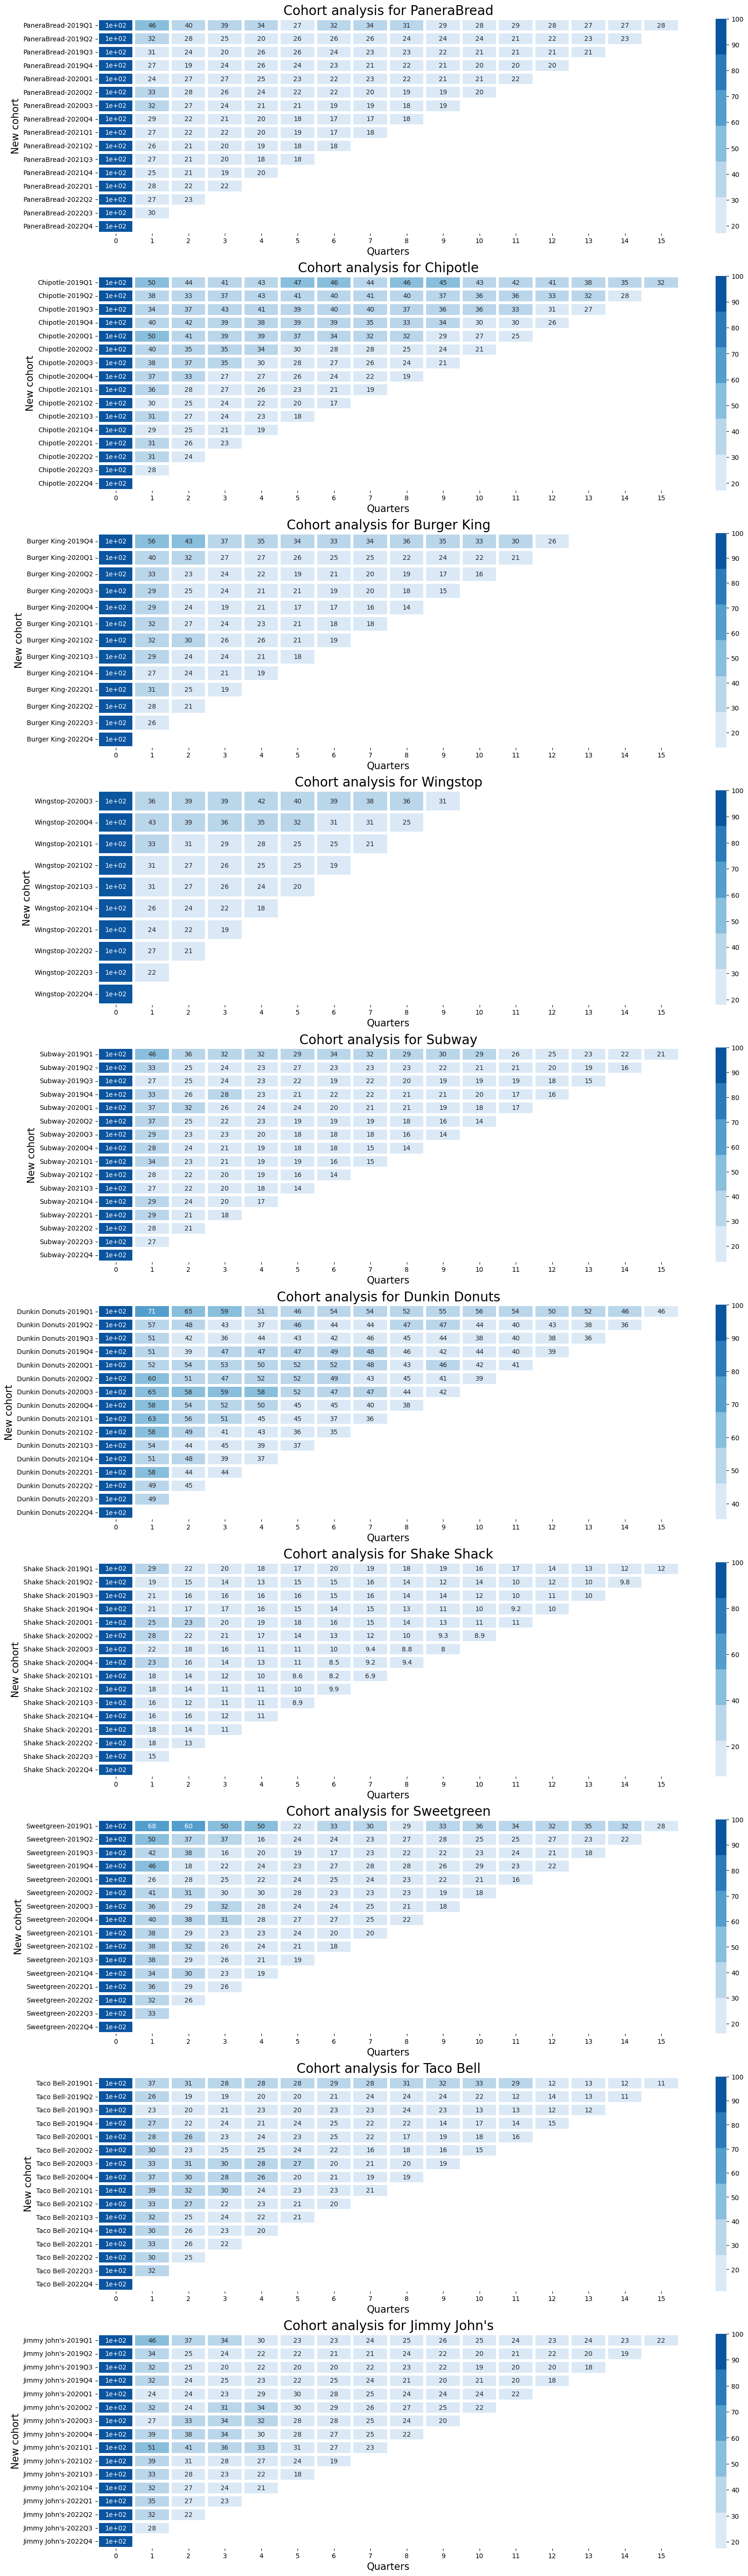

In [61]:
f, ax = plt.subplots(nrows = len(merchants), ncols = 1, figsize=(20, 70))
cmap = sns.color_palette("Blues")

for i, merchant_name_spec in enumerate(merchants):
    quarterly_sessions = sns.heatmap(df_cohort.loc[[merchant_name_spec]], 
                        annot=True, 
                        linewidths=3, 
                        ax=ax[i], 
                        cmap=cmap, 
                        square=False)
    
    df_cohort.loc[[merchant_name_spec]].to_excel(writer,
     sheet_name="New Buyer Cohort",
     startrow=i*20, index_label = f'{merchant_name_spec}', na_rep ='')
    
    ax[i].set_title(f"Cohort analysis for {merchant_name_spec}",fontsize=20)
    ax[i].set_ylabel("New cohort",fontsize=15)
    ax[i].set_xlabel("Quarters",fontsize=15)
    

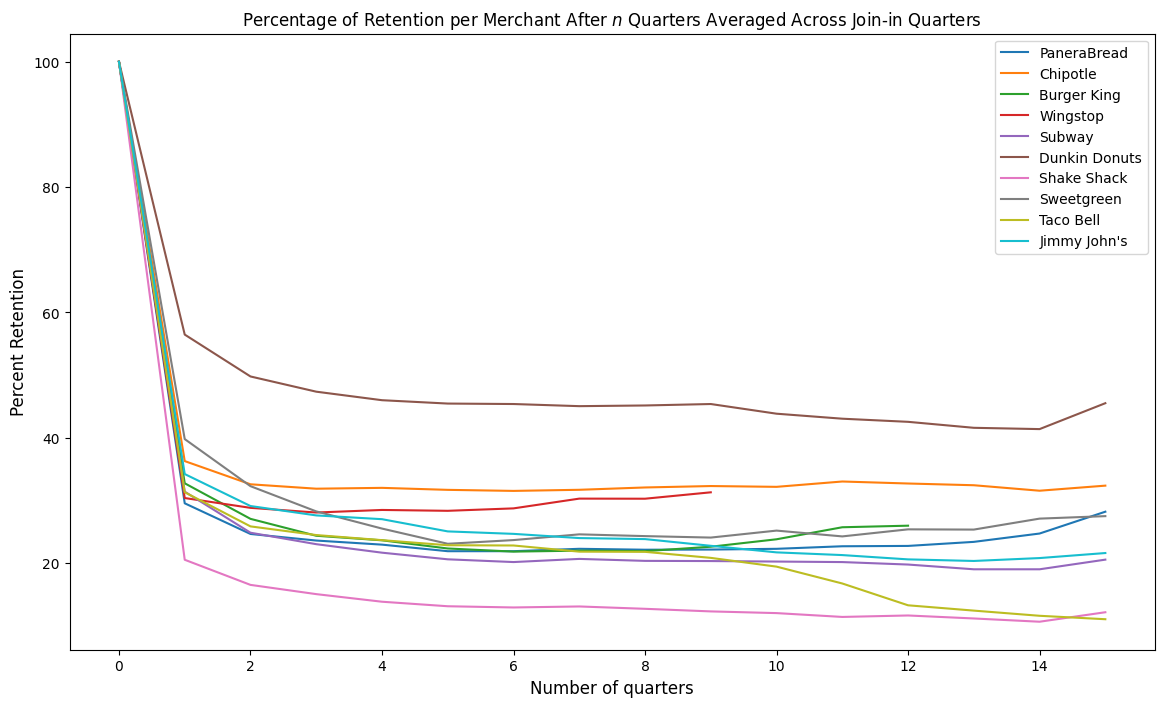

In [62]:
# comparing across restaurants, regardless of what cohort they joined in, we average the number of customers
# that stay after 1 quarter, 2 quarters, etc

fig, ax = plt.subplots(figsize = (14,8))

for merch in merchants:
    sns.lineplot(data = df_cohort.loc[[merch]].mean(), ax = ax, label = merch)
    
ax.set_xlabel('Number of quarters', fontsize = 12)
ax.set_ylabel('Percent Retention', fontsize = 12)
ax.set_title('Percentage of Retention per Merchant After $n$ Quarters Averaged Across Join-in Quarters')    
ax.legend(prop={'size': 10})

<u>Explanation</u>: to clarify, the above plot looks at the percentage of retention after a given number of quarters regardless of when they joined for each merchant. For example, for n=3, we average the retention percentages of users who were "acquired" one, two and three quarters before. We do so for each merchant for comparison.

# Customer overlap

In [63]:
# For each year, calculate the number of customers who only make purchases from a single restaurant (#)

df_trans_merged['order_year'] = df_trans_merged['order_date'].dt.year
df_trans_merged.head()

merchant_id                               user_id  \
0         1712  ecdc60b4-1213-32b0-81cb-2896ec4f0eab   
1         1712  47520794-f426-3c78-91fe-f7da798b4fb3   
2         1712  c82a5f04-342b-39f1-8281-b5e1dce31047   
3         1712  a893e27d-8dbd-3a4e-9d3d-c0d72ac356ad   
4         1712  4af7e167-4174-34b8-9967-7a24ad416cb0   

                               order_id  order_total order_date merchant_name  \
0  4efd00e3-55dd-31ce-8887-3f53a4a32b15        21.08 2022-05-23   PaneraBread   
1  73e147de-b626-3bf4-9d75-3cefa53bfb9c        13.01 2021-01-15   PaneraBread   
2  73f5c3af-8fa5-336f-8dfa-0925253ca8b0        35.71 2021-08-17   PaneraBread   
3  df10f3cf-8f4e-3ebf-b0e1-b0296e3833cf        76.18 2022-07-18   PaneraBread   
4  6bd6e5b9-c422-3b2b-8eb2-c9a991c1dc42        29.43 2022-01-08   PaneraBread   

   order_year  
0        2022  
1        2021  
2        2021  
3        2022  
4        2022

In [64]:
df_trans_count_single = df_trans_merged.groupby(['user_id', 'order_year']).agg(counts=('merchant_name', 'nunique'))
df_trans_count_single_grouped = df_trans_count_single[df_trans_count_single['counts'] == 1].reset_index()
df_trans_count_single_grouped.groupby(['order_year']).agg(number_of_unique_customers = ('user_id', 'nunique'))

number_of_unique_customers
order_year                            
2019                             54980
2020                             81401
2021                             87433
2022                             86925

In [65]:
# filter per order_year per merchant
df_unique_user_ids = df_trans_merged[pd.Series(list(zip(df_trans_merged['user_id'], df_trans_merged['order_year']))).isin(list(zip(list(df_trans_count_single_grouped['user_id'].values),\
list(df_trans_count_single_grouped['order_year'].values))))]

df_unique_user_ids_grouped = df_unique_user_ids.groupby(['order_year', 'merchant_name']).agg(number_of_exclusive_customers = ('user_id', 'nunique'))

df_unique_user_ids_grouped


number_of_exclusive_customers
order_year merchant_name                               
2019       Burger King                              327
           Chipotle                               14701
           Dunkin Donuts                           6288
           Jimmy John's                            3084
           PaneraBread                            18314
           Shake Shack                             2448
           Subway                                  3172
           Sweetgreen                              3441
           Taco Bell                               3205
2020       Burger King                             2857
           Chipotle                               28081
           Dunkin Donuts                           5354
           Jimmy John's                            3214
           PaneraBread                            17654
           Shake Shack                             3674
           Subway                                  8086
           Sweetgreen                              3459
           Taco Bell                               3941
           Wingstop                                5081
2021       Burger King                             2981
           Chipotle                               26784
           Dunkin Donuts                           6011
           Jimmy John's                            4632
           PaneraBread                            16507
           Shake Shack                             3578
           Subway                                  6736
           Sweetgreen                              3533
           Taco Bell                               4737
           Wingstop                               11934
2022       Burger King                             3328
           Chipotle                               23259
           Dunkin Donuts                           6350
           Jimmy John's                            4997
           PaneraBread                            17157
           Shake Shack                             2854
           Subway                                  6818
           Sweetgreen                              4175
           Taco Bell                               5209
           Wingstop                               12778

In [66]:
df_unique_user_ids_grouped_viz = df_unique_user_ids_grouped.reset_index().pivot(index = 'merchant_name', columns = 'order_year',\
                                              values = 'number_of_exclusive_customers')

display(df_unique_user_ids_grouped_viz)

df_unique_user_ids_grouped_viz.to_excel(writer,sheet_name="Customer Overlap",\
                                        startrow=0, index_label = '# Exclusive Customers', na_rep =0)

order_year        2019     2020     2021     2022
merchant_name                                    
Burger King      327.0   2857.0   2981.0   3328.0
Chipotle       14701.0  28081.0  26784.0  23259.0
Dunkin Donuts   6288.0   5354.0   6011.0   6350.0
Jimmy John's    3084.0   3214.0   4632.0   4997.0
PaneraBread    18314.0  17654.0  16507.0  17157.0
Shake Shack     2448.0   3674.0   3578.0   2854.0
Subway          3172.0   8086.0   6736.0   6818.0
Sweetgreen      3441.0   3459.0   3533.0   4175.0
Taco Bell       3205.0   3941.0   4737.0   5209.0
Wingstop           NaN   5081.0  11934.0  12778.0

Text(0, 0.5, 'Number of Exclusive Customers')

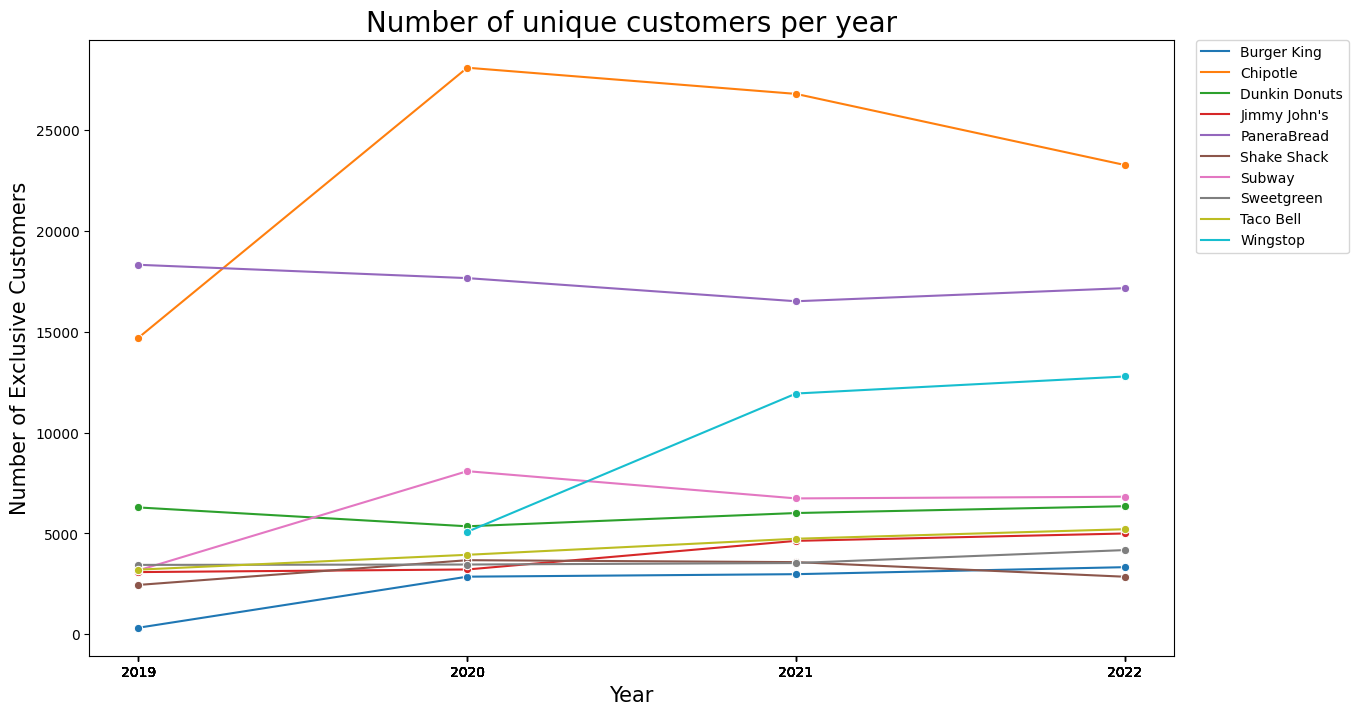

In [67]:
# plot lineplot of number of exclusive customers every year

df_unique_user_ids_grouped_plot = df_unique_user_ids_grouped.reset_index()

fig, ax = plt.subplots(figsize = (14,8))

sns.lineplot(data = df_unique_user_ids_grouped_plot, x = 'order_year', y = 'number_of_exclusive_customers',\
             hue = 'merchant_name', ax = ax, marker='o')
ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
ax.set_xticks(df_unique_user_ids_grouped_plot['order_year'])
ax.set_title('Number of unique customers per year', fontsize = 20)
ax.set_xlabel('Year', fontsize = 15)
ax.set_ylabel('Number of Exclusive Customers', fontsize = 15)

In [68]:
# overlap in customers in 2022

df_trans_merged_2022 = df_trans_merged[df_trans_merged['order_year'] == 2022]
df_trans_merged_2022.head()

merchant_id                               user_id  \
0         1712  ecdc60b4-1213-32b0-81cb-2896ec4f0eab   
3         1712  a893e27d-8dbd-3a4e-9d3d-c0d72ac356ad   
4         1712  4af7e167-4174-34b8-9967-7a24ad416cb0   
5         1712  7a827424-5ad0-3a37-a7a5-a9525ab0f44a   
6         1712  ac3bf795-e2f4-3e84-b5e1-b95c5e41b36a   

                               order_id  order_total order_date merchant_name  \
0  4efd00e3-55dd-31ce-8887-3f53a4a32b15        21.08 2022-05-23   PaneraBread   
3  df10f3cf-8f4e-3ebf-b0e1-b0296e3833cf        76.18 2022-07-18   PaneraBread   
4  6bd6e5b9-c422-3b2b-8eb2-c9a991c1dc42        29.43 2022-01-08   PaneraBread   
5  2abd2416-0b1d-34dd-b77c-e4eab4a1175d        11.61 2022-04-14   PaneraBread   
6  930f6949-f37c-373d-ab0f-13c1c1f497fa        23.00 2022-11-05   PaneraBread   

   order_year  
0        2022  
3        2022  
4        2022  
5        2022  
6        2022

In [69]:
df_trans_merged_2022 = df_trans_merged_2022[['user_id', 'merchant_name']]
df_trans_merged_2022_dummy = pd.get_dummies(df_trans_merged_2022, columns = ['merchant_name'], dtype = int, prefix = None)

df_trans_merged_2022_dummy.columns = df_trans_merged_2022_dummy.columns.str.replace('merchant_name_', '')

df_trans_merged_2022_dummy.head()

user_id  Burger King  Chipotle  Dunkin Donuts  \
0  ecdc60b4-1213-32b0-81cb-2896ec4f0eab            0         0              0   
3  a893e27d-8dbd-3a4e-9d3d-c0d72ac356ad            0         0              0   
4  4af7e167-4174-34b8-9967-7a24ad416cb0            0         0              0   
5  7a827424-5ad0-3a37-a7a5-a9525ab0f44a            0         0              0   
6  ac3bf795-e2f4-3e84-b5e1-b95c5e41b36a            0         0              0   

   Jimmy John's  PaneraBread  Shake Shack  Subway  Sweetgreen  Taco Bell  \
0             0            1            0       0           0          0   
3             0            1            0       0           0          0   
4             0            1            0       0           0          0   
5             0            1            0       0           0          0   
6             0            1            0       0           0          0   

   Wingstop  
0         0  
3         0  
4         0  
5         0  
6         0

In [70]:
df_trans_merged_2022_dummy_sum = df_trans_merged_2022_dummy.groupby(['user_id']).sum().applymap(lambda x: 1 if x > 1 else 0)
df_trans_merged_2022_dummy_sum.head()

Burger King  Chipotle  Dunkin Donuts  \
user_id                                                                      
00003db6-8d9a-3b96-8206-9ca39a2e202c            0         1              0   
00005c80-8ea9-3cd2-b4bf-97b509ff0b1e            0         0              0   
00006c6d-0d30-3e34-ae25-048834d5984c            0         1              0   
00007449-b529-361a-b87b-51bce754a0ae            0         1              0   
0000a6f7-f86d-31c7-8ad4-3b22e429acf7            0         0              0   

                                      Jimmy John's  PaneraBread  Shake Shack  \
user_id                                                                        
00003db6-8d9a-3b96-8206-9ca39a2e202c             0            0            0   
00005c80-8ea9-3cd2-b4bf-97b509ff0b1e             0            0            0   
00006c6d-0d30-3e34-ae25-048834d5984c             0            0            0   
00007449-b529-361a-b87b-51bce754a0ae             0            0            0   
0000a6f7-f86d-31c7-8ad4-3b22e429acf7             0            0            0   

                                      Subway  Sweetgreen  Taco Bell  Wingstop  
user_id                                                                        
00003db6-8d9a-3b96-8206-9ca39a2e202c       1           0          1         1  
00005c80-8ea9-3cd2-b4bf-97b509ff0b1e       0           0          0         0  
00006c6d-0d30-3e34-ae25-048834d5984c       0           0          0         0  
00007449-b529-361a-b87b-51bce754a0ae       0           0          0         0  
0000a6f7-f86d-31c7-8ad4-3b22e429acf7       0           0          0         0

In [71]:
# count overlap matrix
overlap_matrix = df_trans_merged_2022_dummy_sum.T.dot(df_trans_merged_2022_dummy_sum)
overlap_matrix

Burger King  Chipotle  Dunkin Donuts  Jimmy John's  \
Burger King           6178      1140            665           221   
Chipotle              1140     35174           2604          2012   
Dunkin Donuts          665      2604          13280           396   
Jimmy John's           221      2012            396          8407   
PaneraBread            842      6142           2977          1464   
Shake Shack            112       877            263           109   
Subway                1041      2393            714           646   
Sweetgreen              28       993            290            95   
Taco Bell             1492      2495            840           531   
Wingstop               613      3397            354           681   

               PaneraBread  Shake Shack  Subway  Sweetgreen  Taco Bell  \
Burger King            842          112    1041          28       1492   
Chipotle              6142          877    2393         993       2495   
Dunkin Donuts         2977          263     714         290        840   
Jimmy John's          1464          109     646          95        531   
PaneraBread          24252          522    1585         362       1520   
Shake Shack            522         3227      96         320        166   
Subway                1585           96   11135          64       1534   
Sweetgreen             362          320      64        5124         84   
Taco Bell             1520          166    1534          84      10351   
Wingstop              1348          168    1347          90       1269   

               Wingstop  
Burger King         613  
Chipotle           3397  
Dunkin Donuts       354  
Jimmy John's        681  
PaneraBread        1348  
Shake Shack         168  
Subway             1347  
Sweetgreen           90  
Taco Bell          1269  
Wingstop          14885

In [72]:
# in percentage now

diagonal = overlap_matrix.to_numpy().diagonal()
overlap_matrix_perc = overlap_matrix.divide(diagonal, axis=0).applymap(lambda x: x*100)
display(overlap_matrix_perc)

overlap_matrix_perc.to_excel(writer,sheet_name="Customer Overlap",\
                                        startcol=7, index_label = '% Customer Overlap', na_rep =0)

writer.close()

Burger King    Chipotle  Dunkin Donuts  Jimmy John's  \
Burger King     100.000000   18.452574      10.764001      3.577209   
Chipotle          3.241030  100.000000       7.403196      5.720134   
Dunkin Donuts     5.007530   19.608434     100.000000      2.981928   
Jimmy John's      2.628762   23.932437       4.710360    100.000000   
PaneraBread       3.471879   25.325746      12.275276      6.036616   
Shake Shack       3.470716   27.176945       8.149985      3.377750   
Subway            9.348900   21.490795       6.412214      5.801527   
Sweetgreen        0.546448   19.379391       5.659641      1.854020   
Taco Bell        14.414066   24.103951       8.115158      5.129939   
Wingstop          4.118240   22.821633       2.378233      4.575076   

               PaneraBread  Shake Shack      Subway  Sweetgreen   Taco Bell  \
Burger King      13.629006     1.812884   16.850113    0.453221   24.150210   
Chipotle         17.461762     2.493319    6.803321    2.823108    7.093308   
Dunkin Donuts    22.417169     1.980422    5.376506    2.183735    6.325301   
Jimmy John's     17.414060     1.296539    7.684073    1.130011    6.316165   
PaneraBread     100.000000     2.152400    6.535543    1.492660    6.267524   
Shake Shack      16.176015   100.000000    2.974899    9.916331    5.144097   
Subway           14.234396     0.862146  100.000000    0.574764   13.776381   
Sweetgreen        7.064793     6.245121    1.249024  100.000000    1.639344   
Taco Bell        14.684572     1.603710   14.819824    0.811516  100.000000   
Wingstop          9.056097     1.128653    9.049379    0.604636    8.525361   

                 Wingstop  
Burger King      9.922305  
Chipotle         9.657702  
Dunkin Donuts    2.665663  
Jimmy John's     8.100393  
PaneraBread      5.558304  
Shake Shack      5.206074  
Subway          12.096991  
Sweetgreen       1.756440  
Taco Bell       12.259685  
Wingstop       100.000000

Text(0.5, 1.0, '2022 % Customer overlap Heatmap')

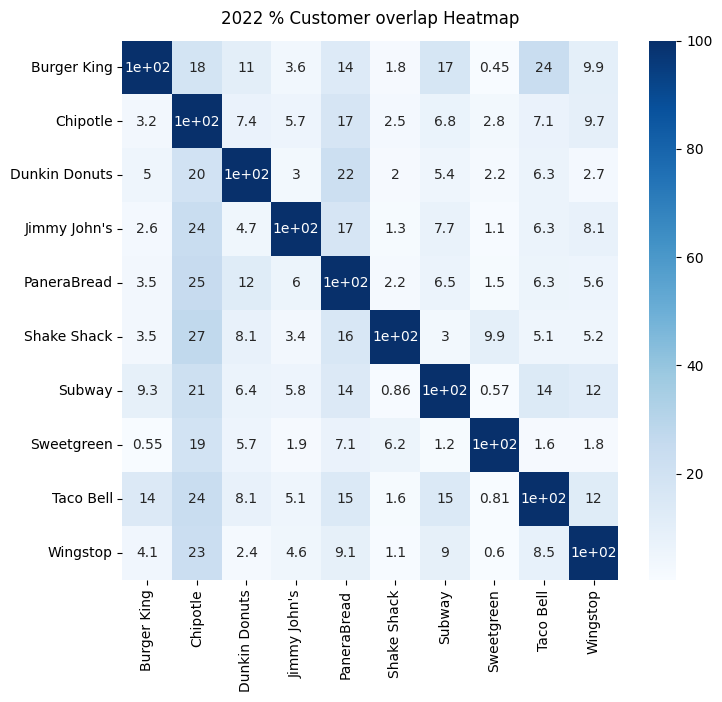

In [73]:
# heatmap 

fig, ax = plt.subplots(figsize = (8,7))

sns.heatmap(overlap_matrix_perc, annot=True, ax = ax, cmap="Blues")
ax.set_title('2022 % Customer overlap Heatmap', fontdict={'fontsize':12}, pad=12)
